**Top line links**
* The stock market is not the economy
  * https://fredblog.stlouisfed.org/2019/08/the-stock-market-is-not-the-economy/
  * 4 Key Indicators That Move The Markets
https://www.investopedia.com/articles/fundamental-analysis/10/indicators-that-move-the-market.asp
  * 10 Most popular economics charts on FRED
https://www.businessinsider.com/10-most-popular-economics-charts-on-fred-2013-9?r=US&IR=T

**FRED Database in Quandl**
* https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data/documentation
* FUll description of metrics: https://docs.google.com/document/d/1Cf4C3Xz4_yitlzPaLEknHoDlw7KMXey4c49kZ7ucQEE/edit#

# 0. Prep

In [16]:
!pip install quandl

In [9]:
!pip install yfinance

In [190]:
import quandl
import pandas_datareader as pdr

import pandas as pd
import yfinance as yf
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick



In [191]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 9; day=8
Period for indexes: 1954-09-08 to 2024-09-08 


# 01. Indexes

In [192]:
# Other indexes: https://stooq.com/t/

# DJI= DOW JONES INDU
dji_index = pdr.get_data_stooq('^DJI',start,end)
# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)

In [193]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = spx_index.Close/spx_index.Close.shift(-1)
spx_index['spx_qoq'] = spx_index.Close/spx_index.Close.shift(-63)
spx_index['spx_yoy'] = spx_index.Close/spx_index.Close.shift(-252)

dji_index['dji_dod'] = dji_index.Close/dji_index.Close.shift(-1)
dji_index['dji_qoq'] = dji_index.Close/dji_index.Close.shift(-63)
dji_index['dji_yoy'] = dji_index.Close/dji_index.Close.shift(-252)

In [194]:
spx_index.head()

Open     High      Low    Close        Volume   spx_dod  \
Date                                                                     
2024-09-06  5507.33  5522.47  5402.62  5408.42  2.840330e+09  0.982740   
2024-09-05  5520.08  5546.30  5480.54  5503.41  2.459175e+09  0.996982   
2024-09-04  5506.68  5552.99  5503.66  5520.07  2.507930e+09  0.998398   
2024-09-03  5623.89  5623.89  5504.33  5528.93  2.918660e+09  0.978849   
2024-08-30  5612.74  5651.37  5581.79  5648.40  2.763541e+09  1.010093   

             spx_qoq   spx_yoy  
Date                            
2024-09-06  1.010361  1.211162  
2024-09-05  1.027900  1.223842  
2024-09-04  1.043227  1.222398  
2024-09-03  1.046472  1.226563  
2024-08-30  1.070277  1.251066

<Axes: xlabel='Date'>

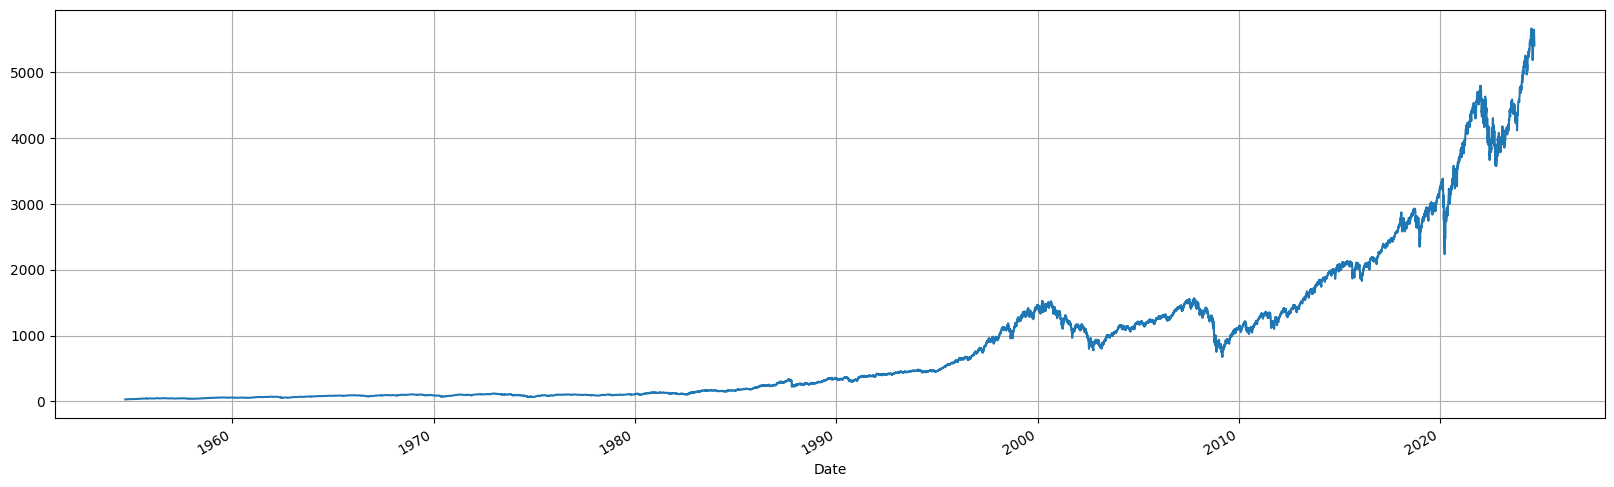

In [195]:
spx_index.Close.plot.line(figsize=(20,6), grid = True)

<Axes: xlabel='Date'>

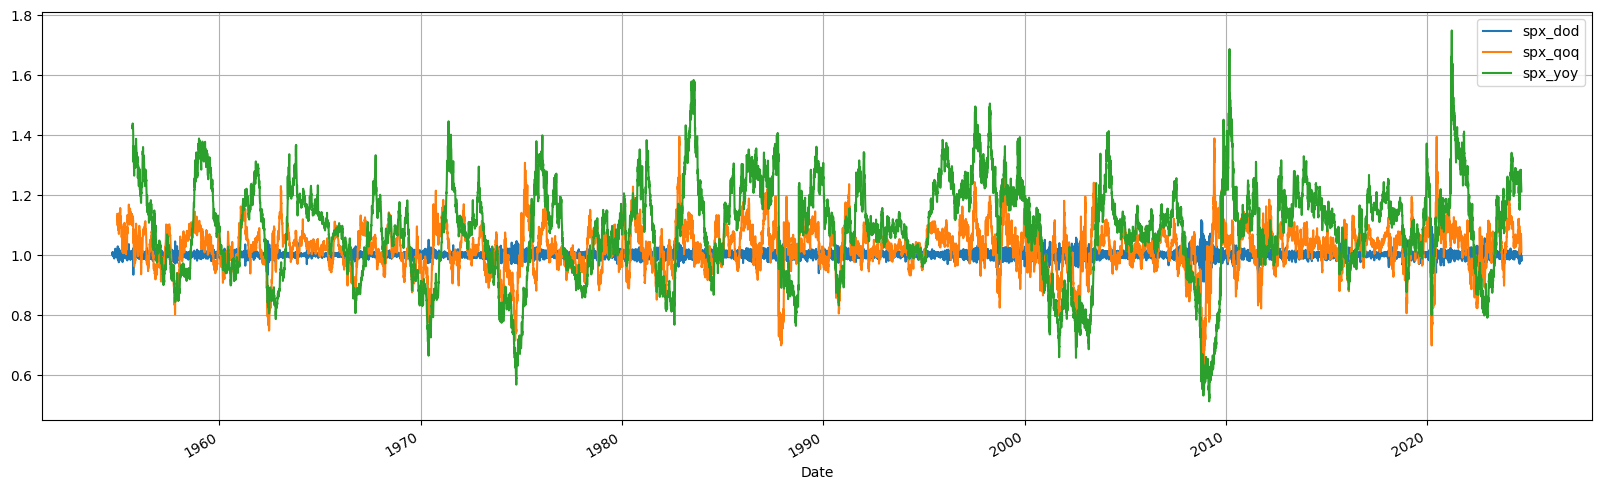

In [196]:
'SNP 500 Index growth: daily, quarterly, yearly'
spx_index[['spx_dod','spx_qoq','spx_yoy']].plot.line(figsize=(20,6), grid = True)

<Axes: xlabel='Date'>

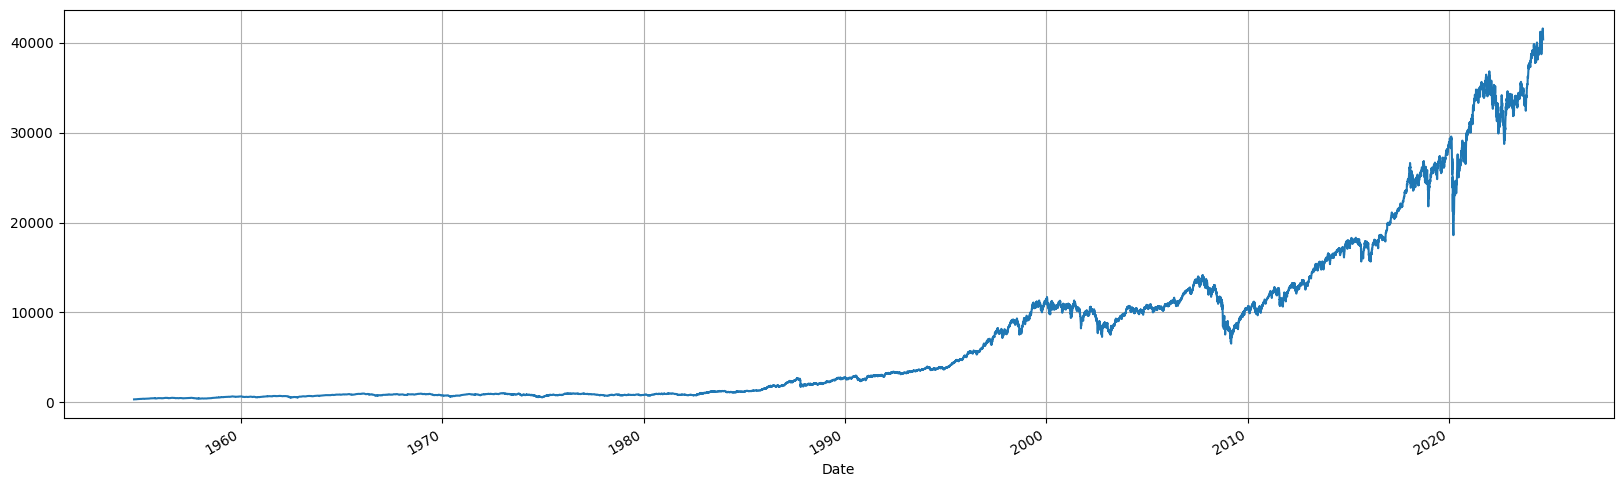

In [197]:
dji_index.Close.plot.line(figsize=(20,6), grid = True)

<Axes: xlabel='Date'>

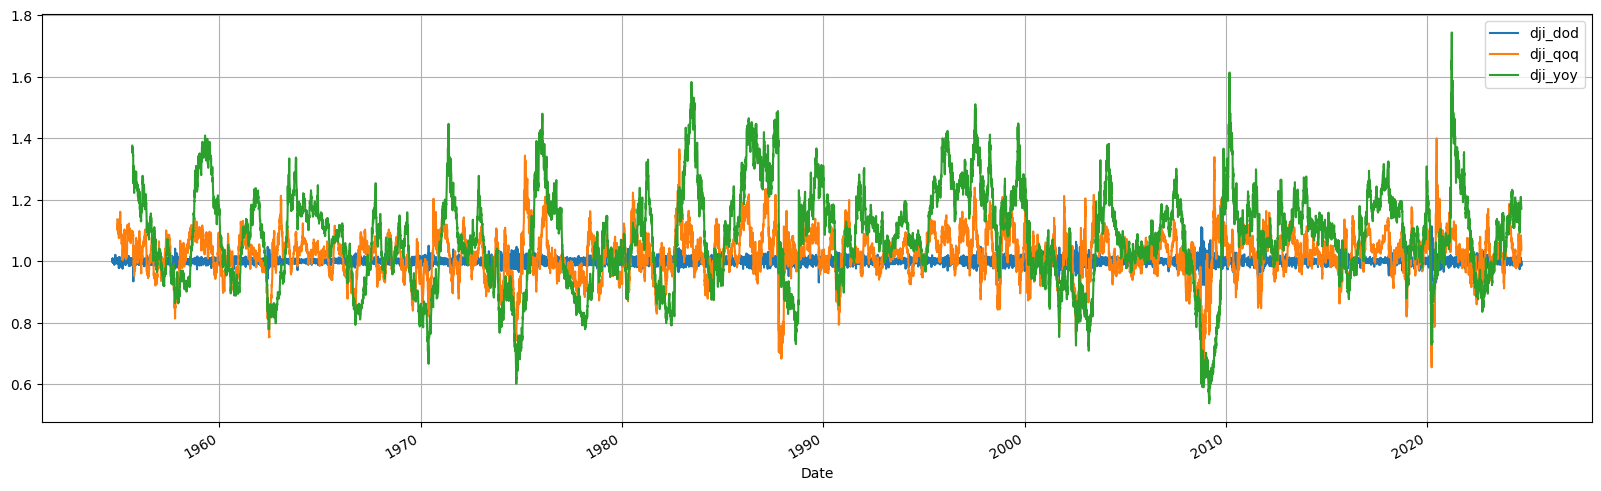

In [198]:
# Dow Jones Index growth: daily, quarterly, yearly
dji_index[['dji_dod','dji_qoq','dji_yoy']].plot.line(figsize=(20,6), grid = True)

# 1. FRED Metrics

## 1.1 GROWTH
*GDP, GDPC1, GDPPOT, gpd_world (NYGDPMKTPCDWLD)*

In [199]:
# GDP US, $b: https://fred.stlouisfed.org/series/GDP ==> QUARTERLY GDP US
gdp = pdr.DataReader("GDP", "fred", start=start)

In [200]:
gdp['gdp_us_yoy'] = gdp.GDP/gdp.GDP.shift(4)-1
gdp['gdp_us_qoq'] = gdp.GDP/gdp.GDP.shift(1)-1
gdp.tail(10)

GDP  gdp_us_yoy  gdp_us_qoq
DATE                                         
2022-01-01  25029.116    0.107474    0.015190
2022-04-01  25544.273    0.096680    0.020582
2022-07-01  25994.639    0.090884    0.017631
2022-10-01  26408.405    0.071135    0.015917
2023-01-01  26813.601    0.071296    0.015343
2023-04-01  27063.012    0.059455    0.009302
2023-07-01  27610.128    0.062147    0.020216
2023-10-01  27956.998    0.058640    0.012563
2024-01-01  28269.174    0.054285    0.011166
2024-04-01  28652.337    0.058727    0.013554

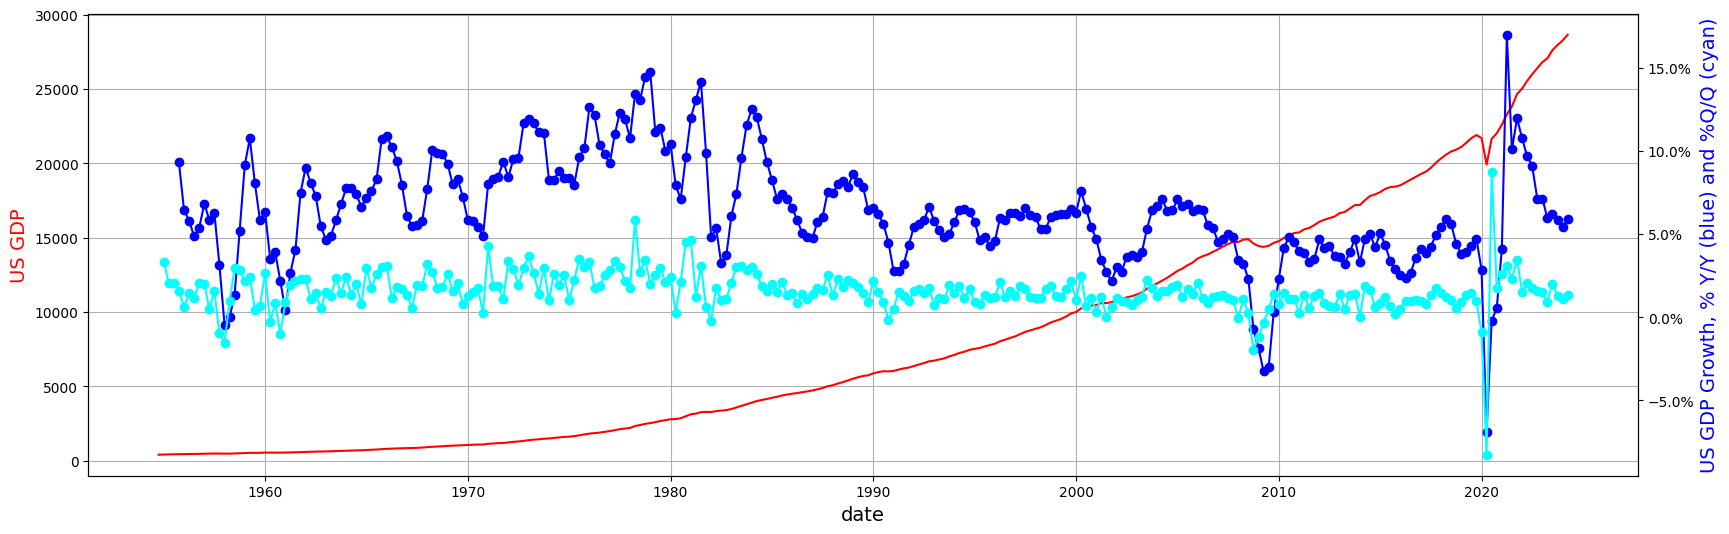

In [201]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdp.GDP, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("US GDP",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdp.gdp_us_yoy, color="blue",marker="o")
ax2.plot(gdp.gdp_us_qoq, color="cyan",marker="o")
ax2.set_ylabel("US GDP Growth, % Y/Y (blue) and %Q/Q (cyan)",color="blue",fontsize=14)
plt.show()

# OLD: gdp.GDP.plot.line(figsize=(20,6), grid = True)

In [202]:
# Real Gross Domestic Product, $b chained 2012 USD, CHAINED ==> QUARTERLY
# GDPC1, $b: https://fred.stlouisfed.org/series/GDPC1
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [203]:
gdpc1['gdpc1_us_yoy'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(4)-1
gdpc1['gdpc1_us_qoq'] = gdpc1.GDPC1/gdpc1.GDPC1.shift(1)-1
gdpc1.tail()

GDPC1  gdpc1_us_yoy  gdpc1_us_qoq
DATE                                             
2023-04-01  22225.350      0.023825      0.005111
2023-07-01  22490.692      0.029269      0.011939
2023-10-01  22679.255      0.031345      0.008384
2024-01-01  22758.752      0.029234      0.003505
2024-04-01  22924.863      0.031474      0.007299

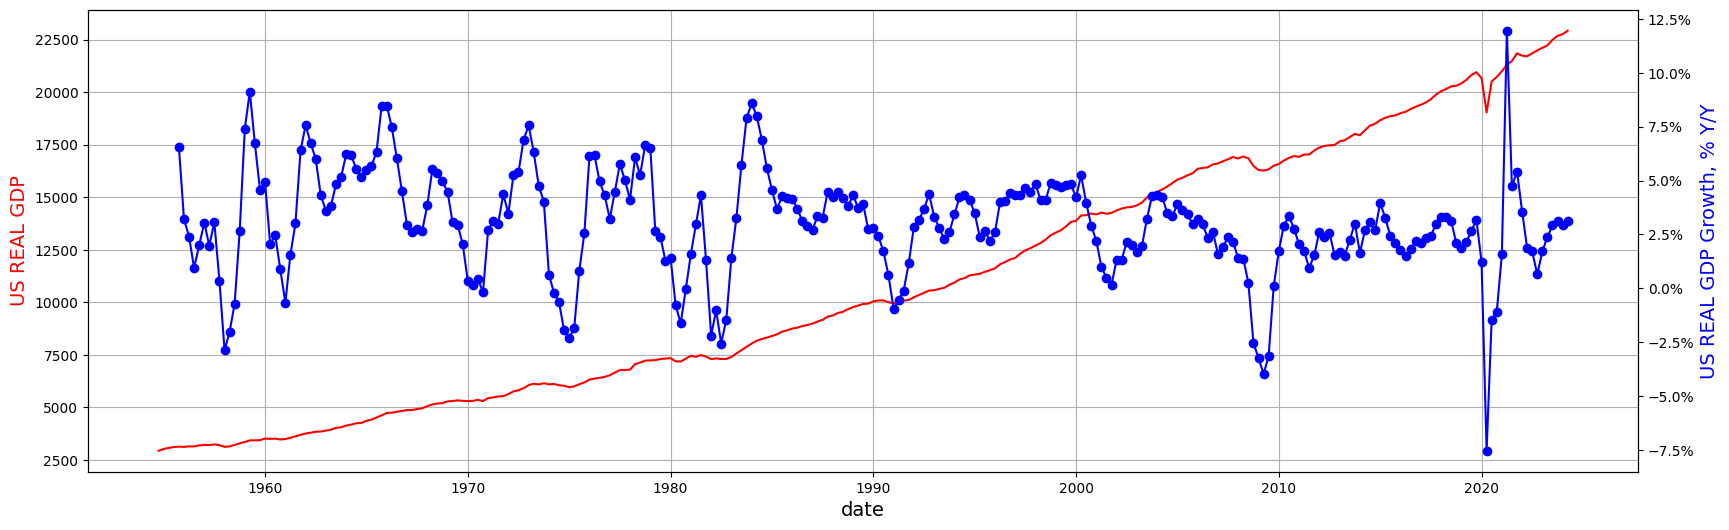

In [204]:
# Visuals GDPC1
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdpc1.GDPC1, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("US REAL GDP",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdpc1['gdpc1_us_yoy'], color="blue",marker="o")
ax2.set_ylabel("US REAL GDP Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

# OLD: gdpc1.GDPC1.plot.line(figsize=(20,6), grid = True)

In [205]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [206]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot.tail()

GDPPOT  gdppot_us_yoy  gdppot_us_qoq
DATE                                              
2023-07-01  22338.77       0.020372       0.020372
2023-10-01  22452.06       0.020331       0.020331
2024-01-01  22566.61       0.020357       0.020357
2024-04-01  22682.66       0.020474       0.020474
2024-07-01  22800.63       0.020675       0.020675

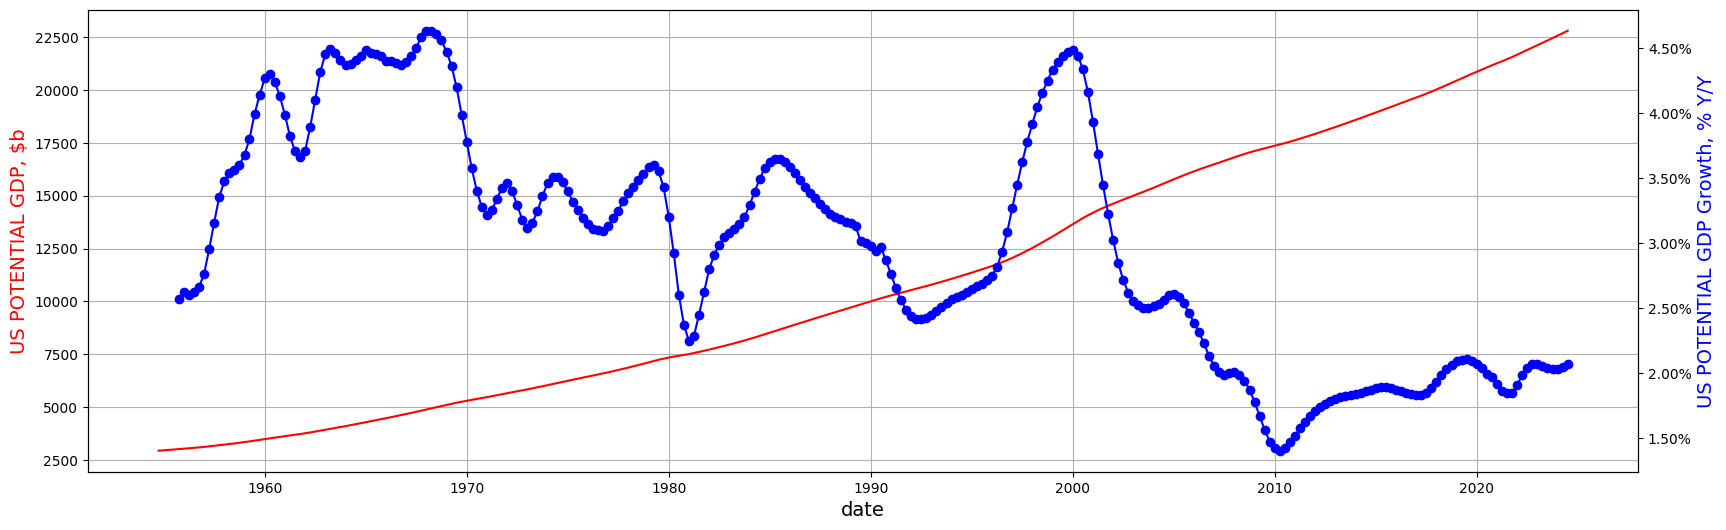

In [207]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdppot.GDPPOT, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("US POTENTIAL GDP, $b",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue",marker="o")
ax2.set_ylabel("US POTENTIAL GDP Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

# OLD: gdpc1.GDPC1.plot.line(figsize=(20,6), grid = True)

In [208]:
# https://fred.stlouisfed.org/series/NYGDPMKTPCDWLD
# GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product
# taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions
# for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S.
# dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates.
# For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign
# exchange transactions, an alternative conversion factor is used.

gdp_world = pdr.DataReader("NYGDPMKTPCDWLD", "fred", start=start)

In [209]:
gdp_world['gdp_world_yoy'] = gdp_world.NYGDPMKTPCDWLD/gdp_world.NYGDPMKTPCDWLD.shift(1)-1
gdp_world.tail()

NYGDPMKTPCDWLD  gdp_world_yoy
DATE                                     
2019-01-01    8.794557e+13       0.014520
2020-01-01    8.557772e+13      -0.026924
2021-01-01    9.752703e+13       0.139631
2022-01-01    1.012251e+14       0.037918
2023-01-01    1.054350e+14       0.041590

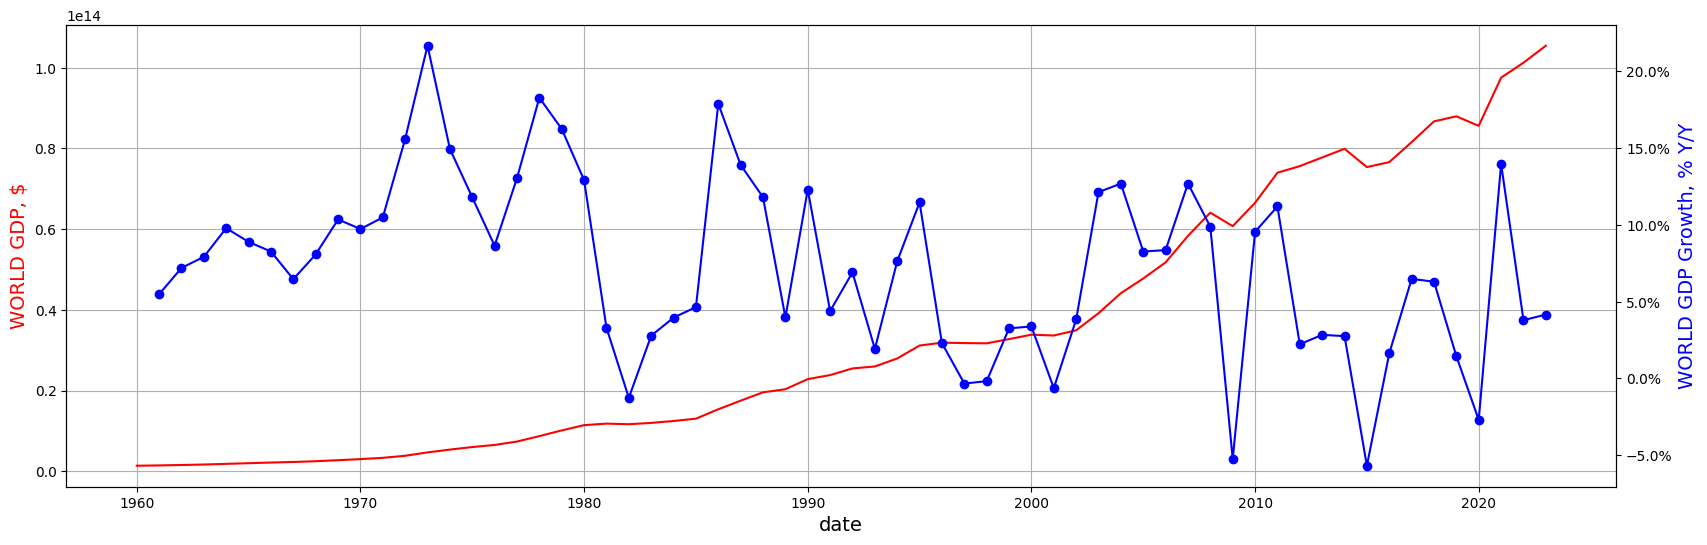

In [210]:
# Visuals GDP_WORLD
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gdp_world.NYGDPMKTPCDWLD, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("WORLD GDP, $",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdp_world.gdp_world_yoy, color="blue",marker="o")
ax2.set_ylabel("WORLD GDP Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

# OLD: gdp_world.NYGDPMKTPCDWLD.plot.line(figsize=(20,6), grid = True)

In [215]:
# ?? GLOB_GDP_NO_INFLATION = gdp_world / gdpdef
 # https://fredblog.stlouisfed.org/2018/10/what-a-wonderful-world/

## 1.2 PRICES AND INFLATION
*CPI_full (CPIAUCSL), CPI (CPILFESL), GDPDEF*

In [216]:
#  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL), MONTHLY
#  Index 1982-1984=100, Seasonally Adjusted,
# The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a measure of the average monthly change
# in the price for goods and services paid by urban consumers between any two time periods
# https://fred.stlouisfed.org/series/CPIAUCSL
cpiaucsl = pdr.DataReader("CPIAUCSL", "fred", start=start)

In [217]:
cpiaucsl['cpi_full_yoy'] = cpiaucsl.CPIAUCSL/cpiaucsl.CPIAUCSL.shift(12)-1
cpiaucsl['cpi_full_mom'] = cpiaucsl.CPIAUCSL/cpiaucsl.CPIAUCSL.shift(1)-1

cpiaucsl.tail(13)

CPIAUCSL  cpi_full_yoy  cpi_full_mom
DATE                                            
2023-07-01   304.628      0.032718      0.002056
2023-08-01   306.187      0.037187      0.005118
2023-09-01   307.288      0.036941      0.003596
2023-10-01   307.531      0.032458      0.000791
2023-11-01   308.024      0.031395      0.001603
2023-12-01   308.742      0.033232      0.002331
2024-01-01   309.685      0.031060      0.003054
2024-02-01   311.054      0.031657      0.004421
2024-03-01   312.230      0.034751      0.003781
2024-04-01   313.207      0.033577      0.003129
2024-05-01   313.225      0.032502      0.000057
2024-06-01   313.049      0.029756     -0.000562
2024-07-01   313.534      0.029236      0.001549

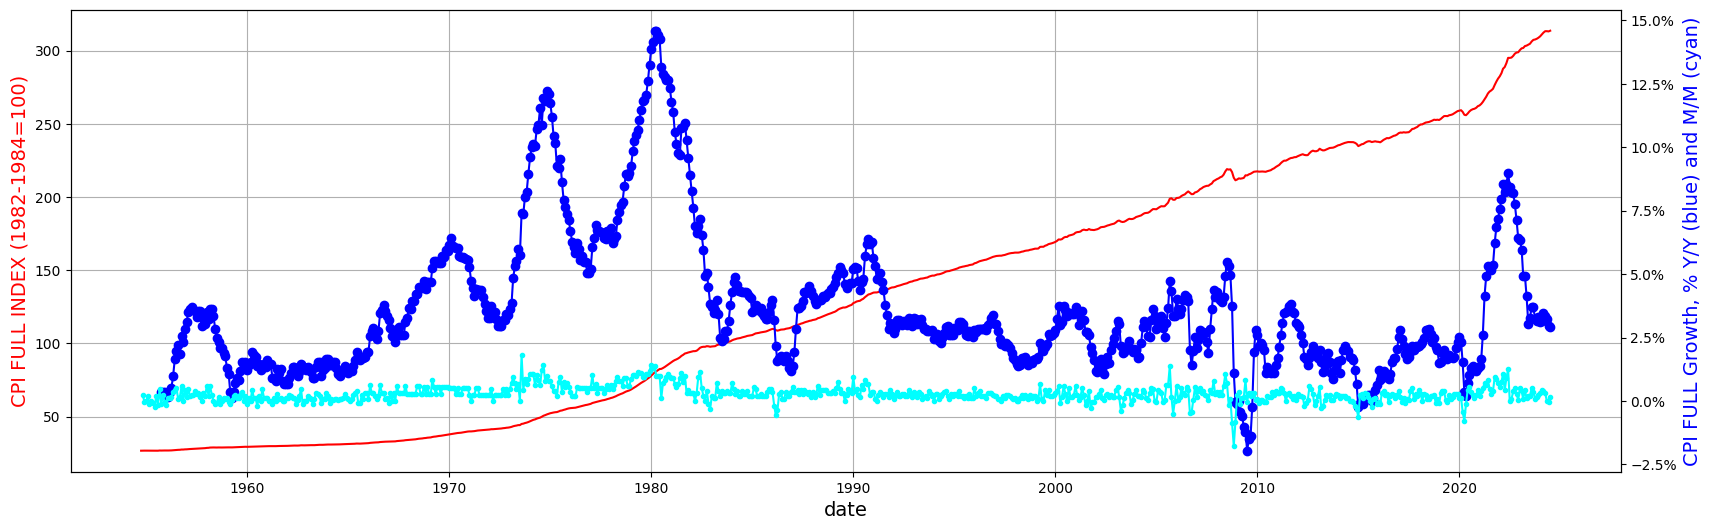

In [218]:
# Visuals CPI_FULL
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(cpiaucsl.CPIAUCSL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("CPI FULL INDEX (1982-1984=100)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpiaucsl.cpi_full_yoy, color="blue",marker="o")
ax2.plot(cpiaucsl.cpi_full_mom, color="cyan",marker=".")
ax2.set_ylabel("CPI FULL Growth, % Y/Y (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

# OLD: gdp_world.NYGDPMKTPCDWLD.plot.line(figsize=(20,6), grid = True)

In [219]:
# "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [220]:
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

CPILFESL  cpi_core_yoy  cpi_core_mom
DATE                                            
2023-07-01   308.945      0.047076      0.002271
2023-08-01   309.656      0.044128      0.002301
2023-09-01   310.644      0.041437      0.003191
2023-10-01   311.390      0.040217      0.002401
2023-11-01   312.349      0.040151      0.003080
2023-12-01   313.209      0.039101      0.002753
2024-01-01   314.438      0.038747      0.003924
2024-02-01   315.565      0.037620      0.003584
2024-03-01   316.698      0.037973      0.003590
2024-04-01   317.622      0.036155      0.002918
2024-05-01   318.140      0.034111      0.001631
2024-06-01   318.346      0.032769      0.000648
2024-07-01   318.872      0.032132      0.001652

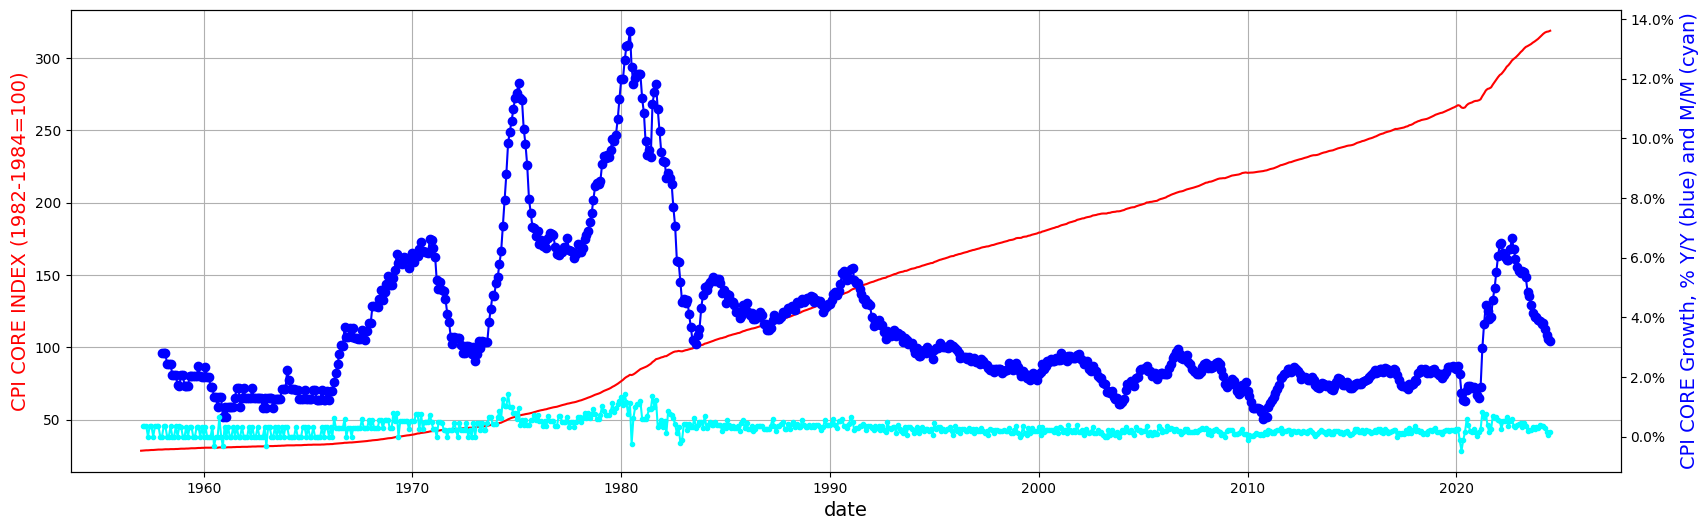

In [221]:
# Visuals CPI_CORE
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(cpilfesl.CPILFESL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("CPI CORE INDEX (1982-1984=100)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue",marker="o")
ax2.plot(cpilfesl.cpi_core_mom, color="cyan",marker=".")
ax2.set_ylabel("CPI CORE Growth, % Y/Y (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()


In [222]:
# Index 2012=100, Seasonally Adjusted
#  Gross Domestic Product: Implicit Price Deflator (GDPDEF)
# https://fred.stlouisfed.org/series/GDPDEF
gdpdef = pdr.DataReader("GDPDEF", "fred", start=start)

In [223]:
gdpdef.tail()

GDPDEF
DATE               
2023-04-01  121.766
2023-07-01  122.762
2023-10-01  123.271
2024-01-01  124.212
2024-04-01  124.984

<Axes: xlabel='DATE'>

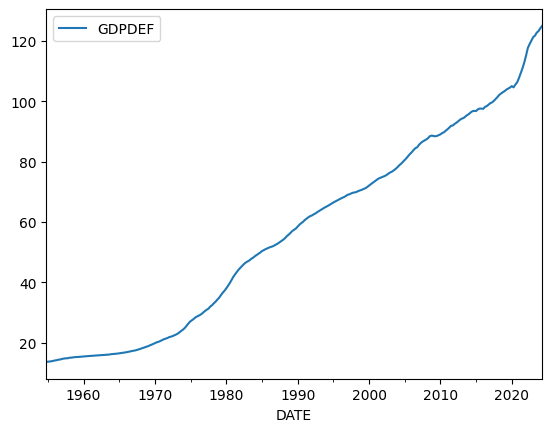

In [228]:
gdpdef.plot.line()

## 1.3 MONEY SUPPLY
*M1 (M1SL, WM1NS), M2, M1V (M1 velocity), M2V (M2 velocity)*

In [229]:
#  M1 Money Stock (M1SL)	, MONTHLY , $b
# Before May 2020, M1 consists of (1) currency outside the U.S. Treasury, Federal Reserve Banks,
# and the vaults of depository institutions; (2) demand deposits at commercial banks (excluding
# those amounts held by depository institutions, the U.S. government, and foreign banks and official institutions)
#  less cash items in the process of collection and Federal Reserve float; and (3) other checkable deposits (OCDs),
# consisting of negotiable order of withdrawal, or NOW, and automatic transfer service, or ATS, accounts at depository
# institutions, share draft accounts at credit unions, and demand deposits at thrift institutions.

# Beginning May 2020, M1 consists of (1) currency outside the U.S. Treasury,
# Federal Reserve Banks, and the vaults of depository institutions;
# (2) demand deposits at commercial banks (excluding those amounts held by depository institutions,
#  the U.S. government, and foreign banks and official institutions) less cash items in the process of collection and
#  Federal Reserve float; and (3) other liquid deposits, consisting of OCDs and savings deposits (including money market
# deposit accounts). Seasonally adjusted M1 is constructed by summing currency, demand deposits,
# and OCDs (before May 2020) or other liquid deposits (beginning May 2020), each seasonally adjusted separately.

# https://fred.stlouisfed.org/series/M1SL
m1sl = pdr.DataReader("M1SL", "fred", start=start)
m1sl.tail()

M1SL
DATE               
2024-03-01  17989.9
2024-04-01  17978.9
2024-05-01  18022.6
2024-06-01  18063.3
2024-07-01  18053.3

In [230]:
m1sl['m1sl_yoy'] = m1sl.M1SL/m1sl.M1SL.shift(12)-1
m1sl['m1sl_mom'] = m1sl.M1SL/m1sl.M1SL.shift(1)-1

m1sl.tail(13)

M1SL  m1sl_yoy  m1sl_mom
DATE                                   
2023-07-01  18381.7 -0.105113 -0.005626
2023-08-01  18271.6 -0.106807 -0.005990
2023-09-01  18151.7 -0.106013 -0.006562
2023-10-01  18070.1 -0.102865 -0.004495
2023-11-01  18008.8 -0.098338 -0.003392
2023-12-01  18012.0 -0.088692  0.000178
2024-01-01  17975.0 -0.080755 -0.002054
2024-02-01  17930.0 -0.074002 -0.002503
2024-03-01  17989.9 -0.051611  0.003341
2024-04-01  17978.9 -0.035839 -0.000611
2024-05-01  18022.6 -0.030850  0.002431
2024-06-01  18063.3 -0.022850  0.002258
2024-07-01  18053.3 -0.017866 -0.000554

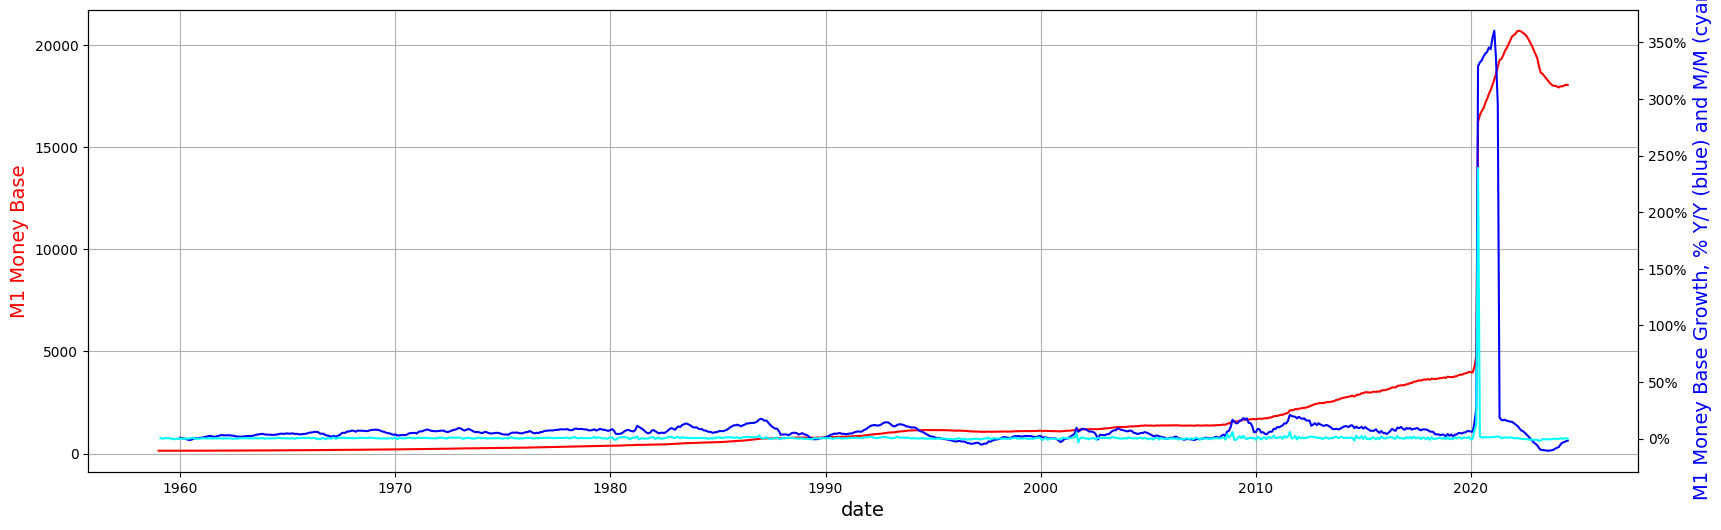

In [232]:
# Visuals M1SL
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m1sl.M1SL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M1 Money Base",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m1sl.m1sl_yoy, color="blue",marker="")
ax2.plot(m1sl.m1sl_mom, color="cyan",marker="")
ax2.set_ylabel("M1 Money Base Growth, % Y/Y (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()


In [233]:
# M1 weekly $b -- WEEKLY VERSION Of money supply
# https://fred.stlouisfed.org/series/WM1NS ,
m1_weekly = pdr.DataReader("WM1NS", "fred", start=start)

In [234]:
m1_weekly['m1weekly_wow'] = m1_weekly.WM1NS/m1_weekly.WM1NS.shift(1)-1
m1_weekly['m1weekly_mom'] = m1_weekly.WM1NS/m1_weekly.WM1NS.shift(5)-1

m1_weekly.tail()

WM1NS  m1weekly_wow  m1weekly_mom
DATE                                           
2024-07-08  18053.6      0.003067      0.001326
2024-07-15  18041.4     -0.000676     -0.000194
2024-07-22  17974.8     -0.003692     -0.004453
2024-07-29  17949.3     -0.001419     -0.000267
2024-08-05  18109.3      0.008914      0.006162

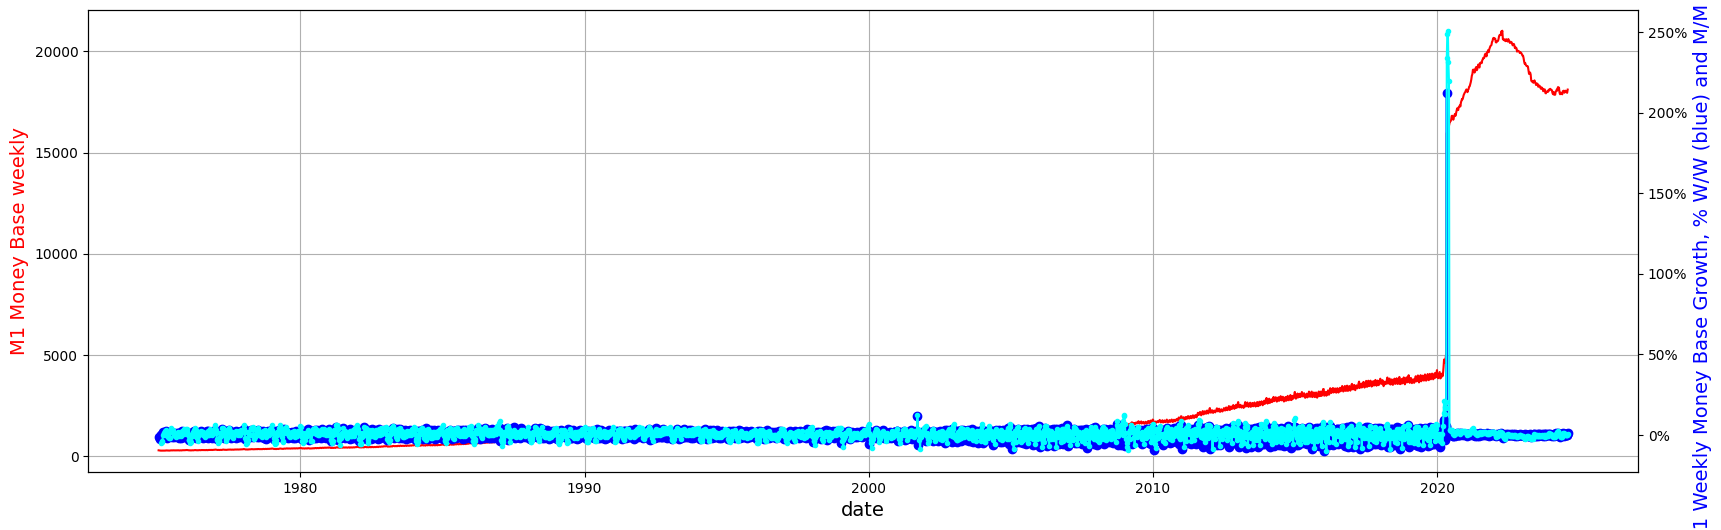

In [235]:
# Visuals M1 WEEKLY
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m1_weekly.WM1NS, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M1 Money Base weekly",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m1_weekly.m1weekly_wow, color="blue",marker="o")
ax2.plot(m1_weekly.m1weekly_mom, color="cyan",marker=".")
ax2.set_ylabel("M1 Weekly Money Base Growth, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

In [236]:
# M2 weekly - METRIC CHANGE!
# https://fred.stlouisfed.org/series/WM2NS
# Before May 2020, M2 consists of M1 plus (1) savings deposits (including money market deposit accounts);
# (2) small-denomination time deposits (time deposits in amounts of less than $100,000) less individual retirement account (IRA)
#  and Keogh balances at depository institutions; and
# (3) balances in retail money market funds (MMFs) less IRA and Keogh balances at MMFs.

# Beginning May 2020, M2 consists of M1 plus (1) small-denomination time deposits
# (time deposits in amounts of less than $100,000) less IRA and Keogh balances at depository institutions; and
# (2) balances in retail MMFs less IRA and Keogh balances at MMFs. Seasonally adjusted M2 is constructed by summing
# savings deposits (before May 2020), small-denomination time deposits, and retail MMFs, each seasonally adjusted
# separately, and adding this result to seasonally adjusted M1.

m2_weekly = pdr.DataReader("WM2NS", "fred", start=start)

In [237]:
m2_weekly['m2weekly_wow'] = m2_weekly.WM2NS/m2_weekly.WM2NS.shift(1)-1
m2_weekly['m2weekly_mom'] = m2_weekly.WM2NS/m2_weekly.WM2NS.shift(5)-1

m2_weekly.tail()

WM2NS  m2weekly_wow  m2weekly_mom
DATE                                           
2024-07-08  21023.1      0.003556      0.003523
2024-07-15  21014.5     -0.000409      0.001683
2024-07-22  20952.7     -0.002941     -0.002134
2024-07-29  20931.0     -0.001036      0.001205
2024-08-05  21102.7      0.008203      0.007356

In [238]:
# M1V - M1 velocity. Calculated as the ratio of quarterly nominal GDP (GDP) to the quarterly average of M1 money stock (M1SL)
# https://fred.stlouisfed.org/series/M1V
m1v = pdr.DataReader("M1V", "fred", start=start)

In [239]:
m1v['m1v_qoq'] = m1v.M1V/m1v.M1V.shift(1)-1
m1v['m1v_yoy'] = m1v.M1V/m1v.M1V.shift(5)-1
m1v.tail()

M1V   m1v_qoq   m1v_yoy
DATE                                 
2023-04-01  1.457  0.048201  0.198191
2023-07-01  1.511  0.037062  0.222492
2023-10-01  1.551  0.026473  0.219340
2024-01-01  1.574  0.014829  0.189720
2024-04-01  1.590  0.010165  0.143885

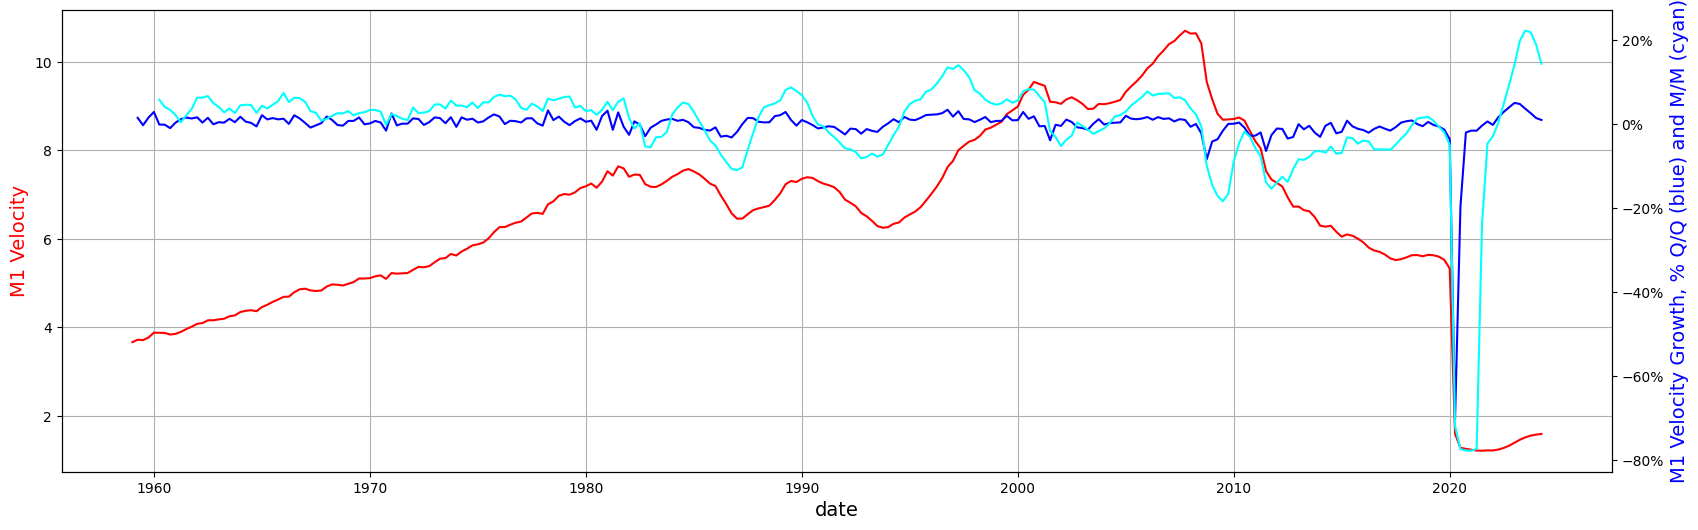

In [241]:
# Visuals M1 Velocity
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m1v.M1V, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M1 Velocity",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m1v.m1v_qoq, color="blue",marker="")
ax2.plot(m1v.m1v_yoy, color="cyan",marker="")
ax2.set_ylabel("M1 Velocity Growth, % Q/Q (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

# m1v.plot.line(figsize=(20,6), grid = True)

In [242]:
# M2V - M2 velocity
m2v = pdr.DataReader("M2V", "fred", start=start)

In [243]:
m2v['m2v_qoq'] = m2v.M2V/m2v.M2V.shift(1)-1
m2v['m2v_yoy'] = m2v.M2V/m2v.M2V.shift(5)-1

m2v.tail()

M2V   m2v_qoq   m2v_yoy
DATE                                 
2023-04-01  1.301  0.023603  0.124460
2023-07-01  1.330  0.022291  0.129032
2023-10-01  1.350  0.015038  0.122195
2024-01-01  1.361  0.008148  0.102917
2024-04-01  1.368  0.005143  0.076318

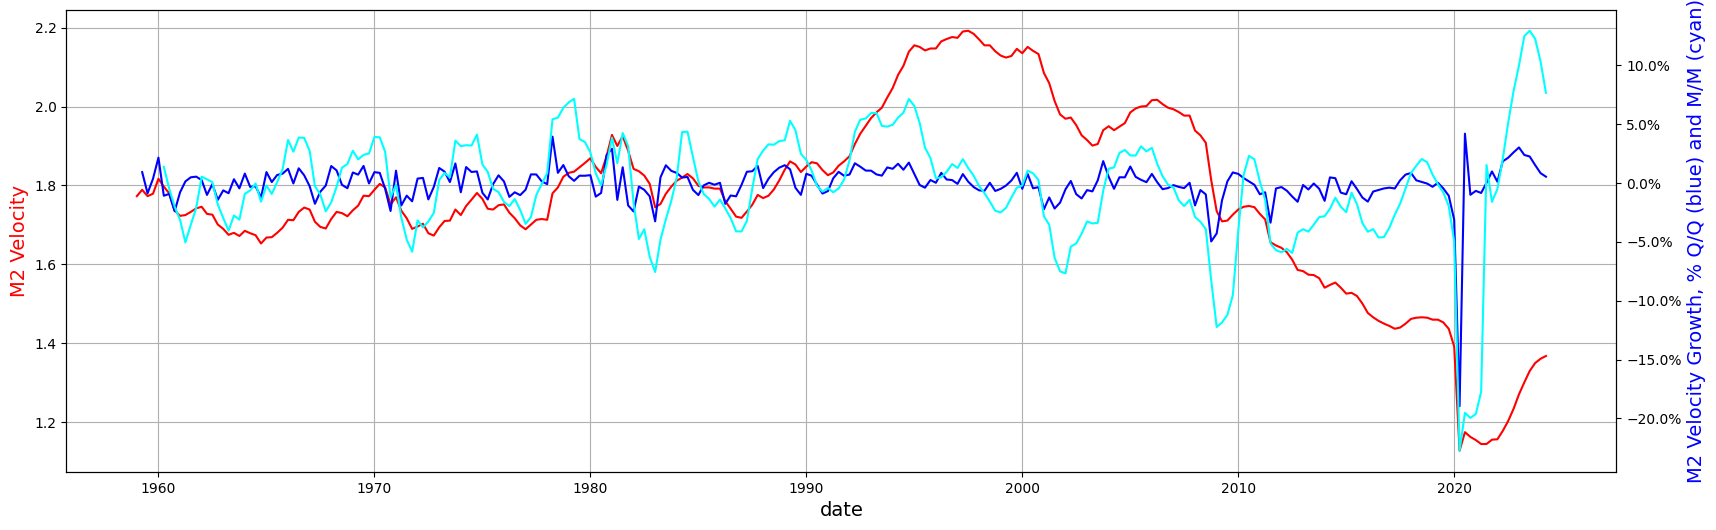

In [245]:
# Visuals M2 Velocity
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(m2v.M2V, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("M2 Velocity",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(m2v.m2v_qoq, color="blue",marker="")
ax2.plot(m2v.m2v_yoy, color="cyan",marker="")
ax2.set_ylabel("M2 Velocity Growth, % Q/Q (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

# m1v.plot.line(figsize=(20,6), grid = True)

In [246]:
#  (FED) Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)	==> y/y, period-to-period?
# https://fred.stlouisfed.org/series/WALCL
walcl = pdr.DataReader("WALCL", "fred", start=start)

In [247]:
walcl['walcl_wow'] = walcl.WALCL/walcl.WALCL.shift(1)-1
walcl['walcl_mom'] = walcl.WALCL/walcl.WALCL.shift(5)-1
walcl.tail()

WALCL  walcl_wow  walcl_mom
DATE                                       
2024-08-07  7175256.0  -0.000437  -0.006406
2024-08-14  7177688.0   0.000339  -0.006422
2024-08-21  7139952.0  -0.005257  -0.009475
2024-08-28  7123238.0  -0.002341  -0.011410
2024-09-04  7112567.0  -0.001498  -0.009170

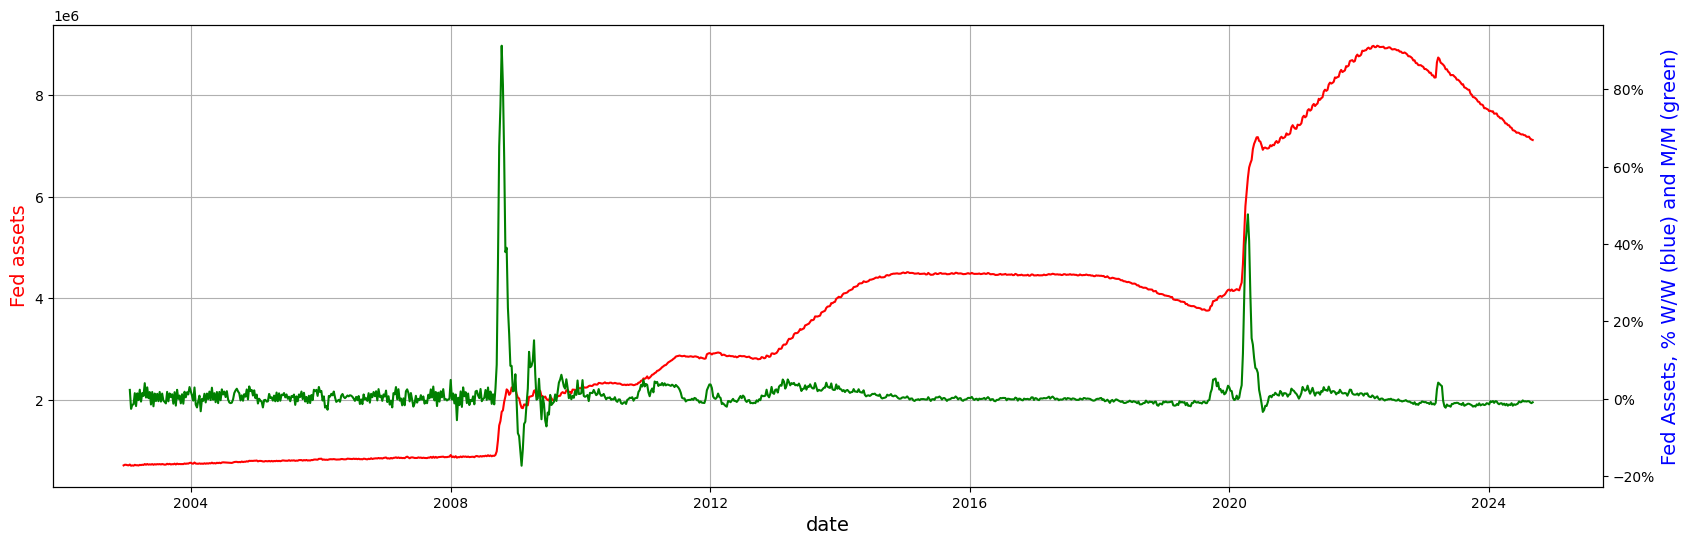

In [251]:
# Fed assets (QE programs)
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(walcl.WALCL, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Fed assets",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(walcl.walcl_wow, color="blue",marker="")
ax2.plot(walcl.walcl_mom, color="green",marker="")
ax2.set_ylabel("Fed Assets, % W/W (blue) and M/M (green)",color="blue",fontsize=14)
plt.show()


## 1.4) INTEREST RATES
*DFF, DTB3, DGS5, DGS10, DGS30, T5YIE, T10YIE*

*NO TRASFORMATIONS TO INTEREST RATES*

In [252]:
# DFF Effective Federal Funds Rate, D from 1954
# https://fred.stlouisfed.org/series/DFF
dff = pdr.DataReader("DFF", "fred", start=start)
dff.tail()

DFF
DATE            
2024-09-01  5.33
2024-09-02  5.33
2024-09-03  5.33
2024-09-04  5.33
2024-09-05  5.33

<Axes: xlabel='DATE'>

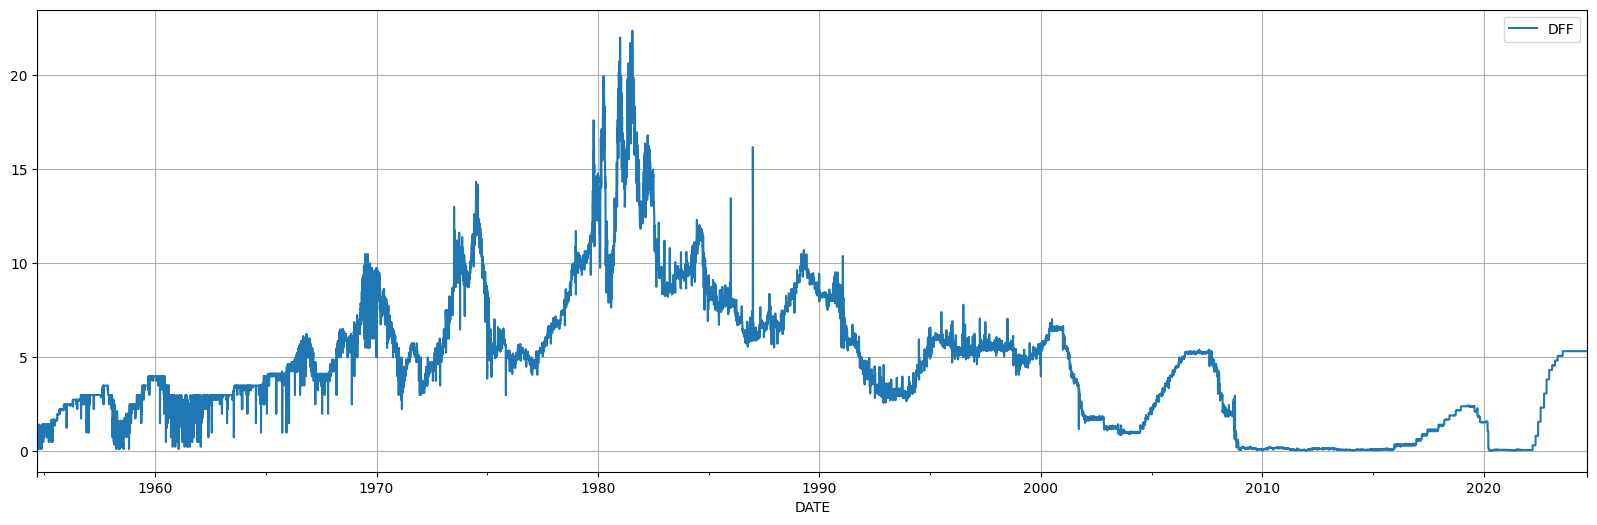

In [253]:
dff.plot.line(figsize=(20,6), grid=True)

In [254]:
# DTB3  3-Month Treasury Bill: Secondary Market Rate, D from 1954
# https://fred.stlouisfed.org/series/DTB3
dtb3 = pdr.DataReader("DTB3", "fred", start=start)
dtb3.tail()

DTB3
DATE            
2024-08-30  4.98
2024-09-02   NaN
2024-09-03  4.97
2024-09-04  4.96
2024-09-05  4.94

<Axes: xlabel='DATE'>

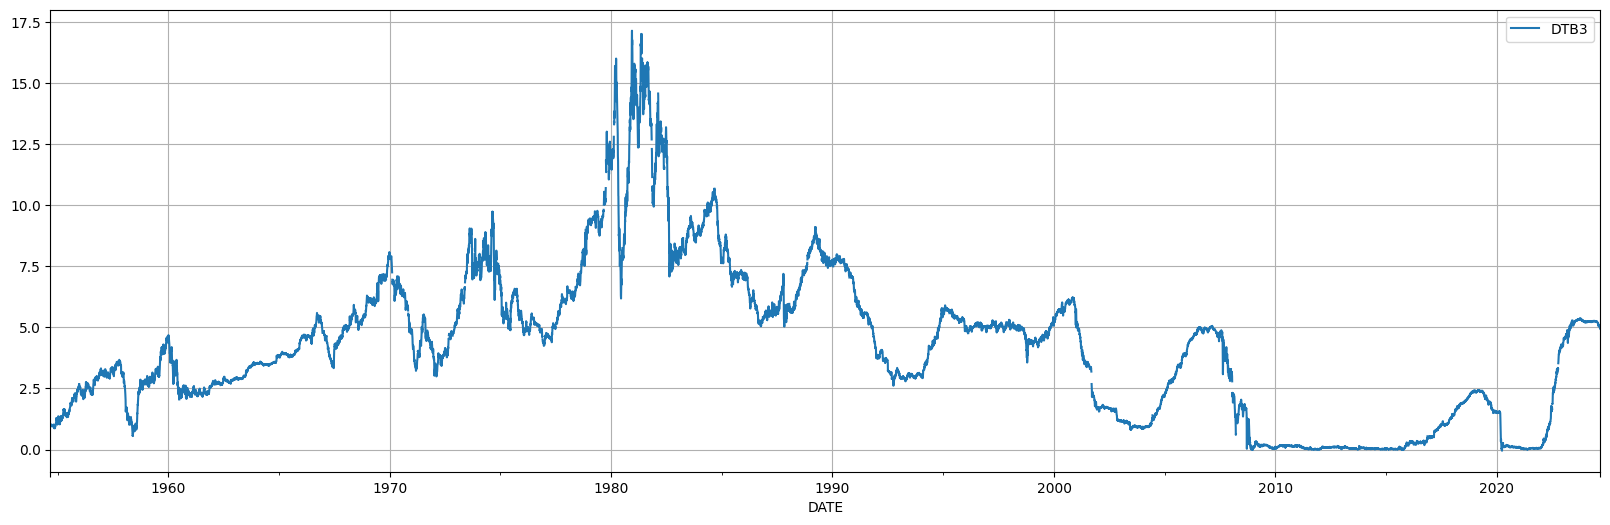

In [255]:
dtb3.plot.line(figsize=(20,6), grid=True)

In [256]:
# DGS5  5-Year Treasury Constant Maturity Rate, D from 1962
# https://fred.stlouisfed.org/series/DGS5

dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

DGS5
DATE            
2024-08-30  3.71
2024-09-02   NaN
2024-09-03  3.65
2024-09-04  3.56
2024-09-05  3.54

<Axes: xlabel='DATE'>

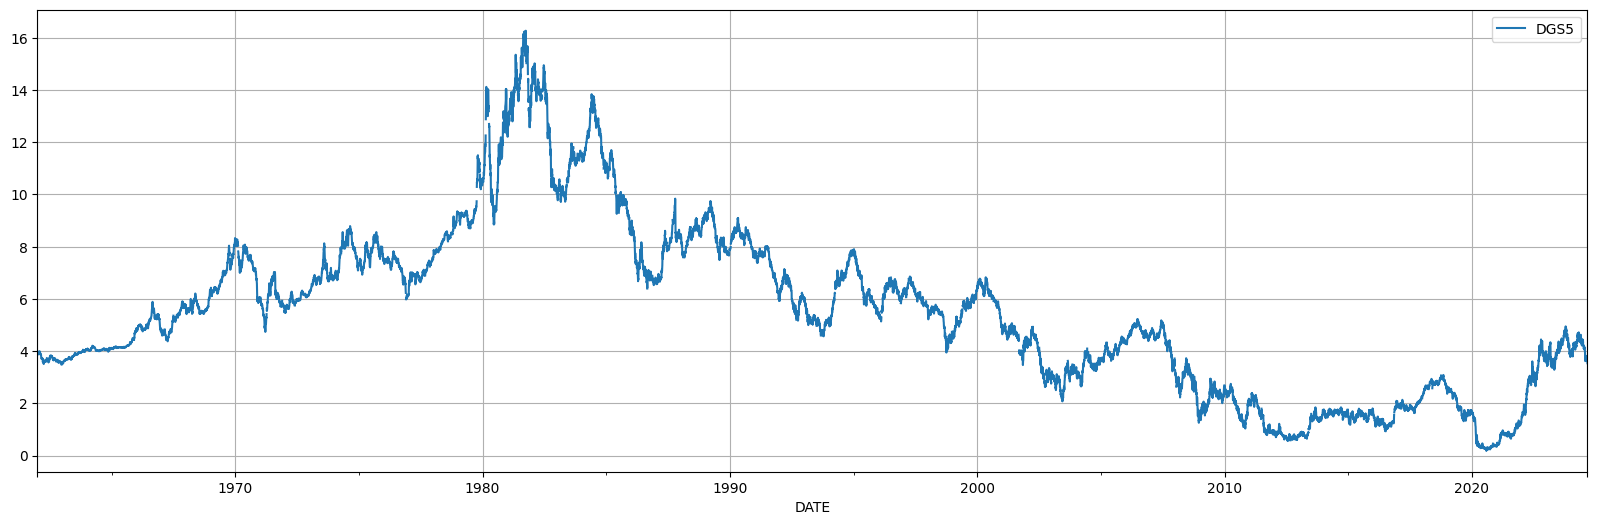

In [257]:
dgs5.plot.line(figsize=(20,6), grid=True)

In [258]:
# DGS10 10-Year Treasury Constant Maturity Rate, D from 1962
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

DGS10
DATE             
2024-08-30   3.91
2024-09-02    NaN
2024-09-03   3.84
2024-09-04   3.77
2024-09-05   3.73

<Axes: xlabel='DATE'>

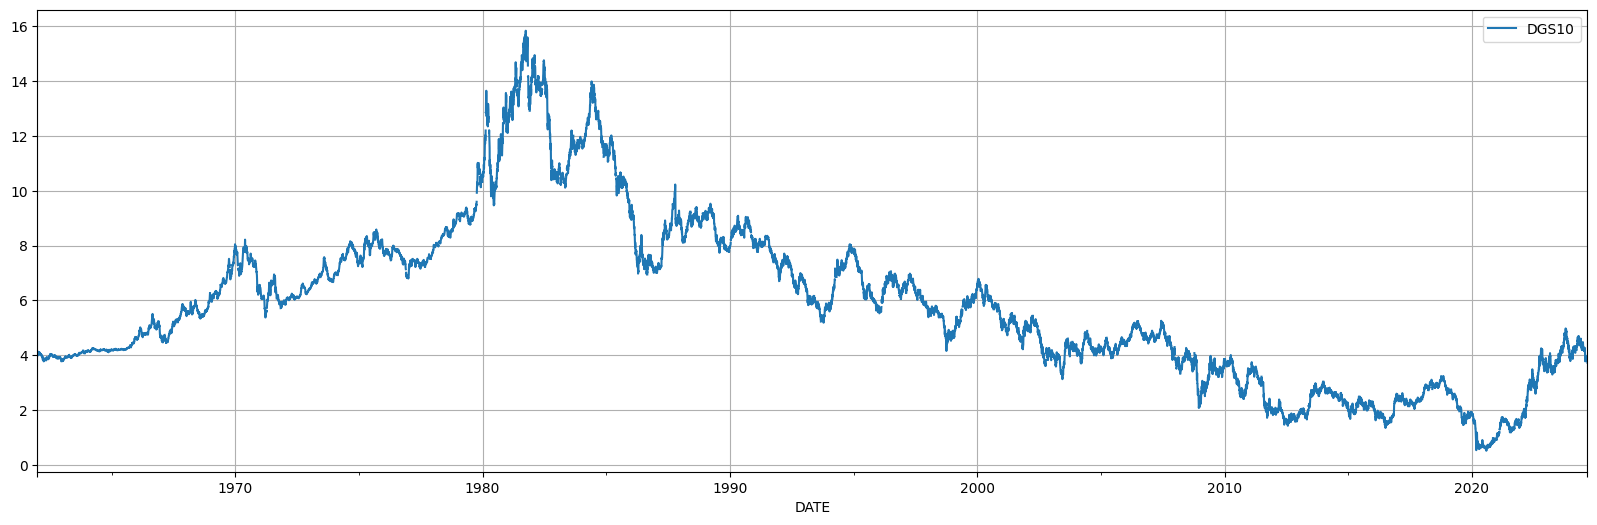

In [259]:
dgs10.plot.line(figsize=(20,6), grid=True)

In [260]:
# DGS30 30-Year Treasury Constant Maturity Rate, D from 1977
# https://fred.stlouisfed.org/series/DGS30
dgs30 = pdr.DataReader("DGS30", "fred", start=start)
dgs30.tail()

DGS30
DATE             
2024-08-30   4.20
2024-09-02    NaN
2024-09-03   4.13
2024-09-04   4.06
2024-09-05   4.02

<Axes: xlabel='DATE'>

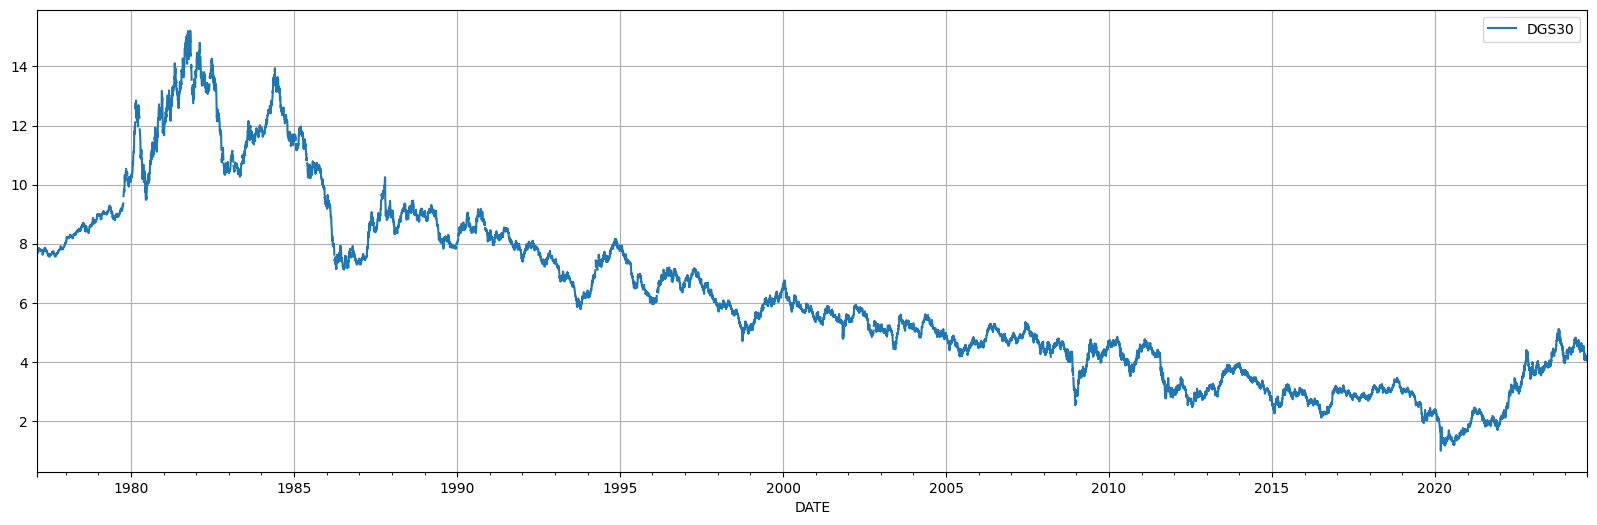

In [261]:
dgs30.plot.line(figsize=(20,6), grid=True)

In [262]:
# T5YIE 5-year Breakeven Inflation Rate, D from 2003
# https://fred.stlouisfed.org/series/T5YIE

t5yie = pdr.DataReader("T5YIE", "fred", start=start)
t5yie.tail()

T5YIE
DATE             
2024-09-02    NaN
2024-09-03   1.95
2024-09-04   1.90
2024-09-05   1.87
2024-09-06   1.86

<Axes: xlabel='DATE'>

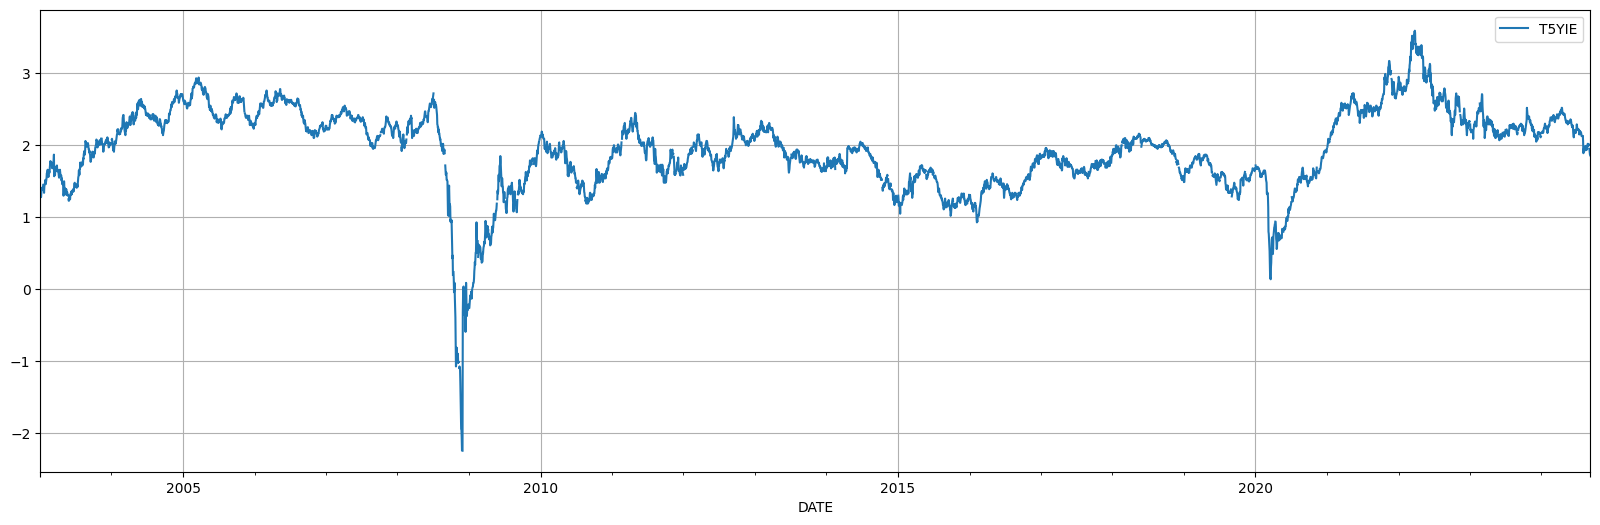

In [263]:
t5yie.plot.line(figsize=(20,6), grid=True)

In [63]:
# T10YIE  10-year Breakeven Inflation Rate, D from 2003
# https://fred.stlouisfed.org/series/T10YIE

t10yie = pdr.DataReader("T10YIE", "fred", start=start)
t10yie.tail()

T10YIE
DATE              
2024-09-02     NaN
2024-09-03    2.11
2024-09-04    2.07
2024-09-05    2.03
2024-09-06    2.03

<Axes: xlabel='DATE'>

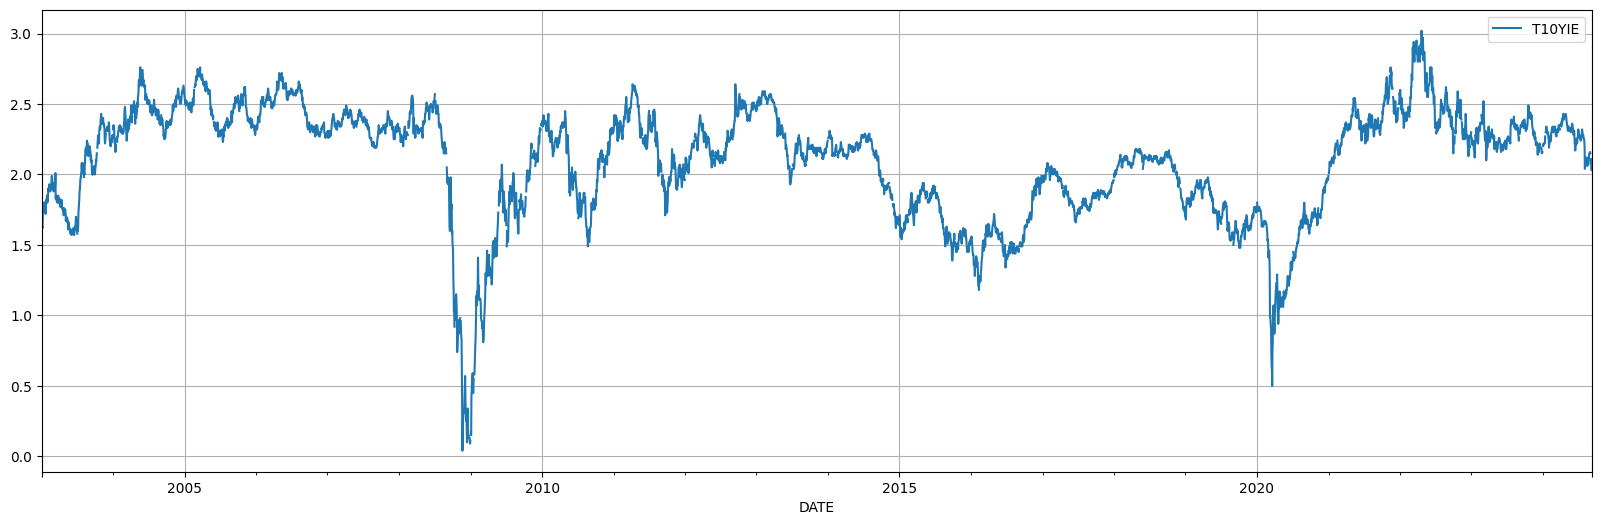

In [64]:
t10yie.plot.line(figsize=(20,6), grid=True)

In [65]:
# T5YIFR  5-Year, 5-Year Forward Inflation Expectation Rate, D from 2003
# https://fred.stlouisfed.org/series/T5YIFR

t5yifr = pdr.DataReader("T5YIFR", "fred", start=start)
t5yifr.tail()

T5YIFR
DATE              
2024-09-02     NaN
2024-09-03    2.27
2024-09-04    2.24
2024-09-05    2.19
2024-09-06    2.20

<Axes: xlabel='DATE'>

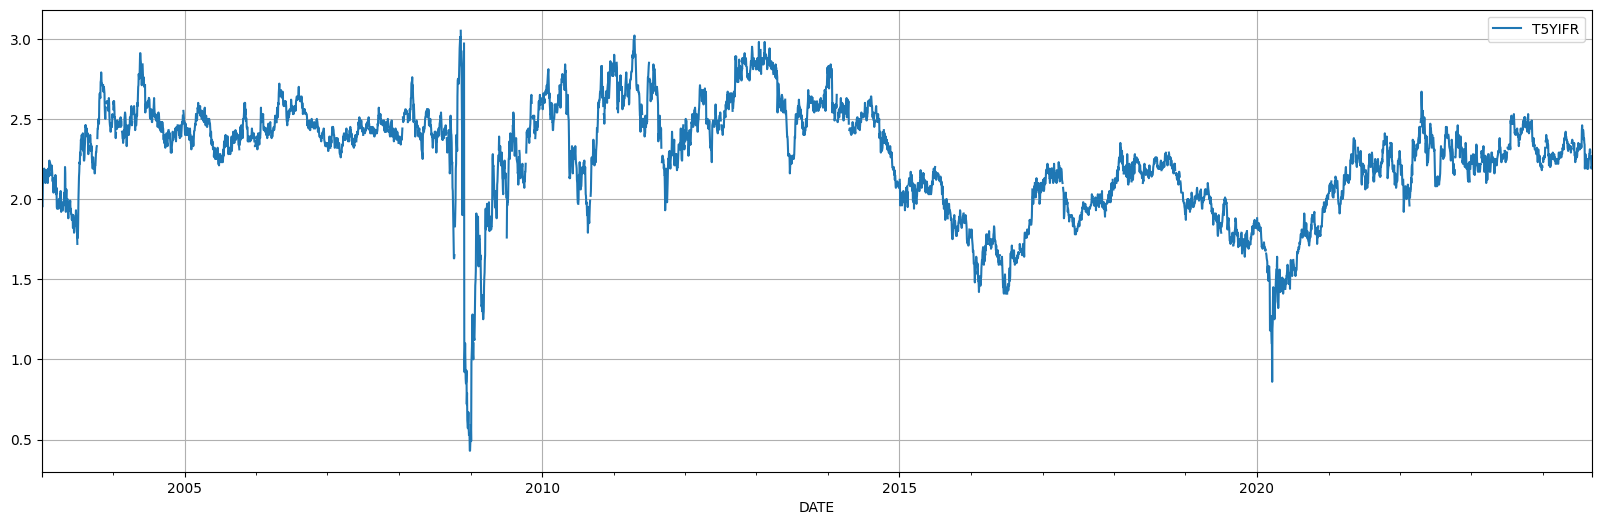

In [66]:
t5yifr.plot.line(figsize=(20,6), grid=True)

In [67]:
# TEDRATE TED Spread, D from 1986
# https://fred.stlouisfed.org/series/TEDRATE
# calculated as the spread between 3-Month LIBOR based on US dollars .
# LIBOR is the rate banks would charge each other for lending, which can be used to measure economy-wide credit risk.
# Treasuries are basically the safest assets on the market.
# So, a large TED spread would indicate a lot of credit risk in the U.S. economy.*

tedrate = pdr.DataReader("TEDRATE", "fred", start=start)
tedrate.tail()

TEDRATE
DATE               
2022-01-17      NaN
2022-01-18     0.08
2022-01-19     0.09
2022-01-20     0.08
2022-01-21     0.09

<Axes: xlabel='DATE'>

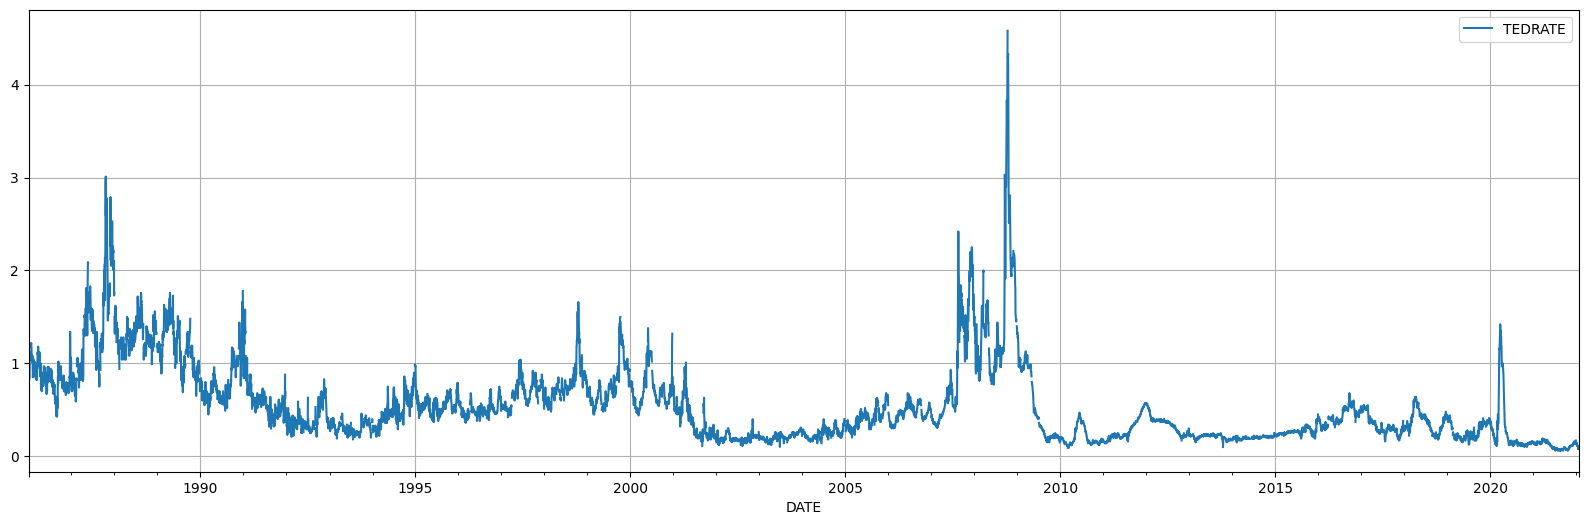

In [68]:
tedrate.plot.line(figsize=(20,6), grid=True)

In [69]:
# DPRIME  Bank Prime Loan Rate, D from 1955
# https://fred.stlouisfed.org/series/DPRIME

dprime = pdr.DataReader("DPRIME", "fred", start=start)
dprime.tail()

DPRIME
DATE              
2024-08-30     8.5
2024-09-02     NaN
2024-09-03     8.5
2024-09-04     8.5
2024-09-05     8.5

<Axes: xlabel='DATE'>

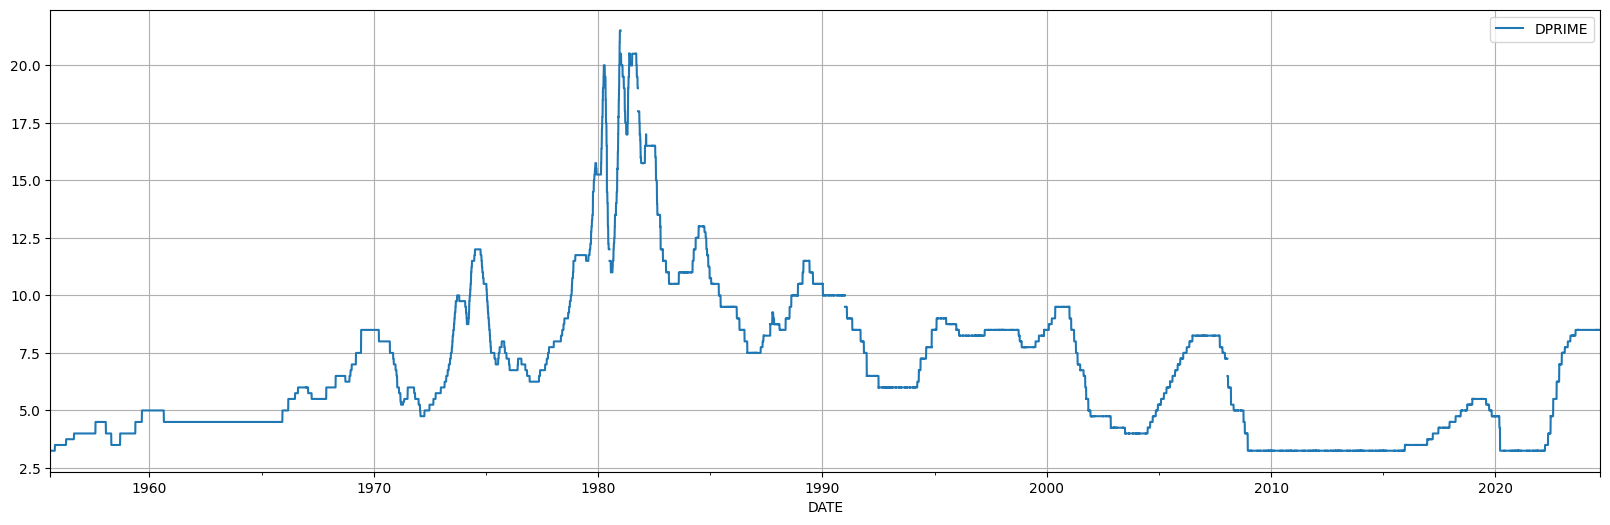

In [70]:
dprime.plot.line(figsize=(20,6), grid=True)

## 1.5) EMPLOYMENT
*UNRATE, NROU, NROUST, CIVPART, EMRATIO, UNEMPLOY, ICSA, IC4WSA*

In [71]:
# UNRATE  Civilian Unemployment Rate, M from 1948
# The unemployment rate represents the number of unemployed as a percentage of the labor force/
# https://fred.stlouisfed.org/series/UNRATE

unrate = pdr.DataReader("UNRATE", "fred", start=start)
unrate['unrate_mom'] = unrate.UNRATE/unrate.UNRATE.shift(1)-1


In [72]:
unrate.tail()

UNRATE  unrate_mom
DATE                          
2024-04-01     3.9    0.026316
2024-05-01     4.0    0.025641
2024-06-01     4.1    0.025000
2024-07-01     4.3    0.048780
2024-08-01     4.2   -0.023256

<Axes: xlabel='DATE'>

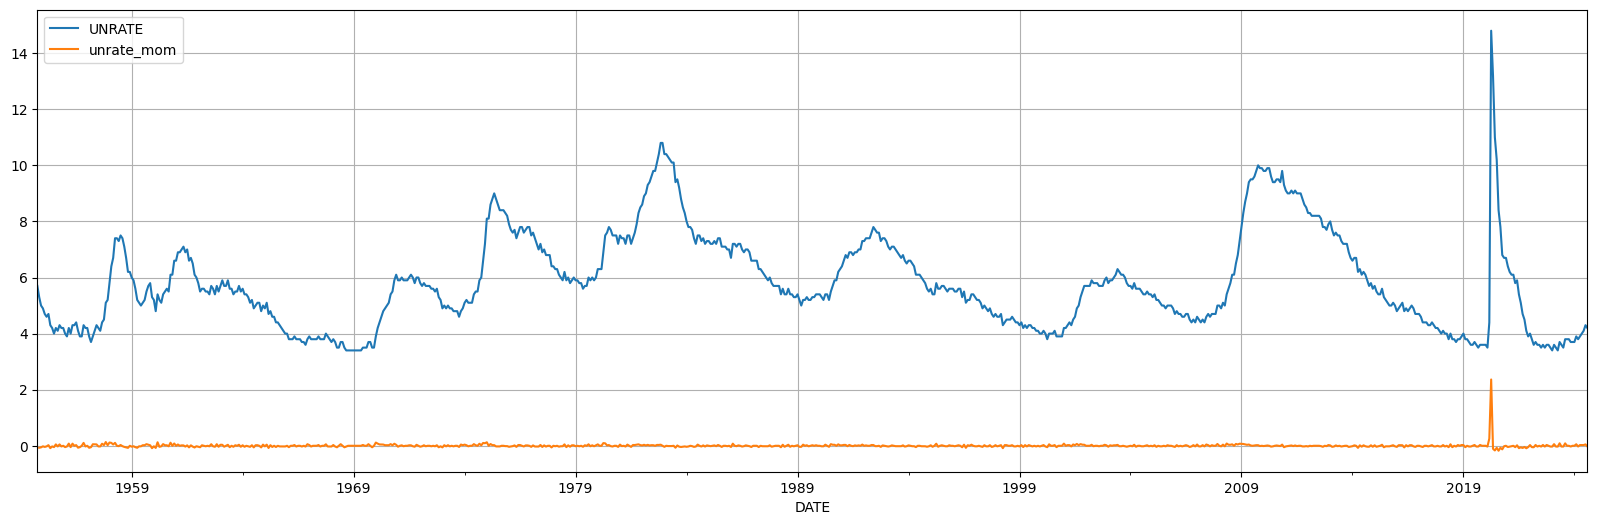

In [73]:
unrate.plot.line(figsize=(20,6), grid=True)

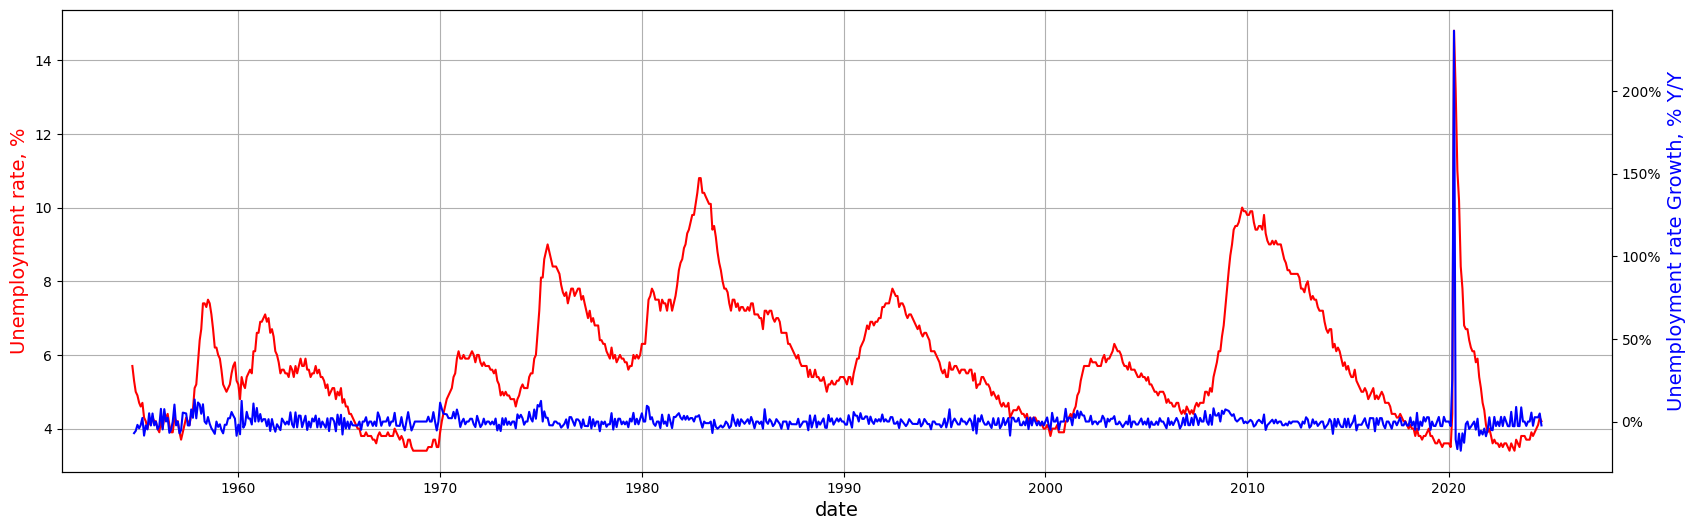

In [188]:
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(unrate.UNRATE, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Unemployment rate, %",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(unrate.unrate_mom, color="blue",marker="")
ax2.set_ylabel("Unemployment rate Growth, % Y/Y",color="blue",fontsize=14)
plt.show()

In [75]:
# "Noncyclical Rate of Unemployment"
# Starting with the July, 2021 report: An Update to the Budget and Economic Outlook: 2021 to 2031,
# this series was renamed from "Natural Rate of Unemployment (Long-Term)" to "Noncyclical Rate of Unemployment".
# https://fred.stlouisfed.org/series/NROU

nrou = pdr.DataReader("NROU", "fred", start=start)
nrou.tail()

NROU
DATE                
2023-07-01  4.422617
2023-10-01  4.419751
2024-01-01  4.416962
2024-04-01  4.414191
2024-07-01  4.411415

<Axes: xlabel='DATE'>

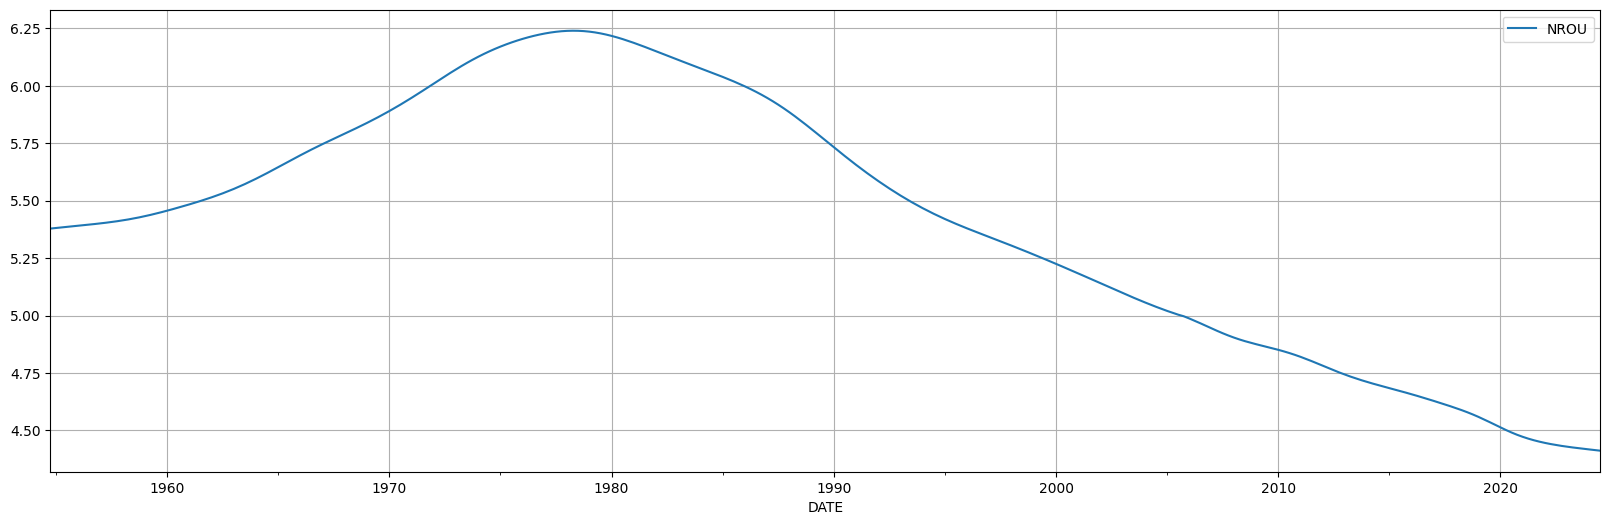

In [76]:
nrou.plot.line(figsize=(20,6), grid=True)

In [77]:
# CIVPART Civilian Labor Force Participation Rate, M from 1948
# https://fred.stlouisfed.org/series/CIVPART
civpart = pdr.DataReader("CIVPART", "fred", start=start)
civpart.tail()

CIVPART
DATE               
2024-04-01     62.7
2024-05-01     62.5
2024-06-01     62.6
2024-07-01     62.7
2024-08-01     62.7

<Axes: xlabel='DATE'>

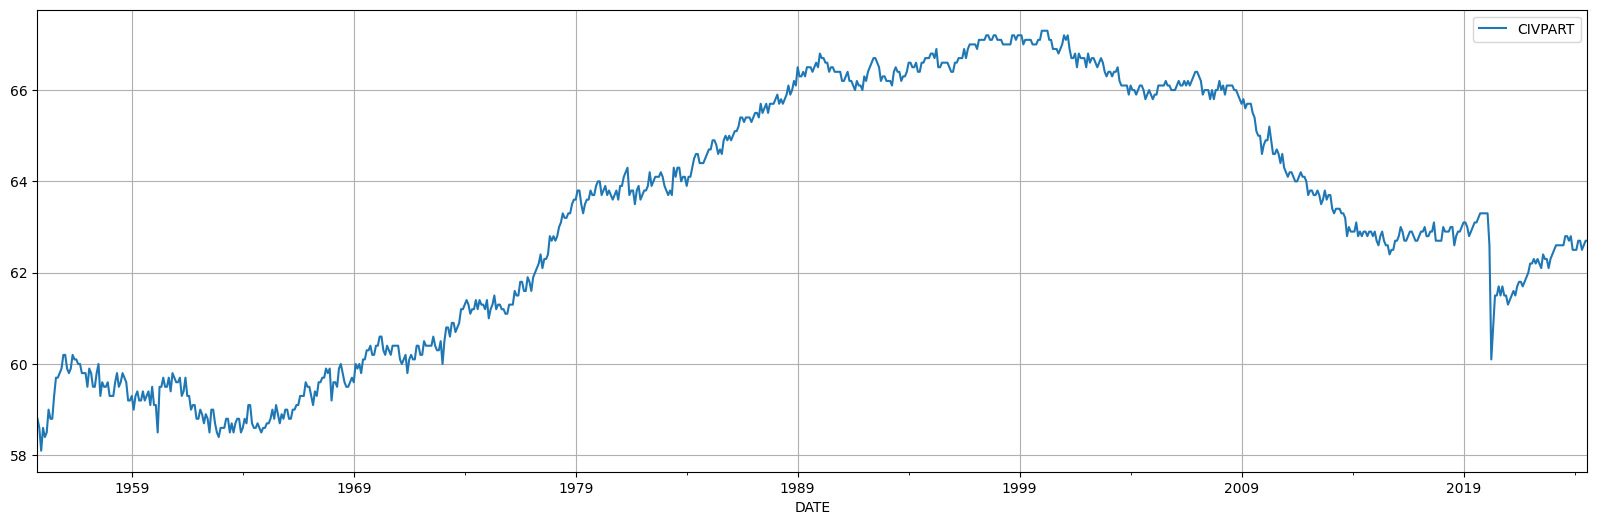

In [78]:
civpart.plot.line(figsize=(20,6), grid=True)

In [189]:
# EMRATIO Civilian Employment-Population Ratio, M from 1948
# https://fred.stlouisfed.org/series/EMRATIO

emratio = pdr.DataReader("EMRATIO", "fred", start=start)
emratio.tail()

EMRATIO
DATE               
2024-04-01     60.2
2024-05-01     60.1
2024-06-01     60.1
2024-07-01     60.0
2024-08-01     60.0

<Axes: xlabel='DATE'>

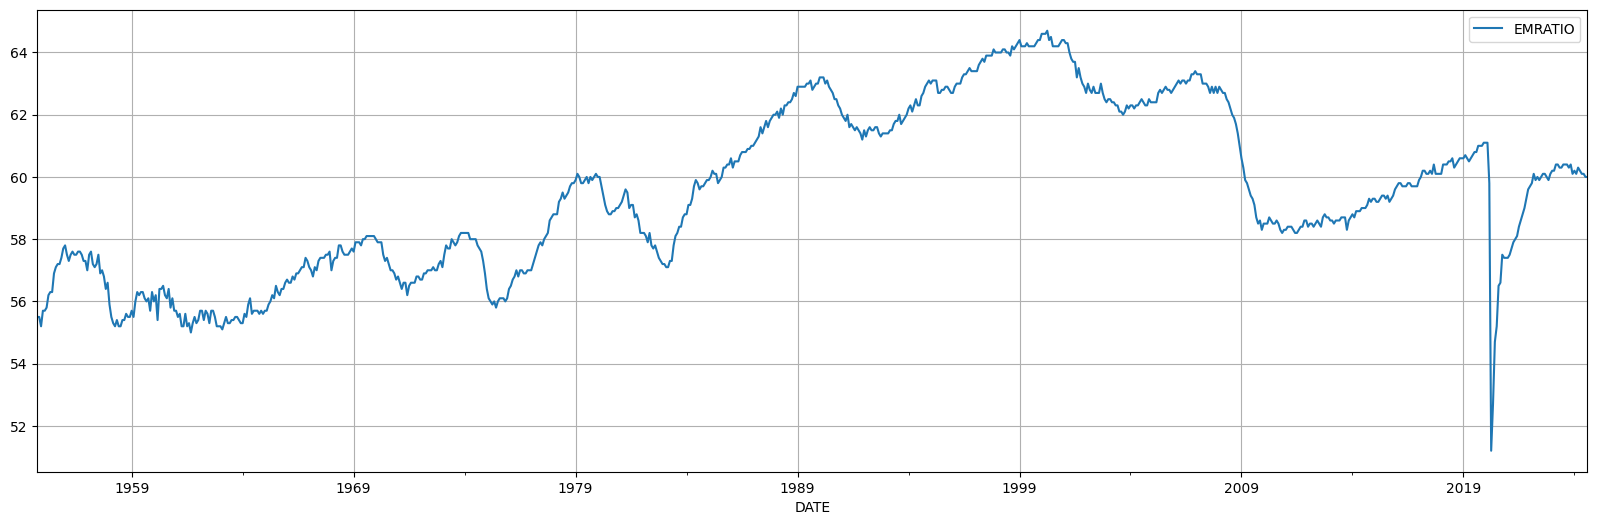

In [80]:
emratio.plot.line(figsize=(20,6), grid=True)

In [81]:
# UNEMPLOY  Unemployed, M from 1948 => make y/y ?
# https://fred.stlouisfed.org/series/UNEMPLOY
# https://fredblog.stlouisfed.org/2017/06/the-recent-evolution-of-labor-force-participation/
unemploy = pdr.DataReader("UNEMPLOY", "fred", start=start)
unemploy.tail()

UNEMPLOY
DATE                
2024-04-01      6492
2024-05-01      6649
2024-06-01      6811
2024-07-01      7163
2024-08-01      7115

<Axes: xlabel='DATE'>

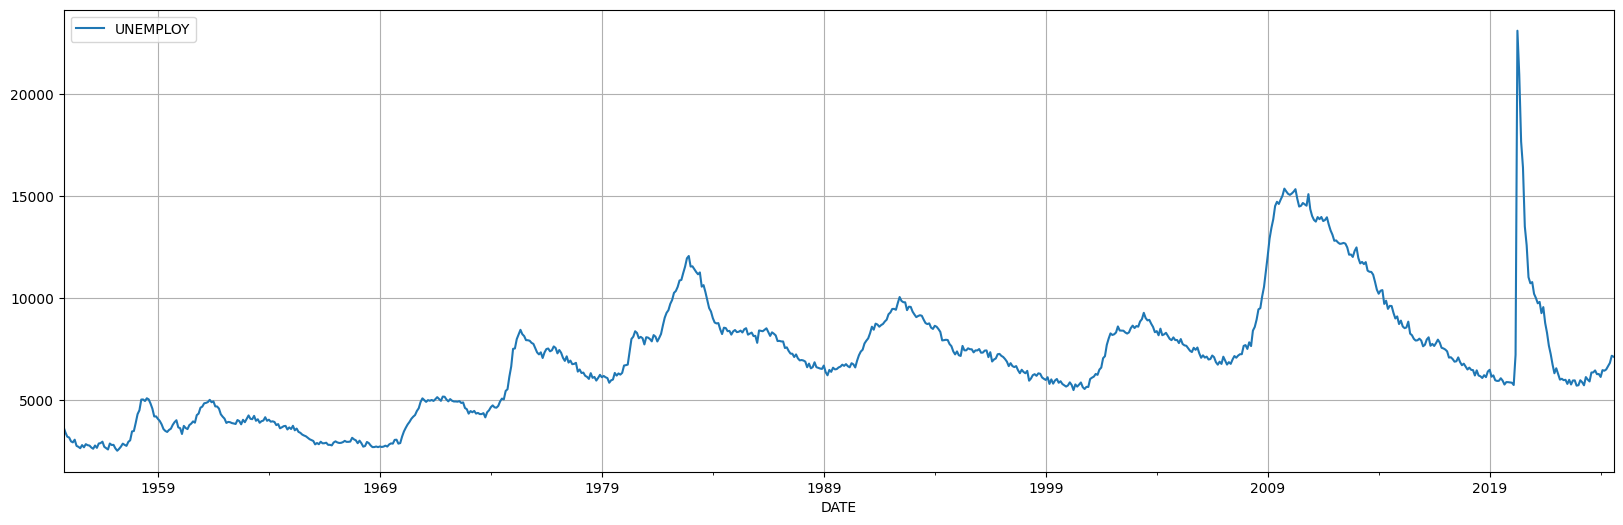

In [82]:
unemploy.plot.line(figsize=(20,6), grid=True)

In [83]:
# PAYEMS (All Employees, Total Nonfarm (PAYEMS) - THousands of persons => make y/y ?
# https://fred.stlouisfed.org/series/PAYEMS
# All Employees: Total Nonfarm, commonly known as Total Nonfarm Payroll, is a measure of the number of U.S. workers
# in the economy that excludes proprietors, private household employees, unpaid volunteers, farm employees, and the
# unincorporated self-employed. This measure accounts for approximately 80 percent of the workers who contribute
# to Gross Domestic Product (GDP).
payems = pdr.DataReader("PAYEMS", "fred", start=start)

payems['payems_yoy'] = payems.PAYEMS / payems.PAYEMS.shift(12)-1
payems['payems_mom'] = payems.PAYEMS / payems.PAYEMS.shift(1)-1

In [84]:
payems.tail(13)

PAYEMS  payems_yoy  payems_mom
DATE                                      
2023-08-01  156421    0.020485    0.001344
2023-09-01  156667    0.020393    0.001573
2023-10-01  156832    0.019071    0.001053
2023-11-01  157014    0.018546    0.001160
2023-12-01  157304    0.019528    0.001847
2024-01-01  157560    0.018007    0.001627
2024-02-01  157796    0.017645    0.001498
2024-03-01  158106    0.018685    0.001965
2024-04-01  158214    0.017558    0.000683
2024-05-01  158430    0.016965    0.001365
2024-06-01  158548    0.016157    0.000745
2024-07-01  158637    0.015530    0.000561
2024-08-01  158779    0.015075    0.000895

<Axes: xlabel='DATE'>

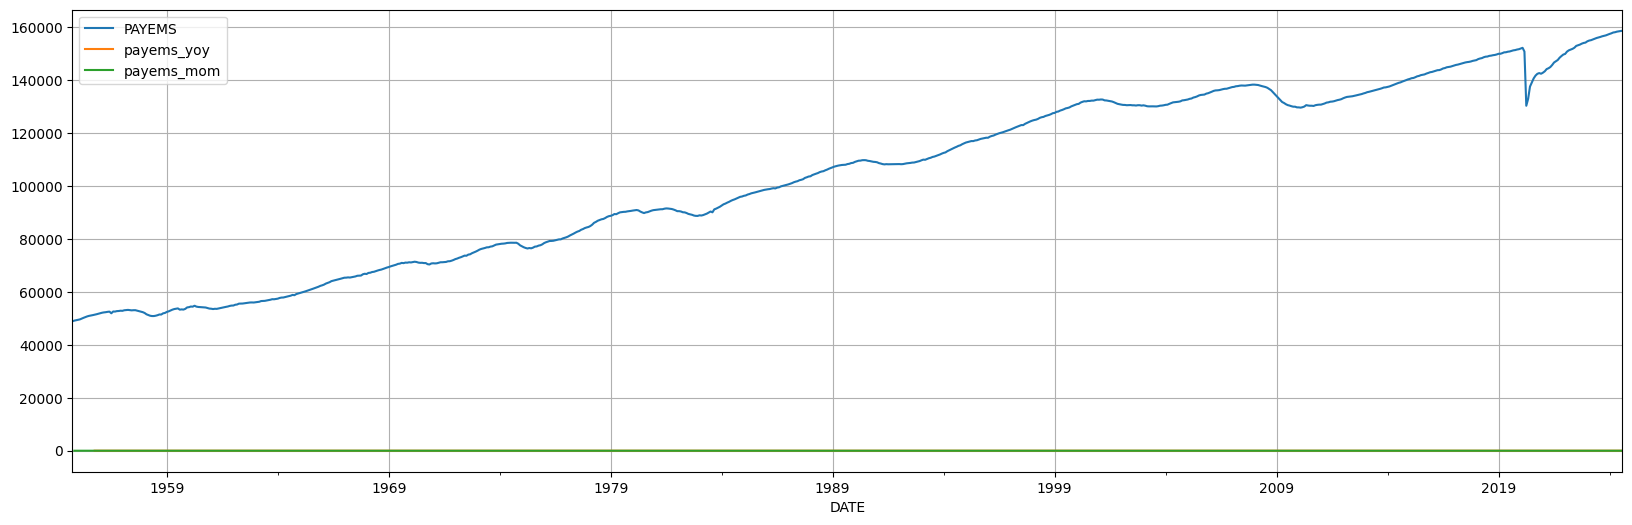

In [85]:
payems.plot.line(figsize=(20,6), grid=True)

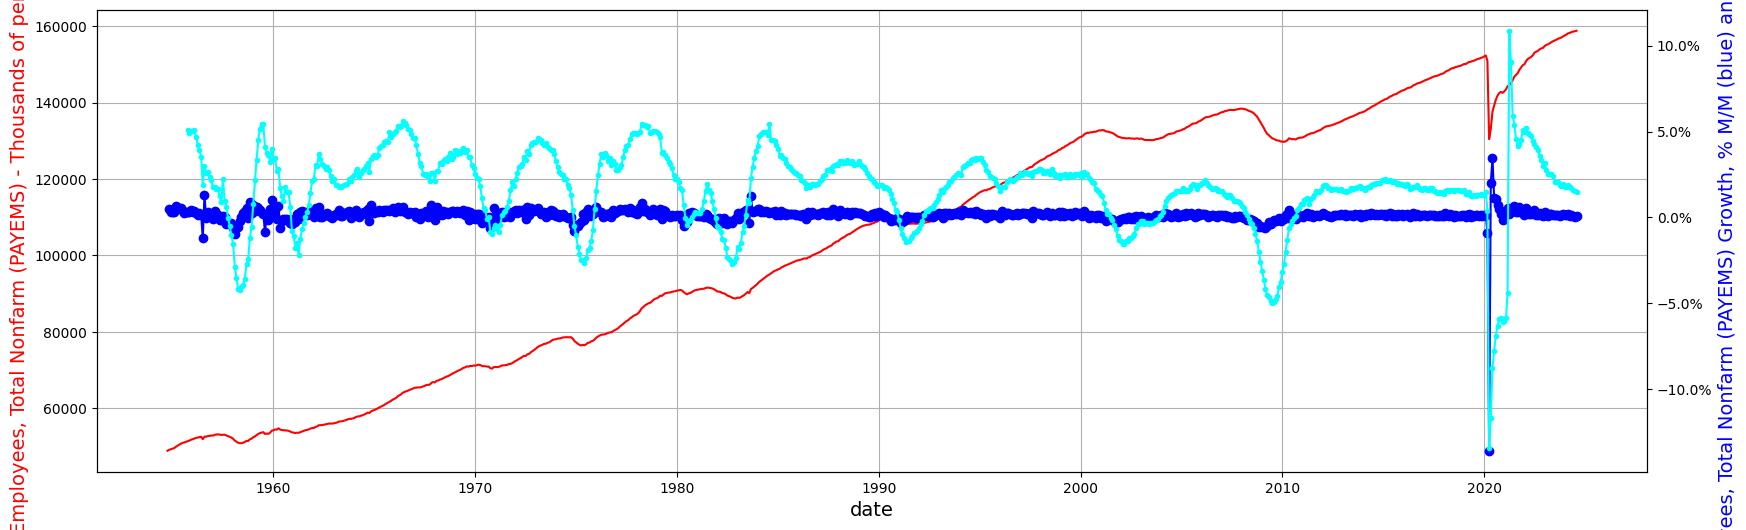

In [86]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(payems.PAYEMS, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Employees, Total Nonfarm (PAYEMS) - Thousands of persons",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(payems['payems_mom'], color="blue",marker="o")
ax2.plot(payems['payems_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Employees, Total Nonfarm (PAYEMS) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [265]:
# MANEMP  All Employees: Manufacturing, M from 1939 =>  make MANEMP/PAYEMS? => or y/y?

# https://fred.stlouisfed.org/series/MANEMP

manemp = pdr.DataReader("MANEMP", "fred", start=start)

manemp['manemp_yoy'] = manemp.MANEMP / manemp.MANEMP.shift(12)-1
manemp['manemp_mom'] = manemp.MANEMP / manemp.MANEMP.shift(1)-1

In [88]:
manemp.tail()

MANEMP  manemp_yoy  manemp_mom
DATE                                      
2024-04-01   12958    0.001314    0.000540
2024-05-01   12961    0.001933    0.000232
2024-06-01   12945    0.000000   -0.001234
2024-07-01   12951    0.000927    0.000463
2024-08-01   12927   -0.001082   -0.001853

<Axes: xlabel='DATE'>

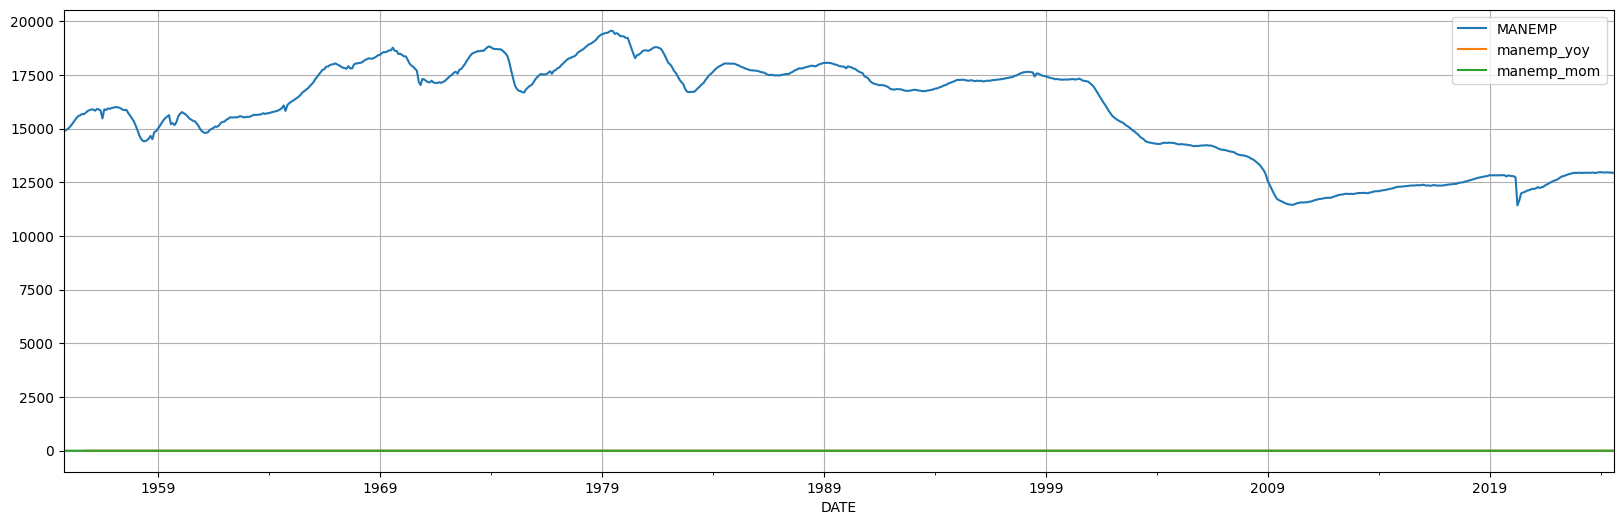

In [89]:
manemp.plot.line(figsize=(20,6), grid=True)

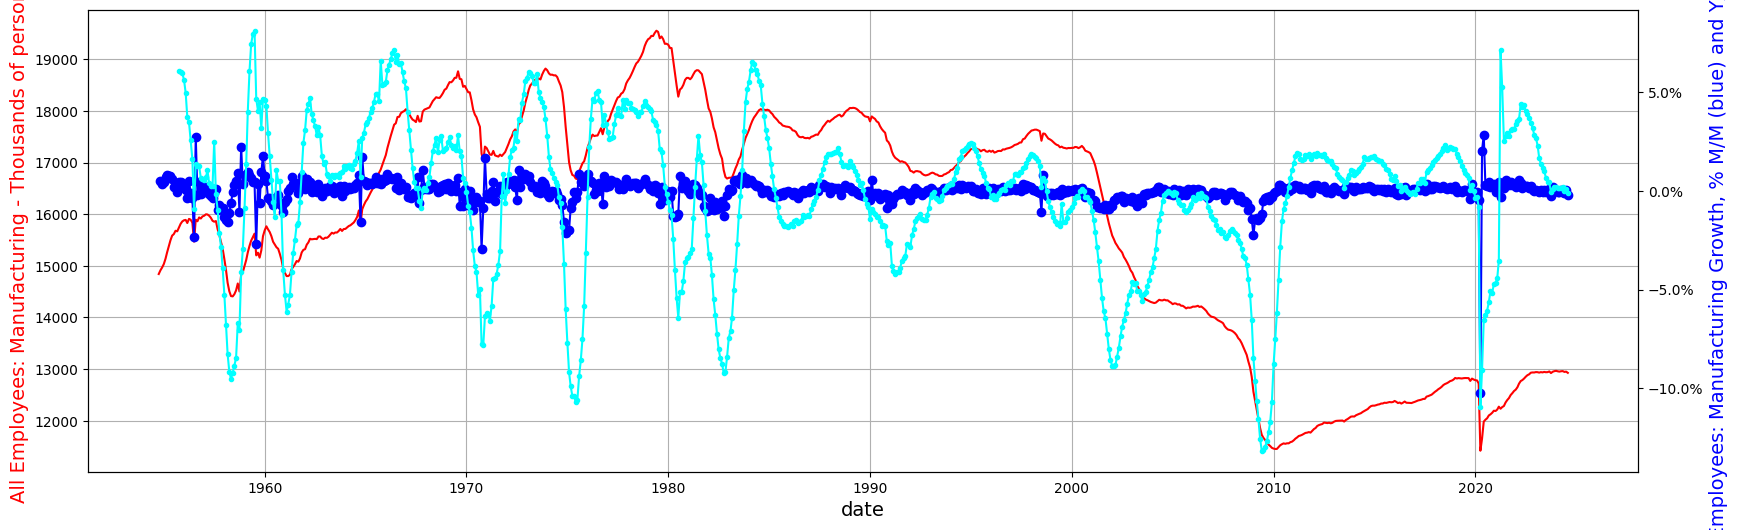

In [90]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(manemp.MANEMP, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("All Employees: Manufacturing - Thousands of persons",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(manemp['manemp_mom'], color="blue",marker="o")
ax2.plot(manemp['manemp_yoy'], color="cyan",marker=".")
ax2.set_ylabel("All Employees: Manufacturing Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [91]:
# ICSA  Initial Claims (claims for unemployment), W from 1967 -> divite to the labour force?
  # An initial claim is a claim filed by an unemployed individual after a separation from an employer.
  # The claim requests a determination of basic eligibility for the Unemployment Insurance program.
# https://fred.stlouisfed.org/series/ICSA

icsa = pdr.DataReader("ICSA", "fred", start=start)
icsa['icsa_wow'] = icsa.ICSA / icsa.ICSA.shift(1)-1
icsa['icsa_mom'] = icsa.ICSA / icsa.ICSA.shift(4)-1

In [92]:
icsa.tail()

ICSA  icsa_wow  icsa_mom
DATE                                  
2024-08-03  234000 -0.064000  0.049327
2024-08-10  228000 -0.025641 -0.069388
2024-08-17  233000  0.021930 -0.008511
2024-08-24  232000 -0.004292 -0.072000
2024-08-31  227000 -0.021552 -0.029915

<Axes: xlabel='DATE'>

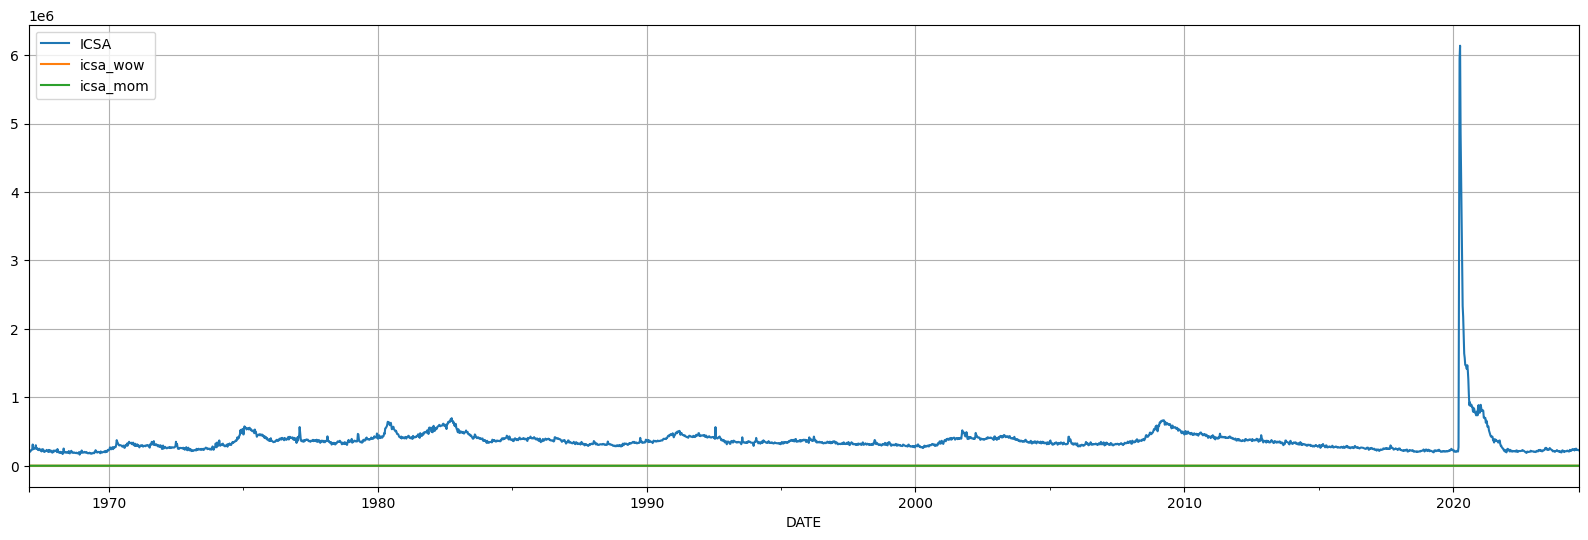

In [93]:
icsa.plot.line(figsize=(20,6), grid=True)

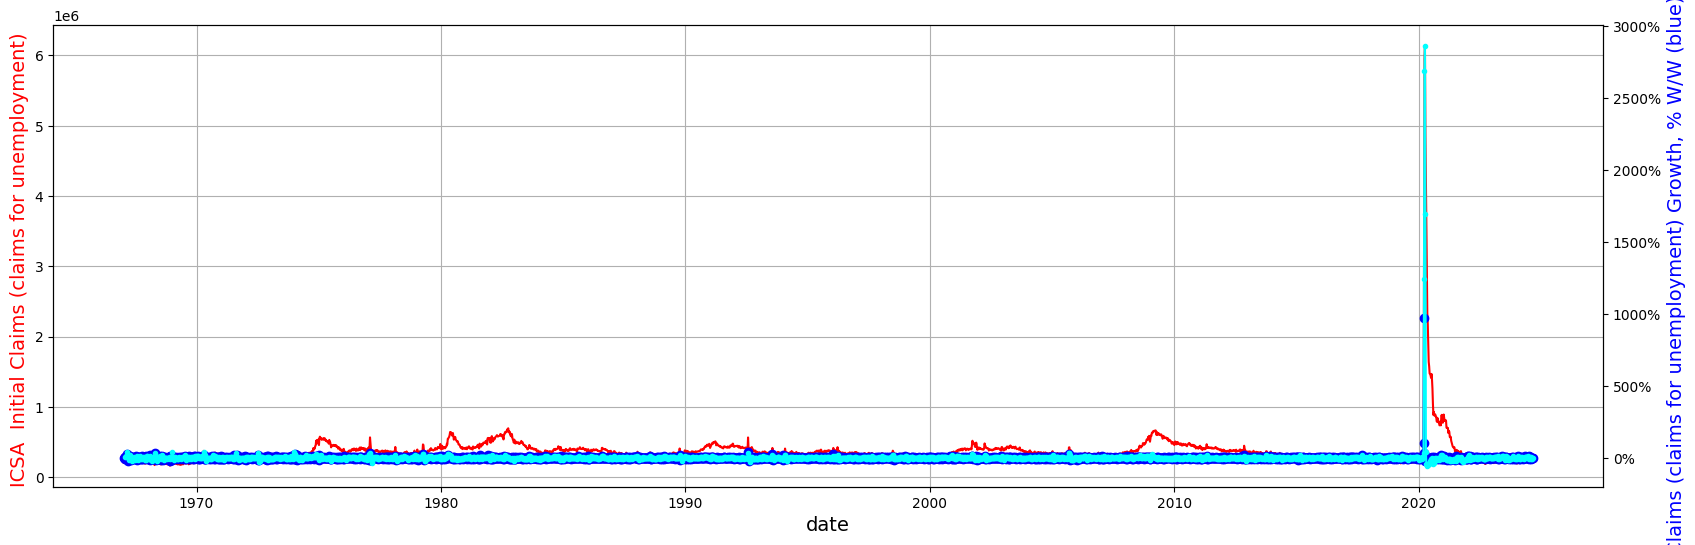

In [94]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(icsa.ICSA, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("ICSA  Initial Claims (claims for unemployment) ",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(icsa['icsa_wow'], color="blue",marker="o")
ax2.plot(icsa['icsa_mom'], color="cyan",marker=".")
ax2.set_ylabel("ICSA  Initial Claims (claims for unemployment) Growth, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

In [95]:
# IC4WSA  4-Week Moving Average of Initial Claims, W from 1967 ==> make y/y? make icsa/ic4wsa ?
# https://fred.stlouisfed.org/series/IC4WSA

ic4wsa = pdr.DataReader("IC4WSA", "fred", start=start)

ic4wsa['ic4wsa_qoq'] = ic4wsa.IC4WSA / ic4wsa.IC4WSA.shift(13)-1
ic4wsa['ic4wsa_yoy'] = ic4wsa.IC4WSA / ic4wsa.IC4WSA.shift(52)-1

In [96]:
ic4wsa.tail()

IC4WSA  ic4wsa_qoq  ic4wsa_yoy
DATE                                      
2024-08-03  241000    0.119628    0.004167
2024-08-10  236750    0.086009   -0.030706
2024-08-17  236250    0.073864   -0.042553
2024-08-24  231750    0.039238   -0.055046
2024-08-31  230000    0.034871   -0.032597

<Axes: xlabel='DATE'>

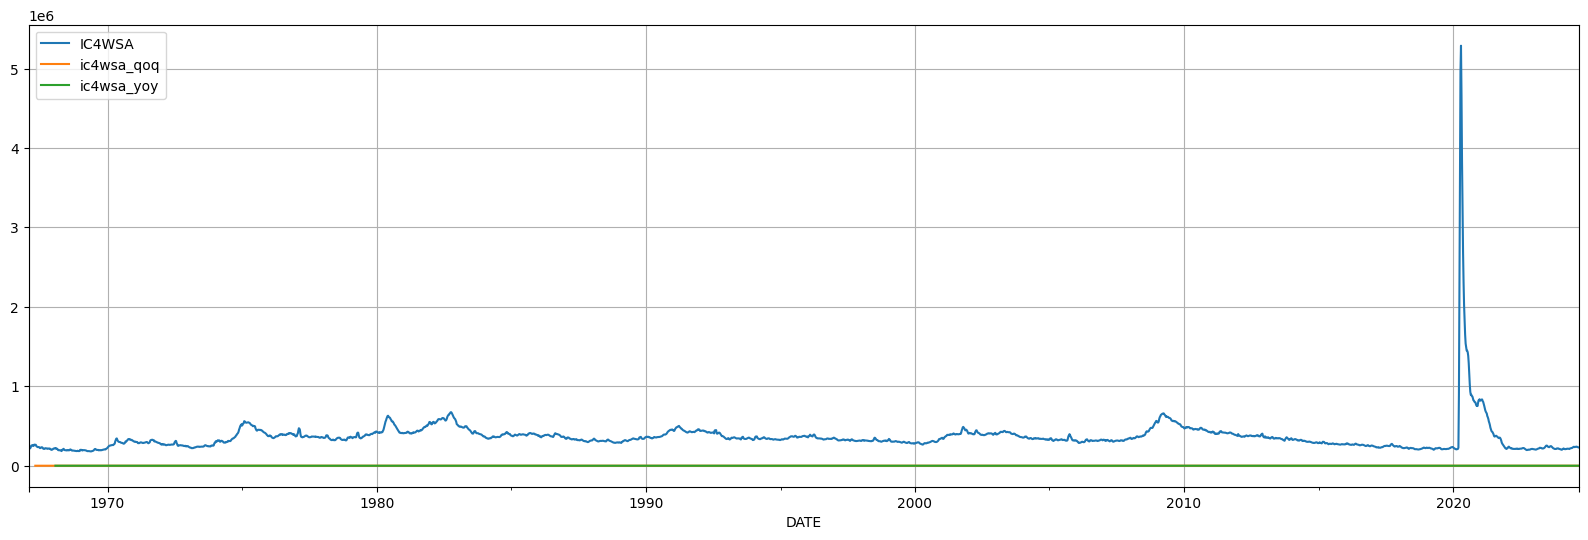

In [97]:
ic4wsa.plot.line(figsize=(20,6), grid=True)

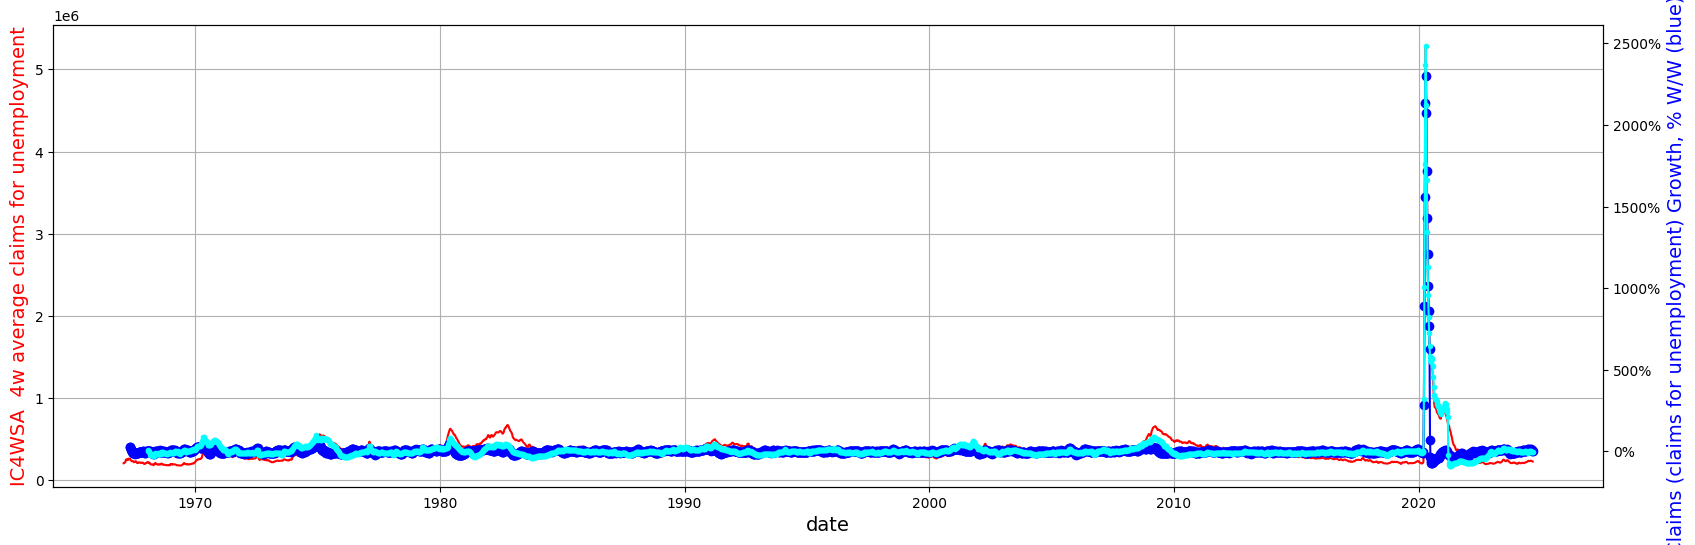

In [98]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(ic4wsa.IC4WSA, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("IC4WSA  4w average claims for unemployment",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(ic4wsa['ic4wsa_qoq'], color="blue",marker="o")
ax2.plot(ic4wsa['ic4wsa_yoy'], color="cyan",marker=".")
ax2.set_ylabel("ICSA  Initial Claims (claims for unemployment) Growth, % W/W (blue) and M/M (cyan)",color="blue",fontsize=14)
plt.show()

## 1.6) INCOME AND EXPENDITURE
*CDSP, MDSP, FODSP, DSPIC96, PCE, PCEDG, **PSAVERT**, RRSFS, DSPI*

In [266]:
# (QUARTERLY) HOUSEHOLD FINANCIAL OBLIGATIONS as %% of disposable income: CDSP, FODSP, MDSP, TDSP
  # Article: https://fredblog.stlouisfed.org/2019/10/households-lightening-debt-load/
    # This FRED graph shows the percentage of disposable (i.e., after-tax) income that households dedicate
    # to servicing specific types of debt. The graph has four lines (CDSP, FODSP, MDSP, TDSP). Let’s start at the bottom: The green
    # line shows mortgage debt, and the red line shows consumer debt (credit card, auto, and personal loans).
    # The blue line is the sum of the red and green lines. And the purple line adds to the blue line some other
    # financial commitments, such as rent, auto leases, homeowners’ insurance, and property taxes.

cdsp = pdr.DataReader("CDSP", "fred", start=start)
fodsp = pdr.DataReader("FODSP", "fred", start=start)
mdsp = pdr.DataReader("MDSP", "fred", start=start)
tdsp = pdr.DataReader("TDSP", "fred", start=start)


In [267]:
# Consumer debt (credit card, auto, and pers loans)
cdsp.tail()

CDSP
DATE                
2023-01-01  5.769513
2023-04-01  5.770318
2023-07-01  5.791492
2023-10-01  5.805252
2024-01-01  5.780963

<Axes: xlabel='DATE'>

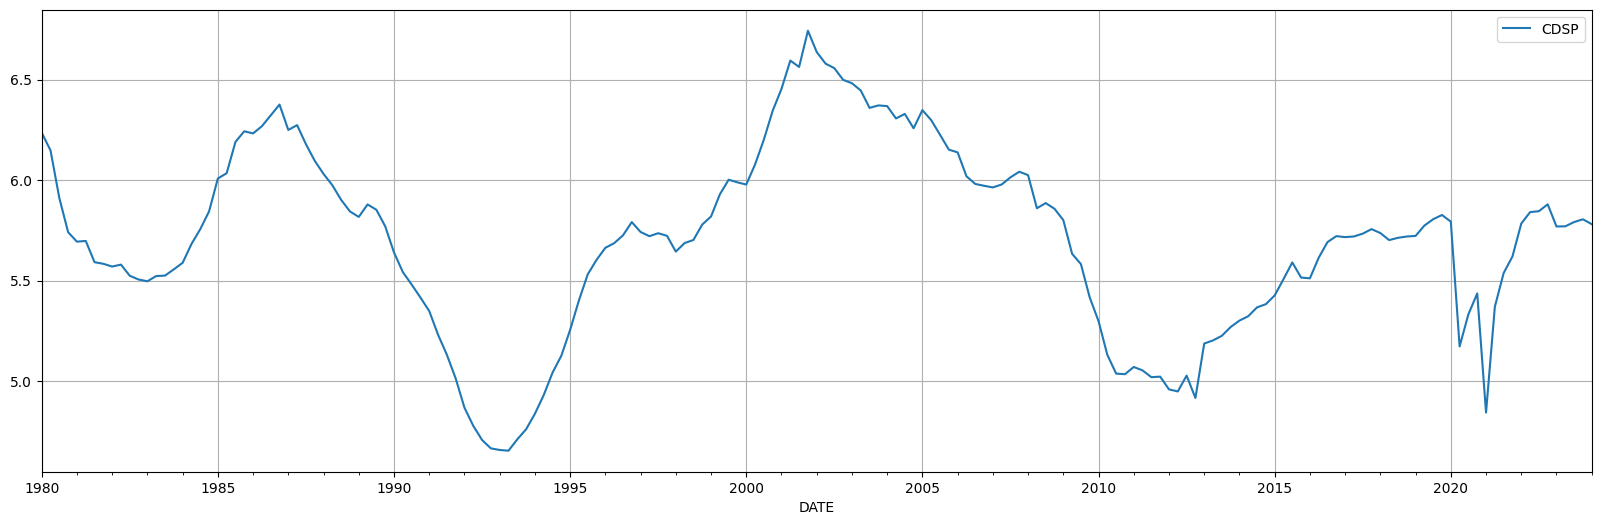

In [268]:
cdsp.plot.line(figsize=(20,6), grid=True)

In [102]:
# Mortgage debt
mdsp.tail()

MDSP
DATE                
2023-01-01  3.938904
2023-04-01  3.933429
2023-07-01  3.989379
2023-10-01  4.025787
2024-01-01  3.995156

<Axes: xlabel='DATE'>

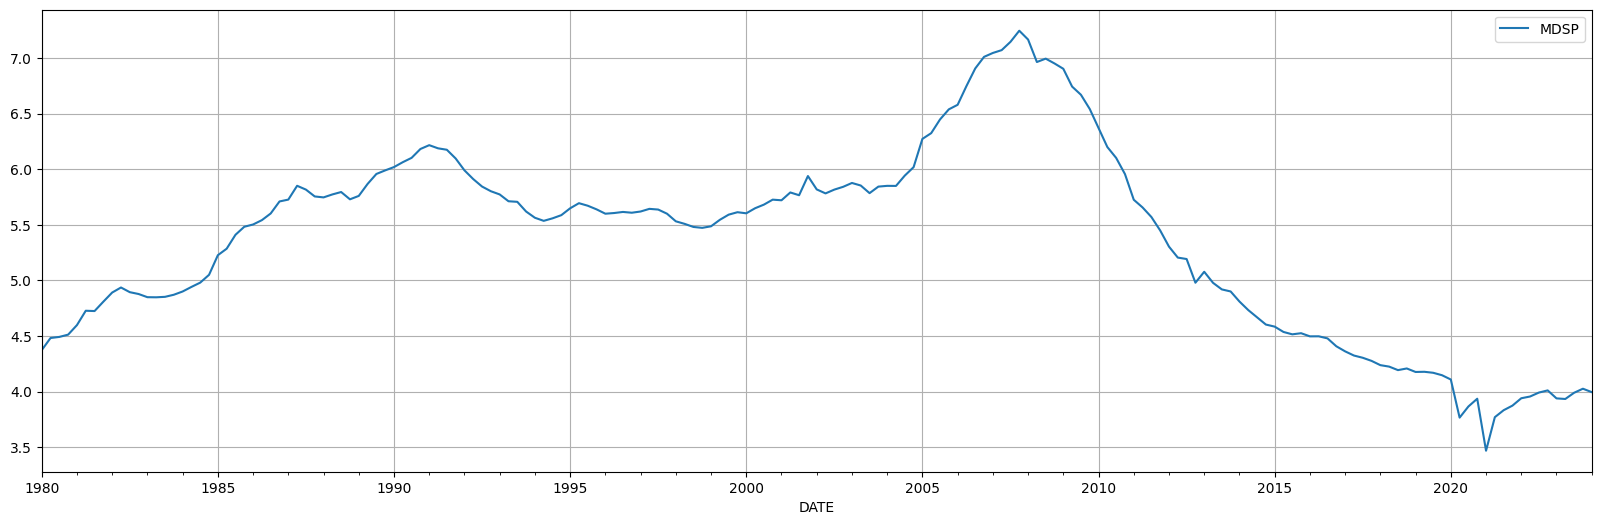

In [103]:
mdsp.plot.line(figsize=(20,6), grid=True)

In [104]:
#  Household Debt Service Payments as a Percent of Disposable Personal Income (TDSP)
#  tdsp = mdsp + cdsp
#  DO NOT INCLUDE THIS to the df, as we include 2 of its components
tdsp.tail()

TDSP
DATE                
2023-01-01  9.708416
2023-04-01  9.703748
2023-07-01  9.780870
2023-10-01  9.831039
2024-01-01  9.776119

In [105]:
#  Household Financial Obligations as a Percent of Disposable Personal Income (FODSP)
#  The Financial Obligations Ratio is a broader measure than the Debt Service Ratio (TDSP).
#  It includes rent payments on tenant-occupied property, auto lease payments, homeowners' insurance, and property tax payments.
fodsp.tail()

FODSP
DATE                 
2022-07-01  14.351680
2022-10-01  14.397505
2023-01-01  14.123631
2023-04-01  14.109284
2023-07-01  14.198002

<Axes: xlabel='DATE'>

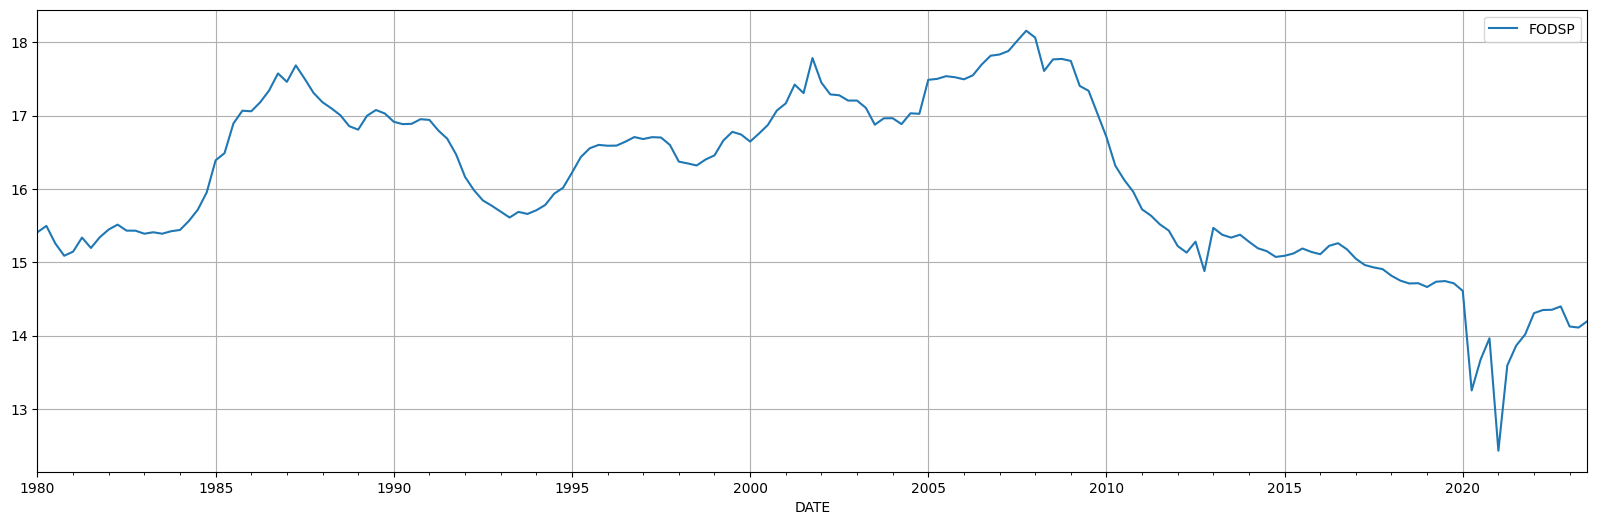

In [106]:
fodsp.plot.line(figsize=(20,6), grid=True)

In [107]:
# Real Disposable Personal Income [DSPIC96]
dspic96 = pdr.DataReader("DSPIC96", "fred", start=start)


dspic96['dspic96_mom'] = dspic96.DSPIC96 / dspic96.DSPIC96.shift(1)-1
dspic96['dspic96_yoy'] = dspic96.DSPIC96 / dspic96.DSPIC96.shift(12)-1

In [108]:
dspic96.tail()

DSPIC96  dspic96_mom  dspic96_yoy
DATE                                         
2024-03-01  16924.3     0.001592     0.011602
2024-04-01  16914.2    -0.000597     0.008966
2024-05-01  16969.3     0.003258     0.008966
2024-06-01  16983.9     0.000860     0.010375
2024-07-01  17002.0     0.001066     0.011037

<Axes: xlabel='DATE'>

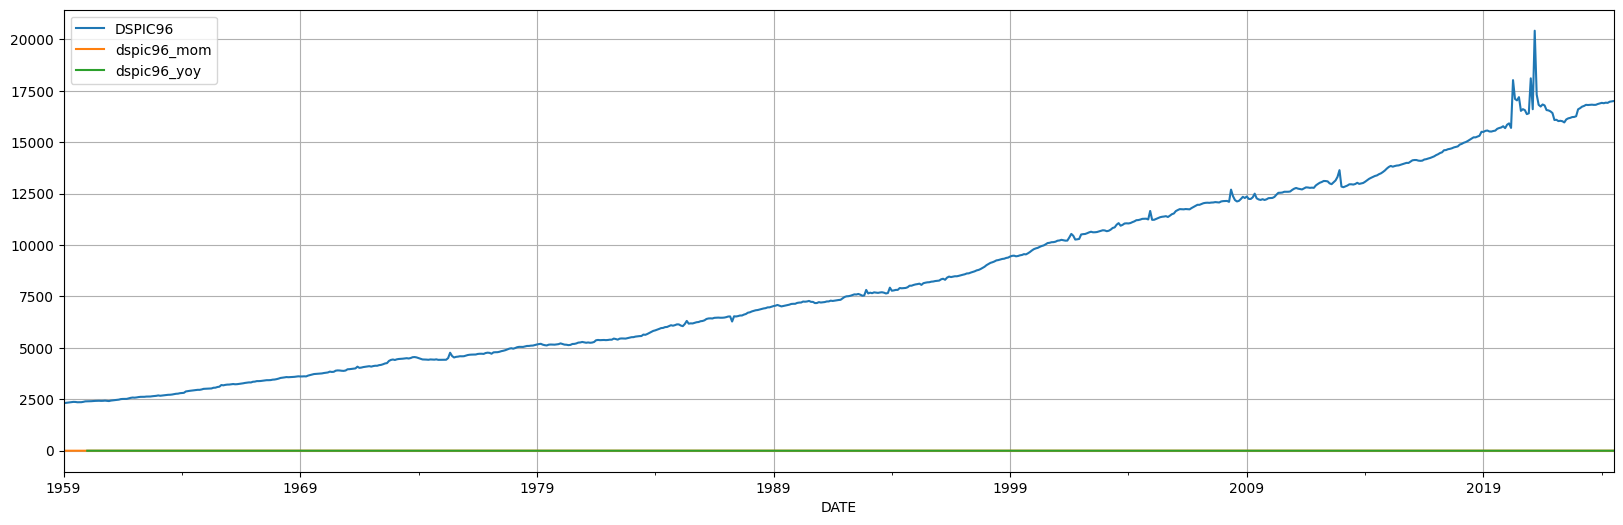

In [109]:
dspic96.plot.line(figsize=(20,6), grid=True)

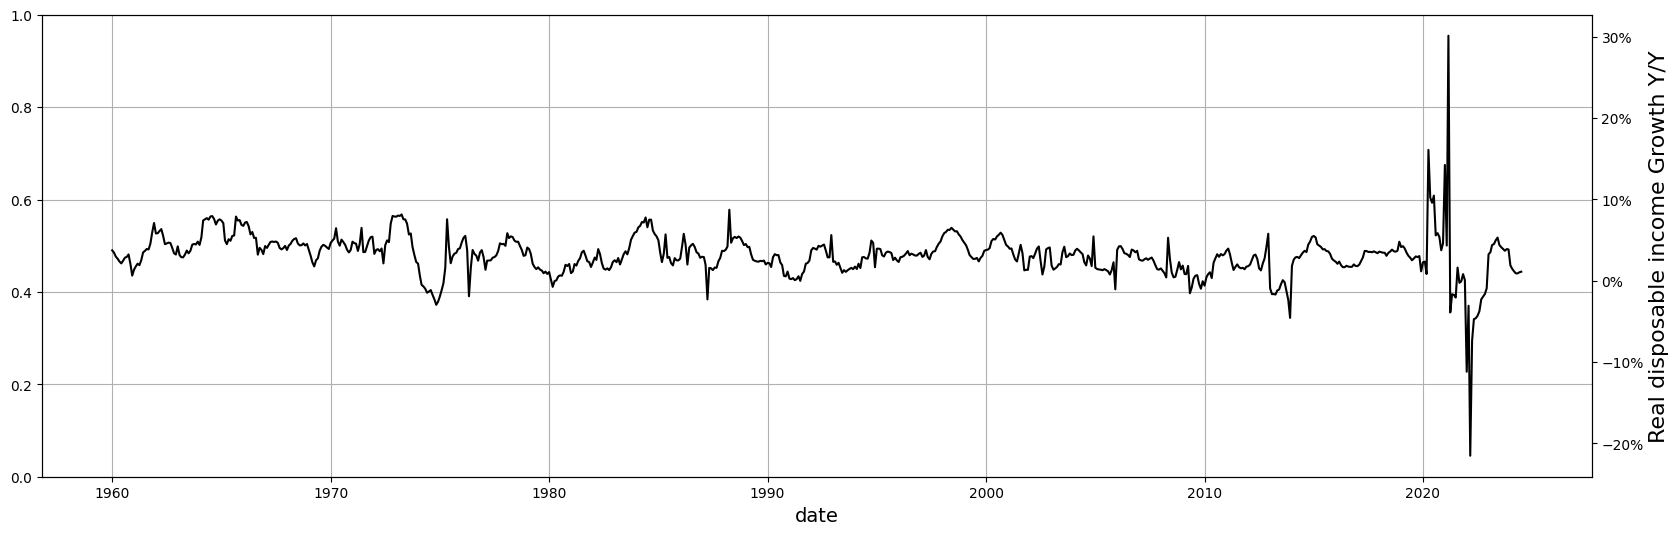

In [281]:
# Visuals
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)

ax.set_xlabel("date",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax2.plot(dspic96['dspic96_yoy'], color="black",marker="")
ax2.set_ylabel("Real disposable income Growth Y/Y",color="black",fontsize=16)
plt.show()

In [111]:
#  Personal Consumption Expenditures (PCE) ==> make y/y?
# https://fred.stlouisfed.org/series/PCE
pce = pdr.DataReader("PCE", "fred", start=start)

pce['pce_mom'] = pce.PCE / pce.PCE.shift(1)-1
pce['pce_yoy'] = pce.PCE / pce.PCE.shift(12)-1

In [112]:
pce.tail()

PCE   pce_mom   pce_yoy
DATE                                   
2024-03-01  19263.7  0.006673  0.053663
2024-04-01  19309.3  0.002367  0.051487
2024-05-01  19413.7  0.005407  0.054645
2024-06-01  19476.7  0.003245  0.053626
2024-07-01  19580.5  0.005329  0.052975

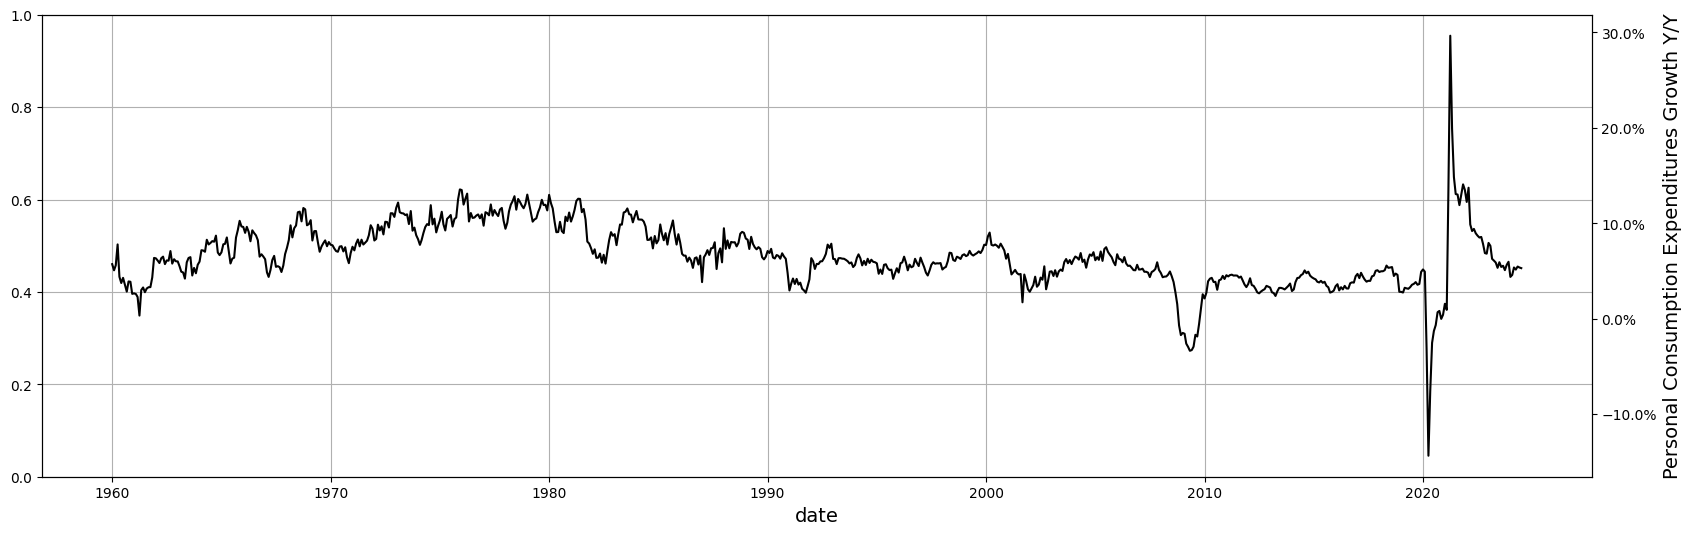

In [284]:
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.set_xlabel("date",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(pce['pce_yoy'], color="black",marker="")
ax2.set_ylabel("Personal Consumption Expenditures Growth Y/Y",color="black",fontsize=14)
plt.show()

<Axes: xlabel='DATE'>

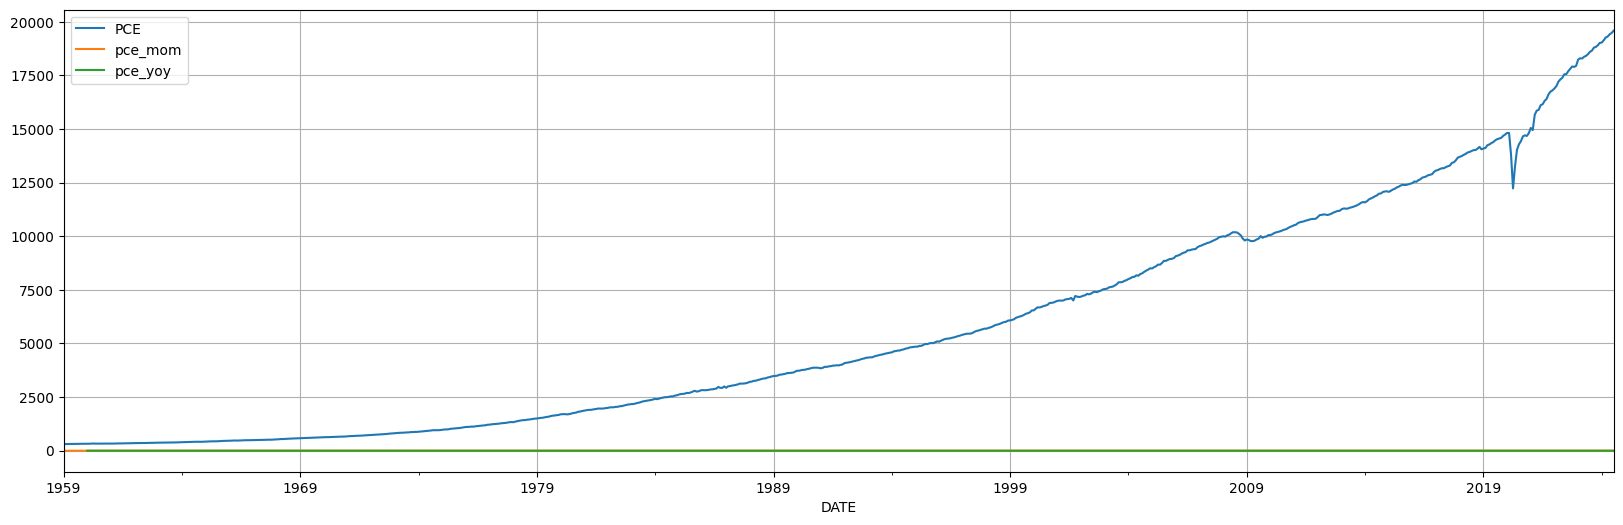

In [114]:
pce.plot.line(figsize=(20,6), grid=True)

In [115]:
#  Personal Consumption Expenditures: Durable Goods (PCEDG)	==> make PCEDG/PCE ratio
# https://fred.stlouisfed.org/series/PCEDG
pcedg = pdr.DataReader("PCEDG", "fred", start=start)
pcedg['pcedg_mom'] = pcedg.PCEDG / pcedg.PCEDG.shift(1)-1
pcedg['pcedg_yoy'] = pcedg.PCEDG / pcedg.PCEDG.shift(12)-1

In [116]:
pcedg.tail()

PCEDG  pcedg_mom  pcedg_yoy
DATE                                    
2024-03-01  2182.4   0.000642   0.006967
2024-04-01  2164.9  -0.008019  -0.008609
2024-05-01  2198.2   0.015382  -0.002088
2024-06-01  2196.5  -0.000773   0.001048
2024-07-01  2226.6   0.013704   0.008927

<Axes: xlabel='DATE'>

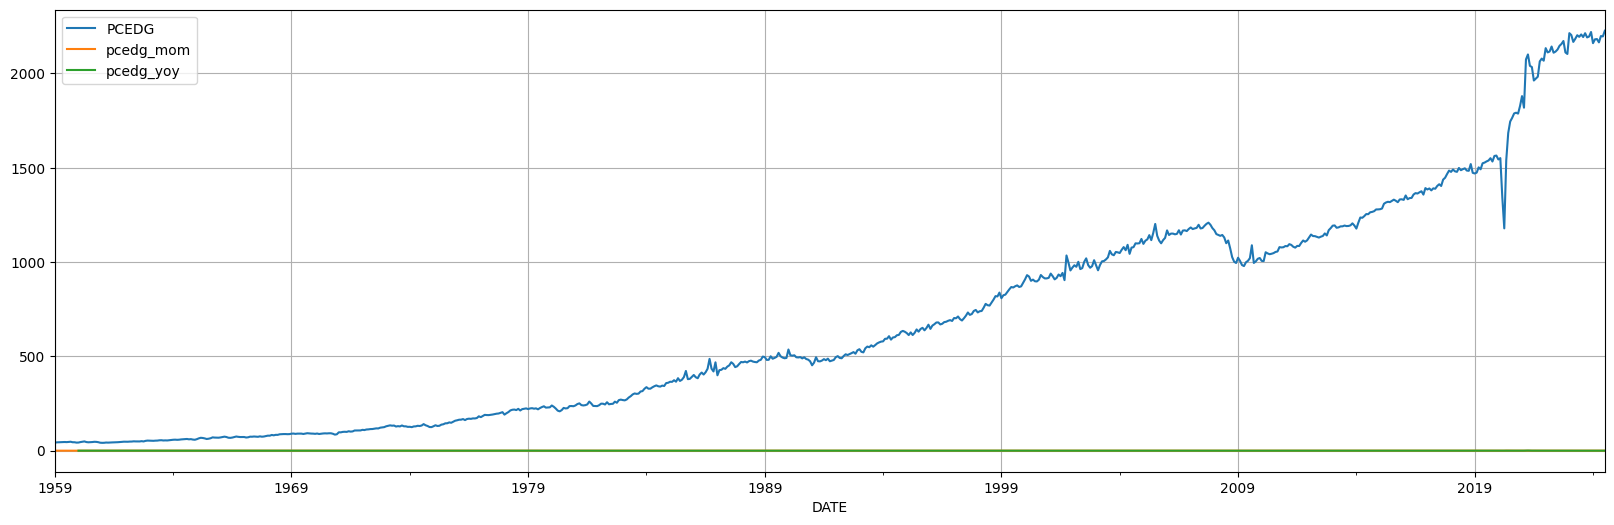

In [117]:
pcedg.plot.line(figsize=(20,6), grid=True)

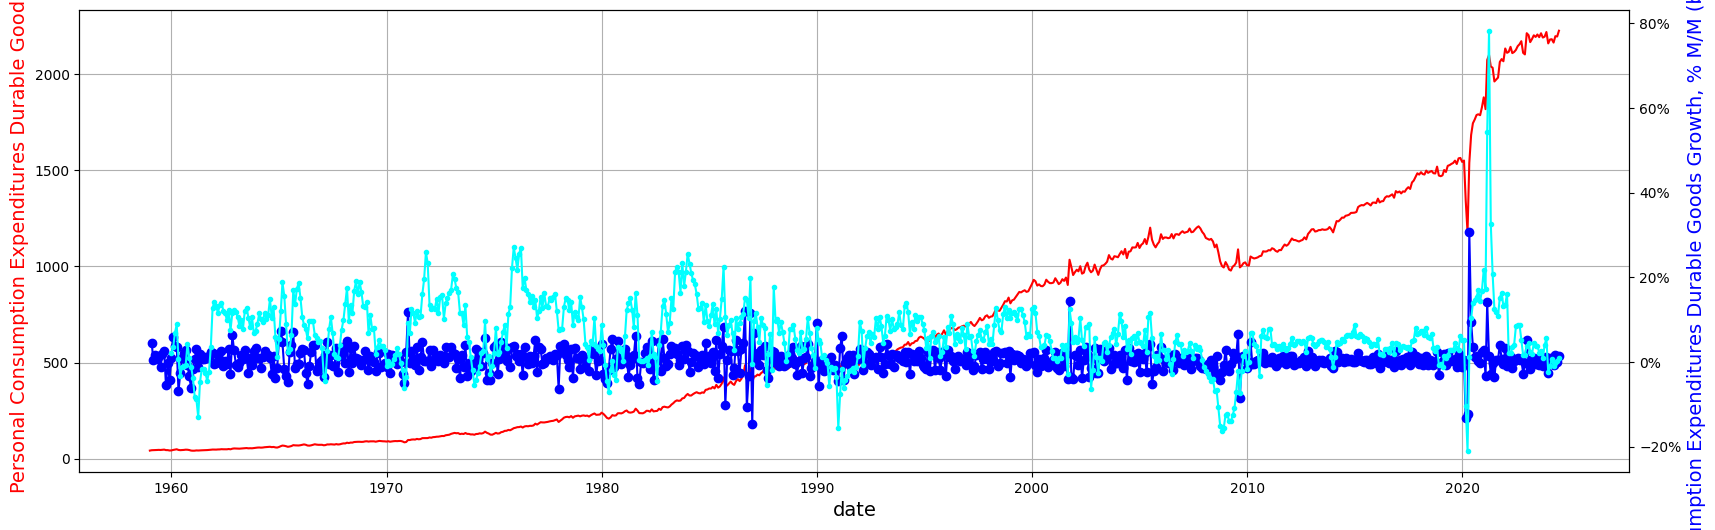

In [118]:
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(pcedg.PCEDG, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Personal Consumption Expenditures Durable Goods",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(pcedg['pcedg_mom'], color="blue",marker="o")
ax2.plot(pcedg['pcedg_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Personal Consumption Expenditures Durable Goods Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [119]:
# Personal saving as a percentage of disposable personal income (DPI),
# frequently referred to as "the personal saving rate," is calculated as the ratio of personal saving to DPI.
# https://fred.stlouisfed.org/series/PSAVERT
psavert = pdr.DataReader("PSAVERT", "fred", start=start)

In [120]:
psavert.tail()

PSAVERT
DATE               
2024-03-01      3.5
2024-04-01      3.5
2024-05-01      3.3
2024-06-01      3.1
2024-07-01      2.9

<Axes: xlabel='DATE'>

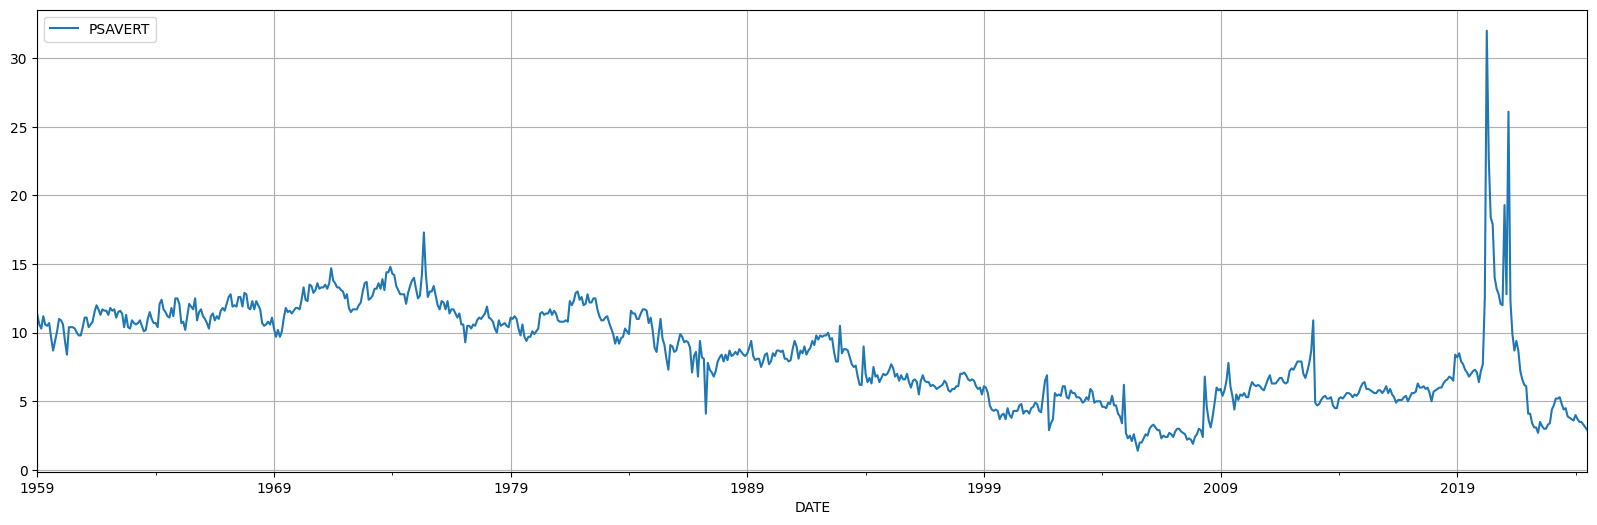

In [121]:
psavert.plot.line(figsize=(20,6), grid=True)

In [122]:
#  Disposable Personal Income (DSPI)	==> y/y?
# https://fred.stlouisfed.org/series/DSPI
dspi = pdr.DataReader("DSPI", "fred", start=start)

dspi['dspi_mom'] = dspi.DSPI / dspi.DSPI.shift(1)-1
dspi['dspi_yoy'] = dspi.DSPI / dspi.DSPI.shift(12)-1

In [123]:
dspi.tail()

DSPI  dspi_mom  dspi_yoy
DATE                                   
2024-03-01  20779.7  0.004986  0.039115
2024-04-01  20821.8  0.002026  0.035977
2024-05-01  20891.0  0.003323  0.034956
2024-06-01  20921.9  0.001479  0.035307
2024-07-01  20976.8  0.002624  0.036291

<Axes: xlabel='DATE'>

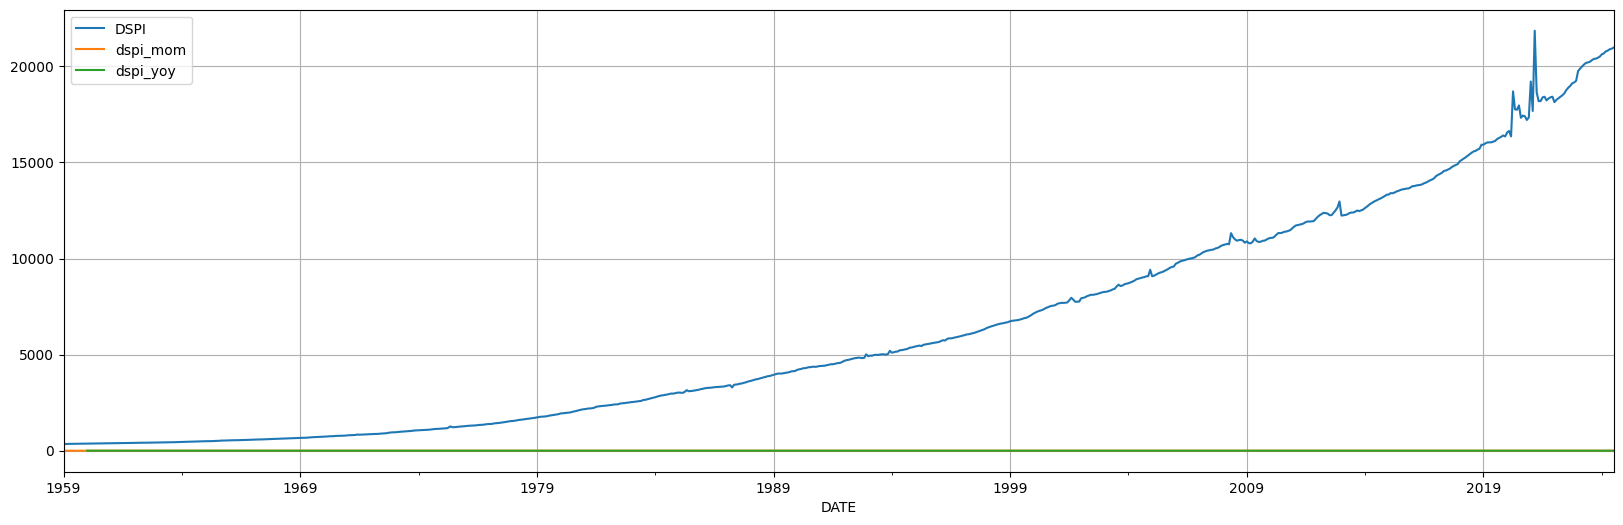

In [124]:
dspi.plot.line(figsize=(20,6), grid=True)

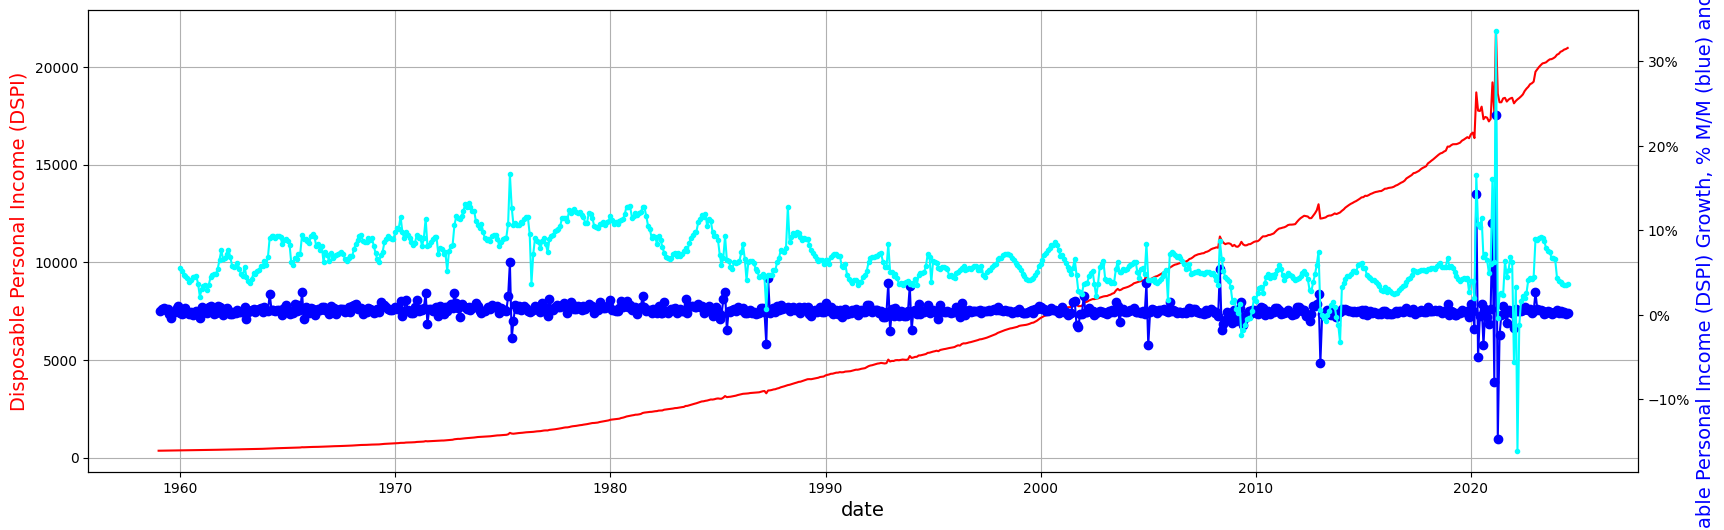

In [125]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(dspi.DSPI, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Disposable Personal Income (DSPI)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(dspi['dspi_mom'], color="blue",marker="o")
ax2.plot(dspi['dspi_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Disposable Personal Income (DSPI) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [126]:
#  Advance Retail Sales: Retail Trade (RSXFS)	 m$ --> make y/y ?
# https://fred.stlouisfed.org/series/RSXFS
rsxfs = pdr.DataReader("RSXFS", "fred", start=start)
rsxfs['rsxfs_mom'] = rsxfs.RSXFS / rsxfs.RSXFS.shift(1)-1
rsxfs['rsxfs_yoy'] = rsxfs.RSXFS / rsxfs.RSXFS.shift(12)-1

In [127]:
rsxfs.tail()

RSXFS  rsxfs_mom  rsxfs_yoy
DATE                                      
2024-03-01  610060.0   0.005505   0.032939
2024-04-01  608458.0  -0.002626   0.022684
2024-05-01  610010.0   0.002551   0.022327
2024-06-01  608460.0  -0.002541   0.017481
2024-07-01  615001.0   0.010750   0.025511

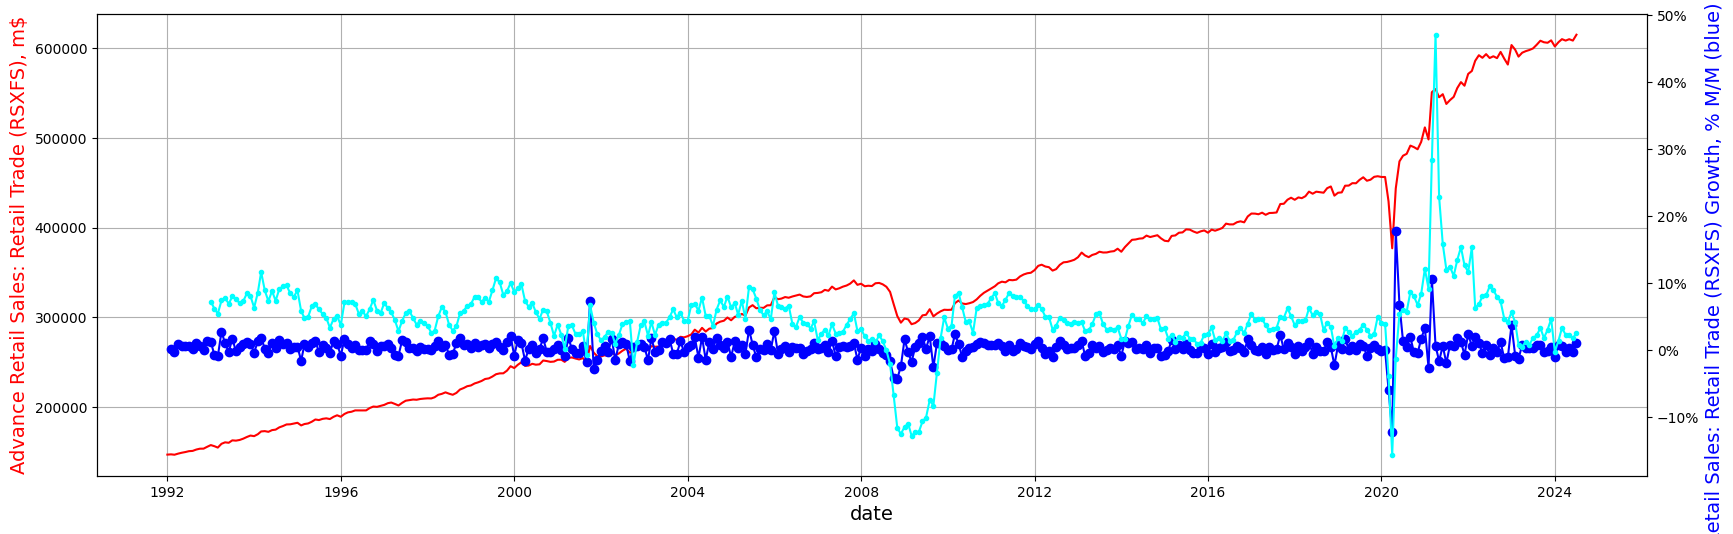

In [128]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(rsxfs.RSXFS, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Advance Retail Sales: Retail Trade (RSXFS), m$",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(rsxfs['rsxfs_mom'], color="blue",marker="o")
ax2.plot(rsxfs['rsxfs_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Advance Retail Sales: Retail Trade (RSXFS) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

<Axes: xlabel='DATE'>

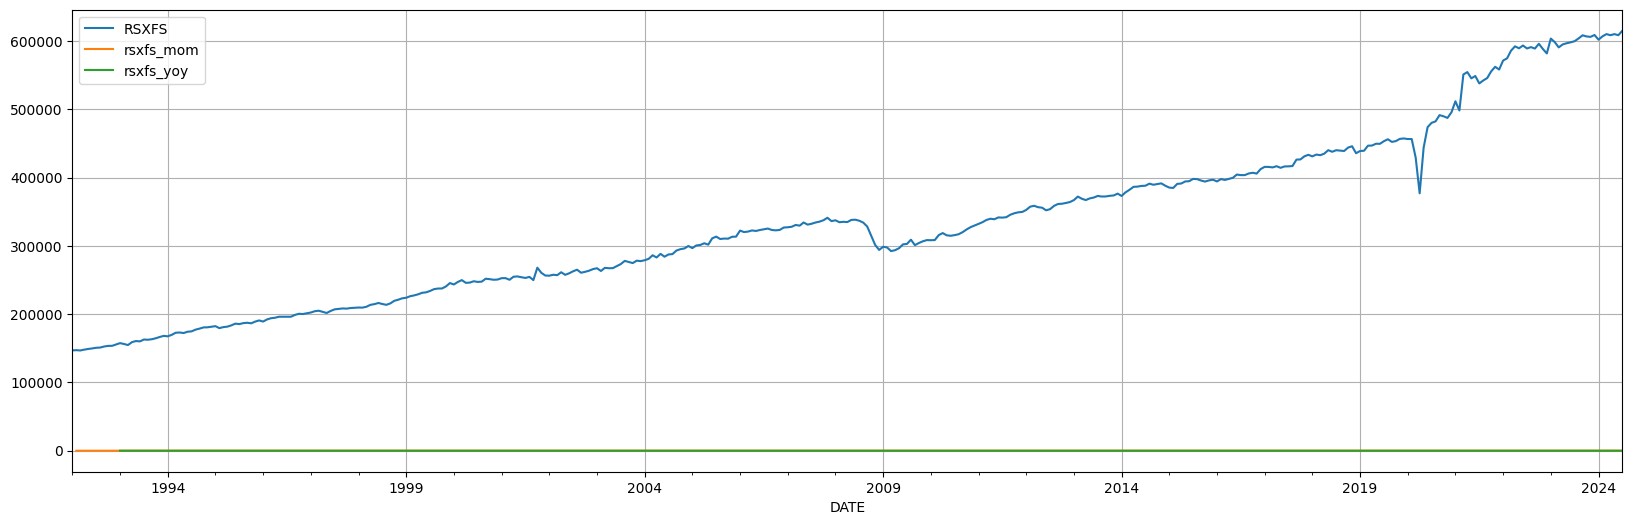

In [129]:
rsxfs.plot.line(figsize=(20,6), grid=True)

## 1.7 Other economic indicators

In [130]:
#  Industrial Production: Total Index (INDPRO), %	 ==> no transform
 # https://fred.stlouisfed.org/series/INDPRO
indpro = pdr.DataReader("INDPRO", "fred", start=start)
indpro.tail()

INDPRO
DATE                
2024-03-01  102.5001
2024-04-01  102.4955
2024-05-01  103.2734
2024-06-01  103.5494
2024-07-01  102.8887

<Axes: xlabel='DATE'>

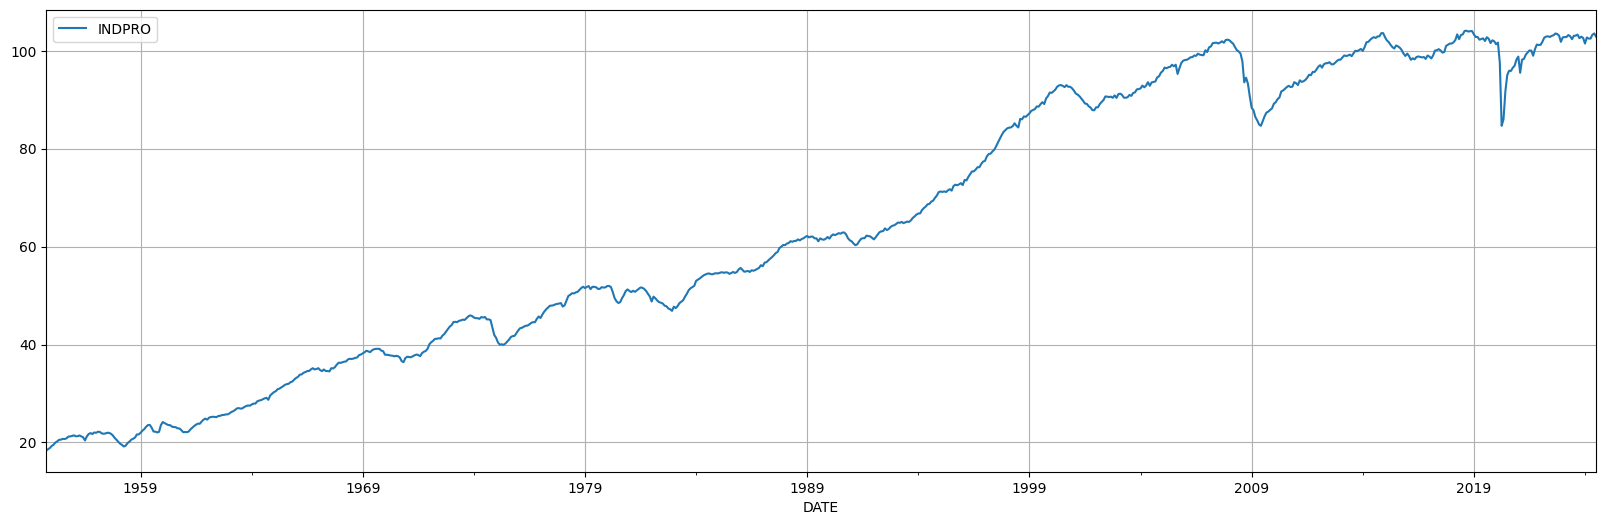

In [131]:
indpro.plot.line(figsize=(20,6), grid=True)

In [132]:
# Capacity Utilization: Total Index (TCU)	, % ==> no transform
  #Definition:  We can also think of capacity utilization as how much capacity
  # is being used from the total available capacity to produce demanded finished products.
# https://fred.stlouisfed.org/series/TCU
tcu = pdr.DataReader("TCU", "fred", start=start)
tcu.tail()

TCU
DATE               
2024-03-01  77.8314
2024-04-01  77.7624
2024-05-01  78.2853
2024-06-01  78.4235
2024-07-01  77.8477

<Axes: xlabel='DATE'>

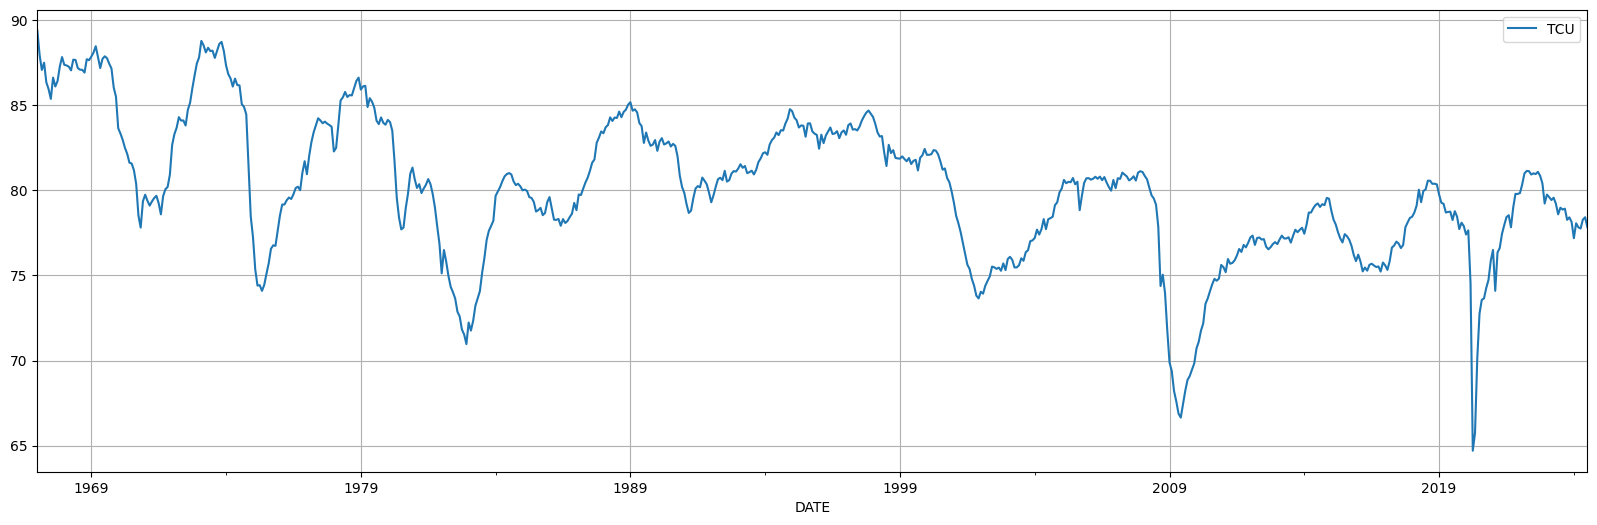

In [133]:
tcu.plot.line(figsize=(20,6), grid=True)

In [134]:
#  New Privately-Owned Housing Units Started: Total Units (HOUST) => y/y?	  (Units:  Thousands of Units, Seasonally Adjusted Annual Rate)
# https://fred.stlouisfed.org/series/HOUST
houst = pdr.DataReader("HOUST", "fred", start=start)
houst['houst_mom'] = houst.HOUST / houst.HOUST.shift(1)-1
houst['houst_yoy'] = houst.HOUST / houst.HOUST.shift(12)-1
houst.tail()

HOUST  houst_mom  houst_yoy
DATE                                    
2024-03-01  1299.0  -0.159767  -0.032042
2024-04-01  1377.0   0.060046   0.006579
2024-05-01  1315.0  -0.045025  -0.169299
2024-06-01  1329.0   0.010646  -0.060777
2024-07-01  1238.0  -0.068473  -0.159538

<Axes: xlabel='DATE'>

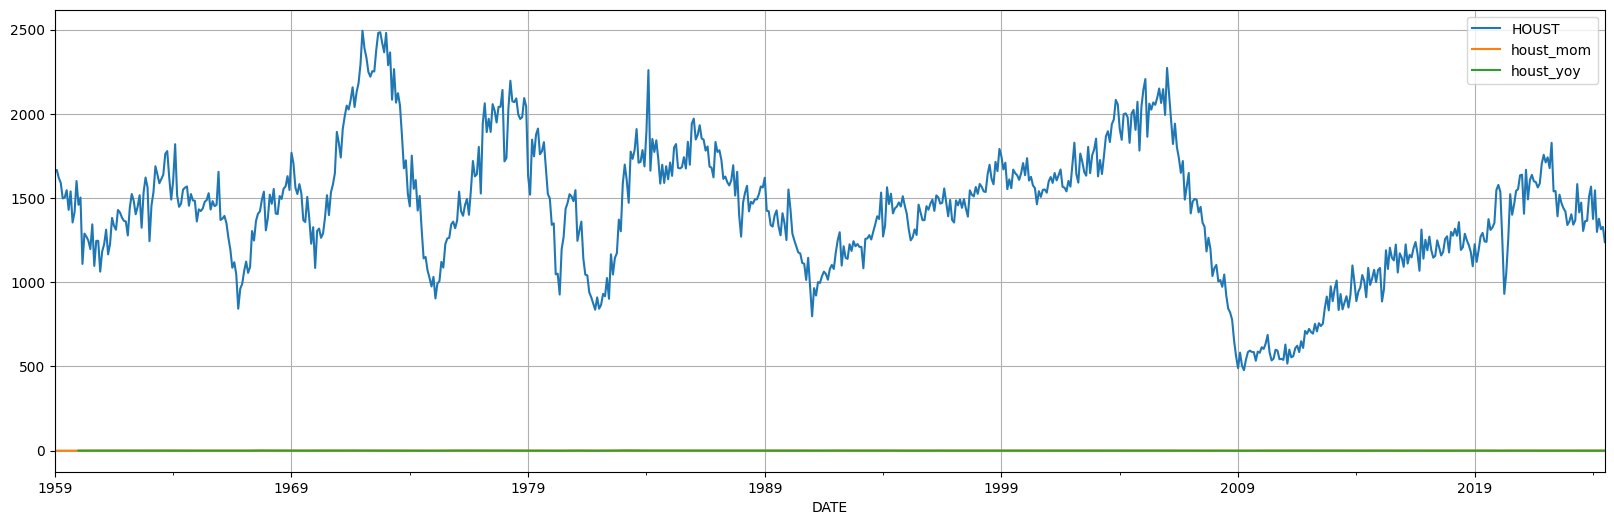

In [135]:
houst.plot.line(figsize=(20,6), grid=True)

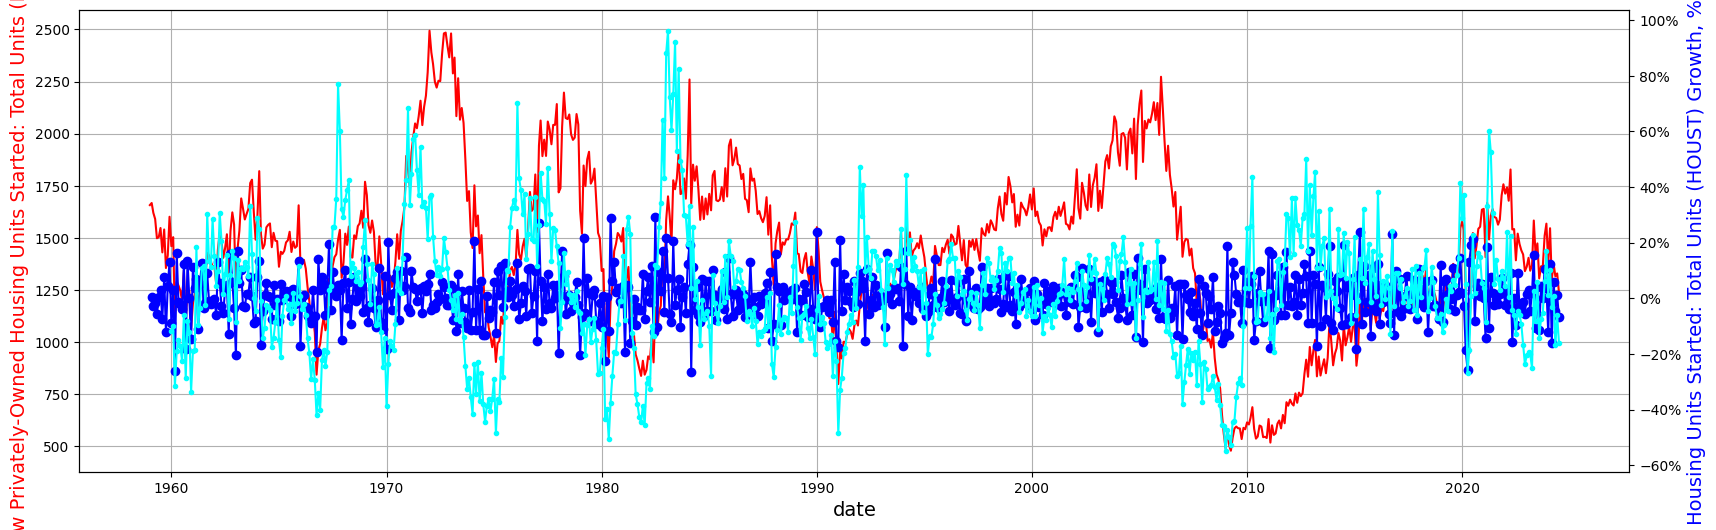

In [136]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(houst.HOUST, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("New Privately-Owned Housing Units Started: Total Units (HOUST)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(houst['houst_mom'], color="blue",marker="o")
ax2.plot(houst['houst_yoy'], color="cyan",marker=".")
ax2.set_ylabel("New Privately-Owned Housing Units Started: Total Units (HOUST) Growth, % M/M (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

In [137]:
#  Gross Private Domestic Investment (GPDI)	, Quarterly -> QoQ or YoY?
# https://fred.stlouisfed.org/series/GPDI
gpdi = pdr.DataReader("GPDI", "fred", start=start)

gpdi['gpdi_qoq'] = gpdi.GPDI / gpdi.GPDI.shift(1)-1
gpdi['gpdi_yoy'] = gpdi.GPDI / gpdi.GPDI.shift(4)-1
gpdi.tail()

GPDI  gpdi_qoq  gpdi_yoy
DATE                                    
2023-04-01  4780.290  0.011524  0.008702
2023-07-01  4915.033  0.028187  0.040302
2023-10-01  4954.426  0.008015  0.032998
2024-01-01  5020.538  0.013344  0.062362
2024-04-01  5144.229  0.024637  0.076133

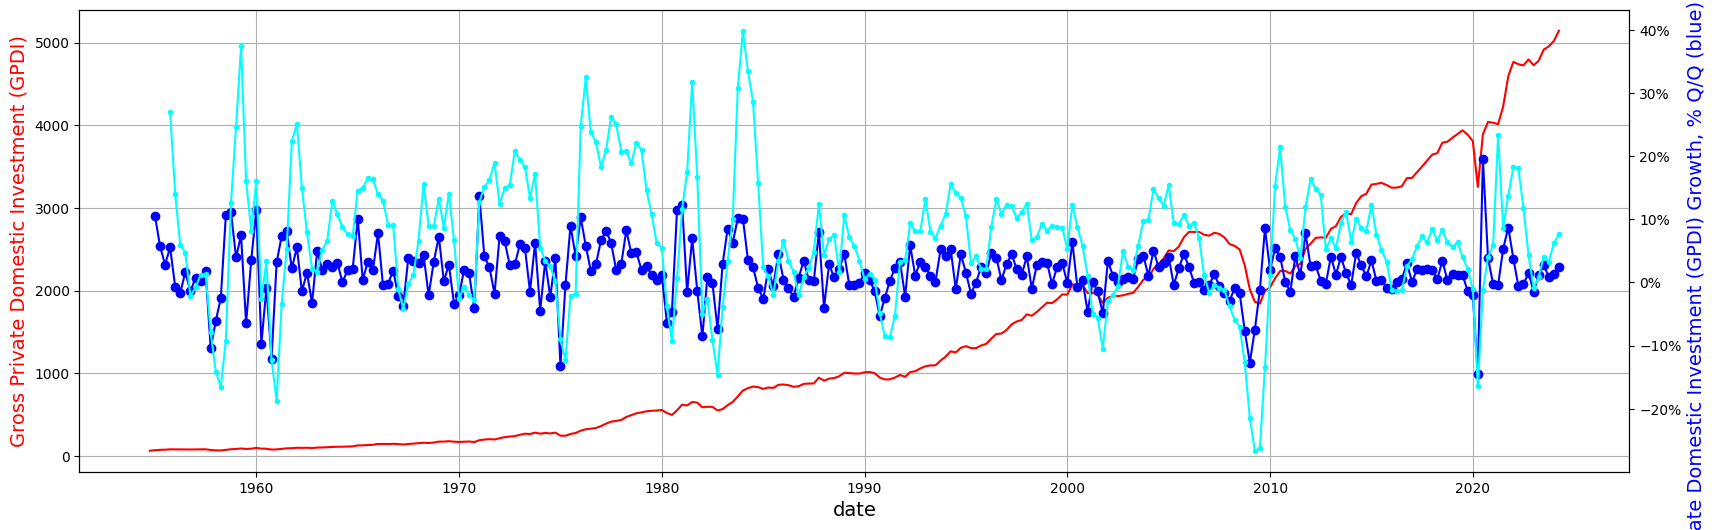

In [138]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(gpdi.GPDI, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Gross Private Domestic Investment (GPDI)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gpdi['gpdi_qoq'], color="blue",marker="o")
ax2.plot(gpdi['gpdi_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Gross Private Domestic Investment (GPDI) Growth, % Q/Q (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

<Axes: xlabel='DATE'>

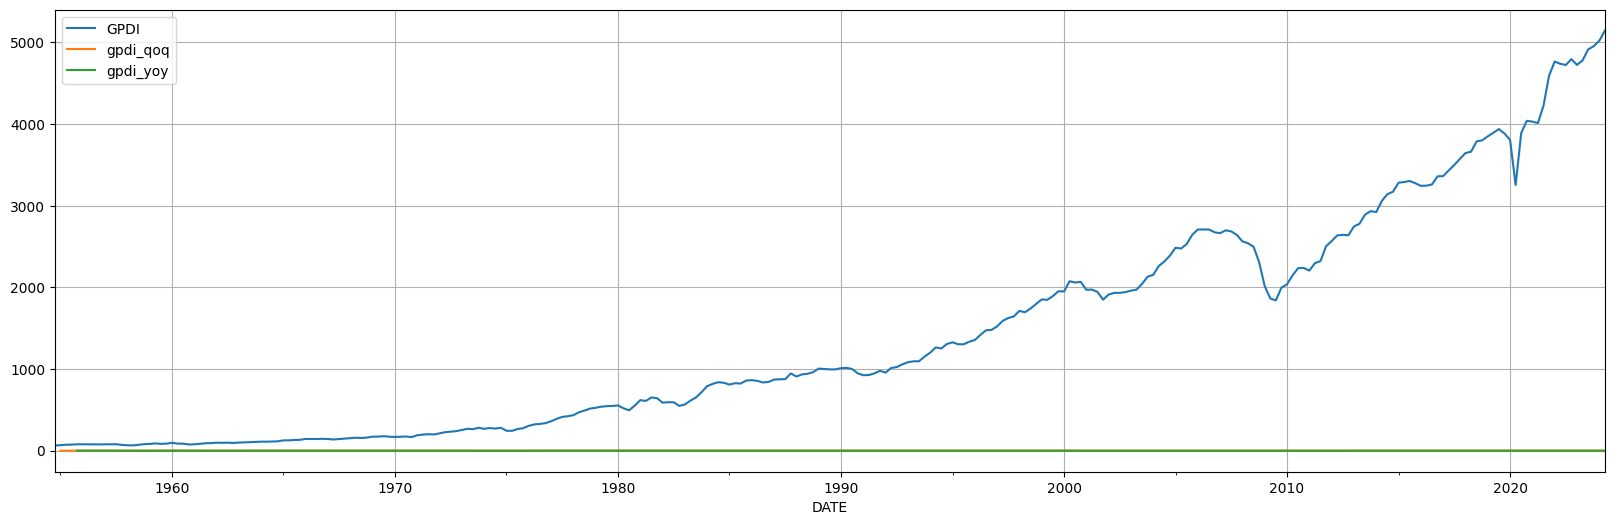

In [139]:
gpdi.plot.line(figsize=(20,6), grid=True)

In [140]:
#  Corporate Profits After Tax (without IVA and CCAdj) (CP)	, $b --> y/y ?
# https://fred.stlouisfed.org/series/CP
cp = pdr.DataReader("CP", "fred", start=start)

cp['cp_qoq'] = cp.CP / cp.CP.shift(1)-1
cp['cp_yoy'] = cp.CP / cp.CP.shift(4)-1
cp.tail()

CP    cp_qoq    cp_yoy
DATE                                    
2023-04-01  2902.860  0.007573 -0.078087
2023-07-01  3017.805  0.039597  0.001433
2023-10-01  3096.319  0.026017  0.086395
2024-01-01  3168.191  0.023212  0.099668
2024-04-01  3228.841  0.019143  0.112296

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


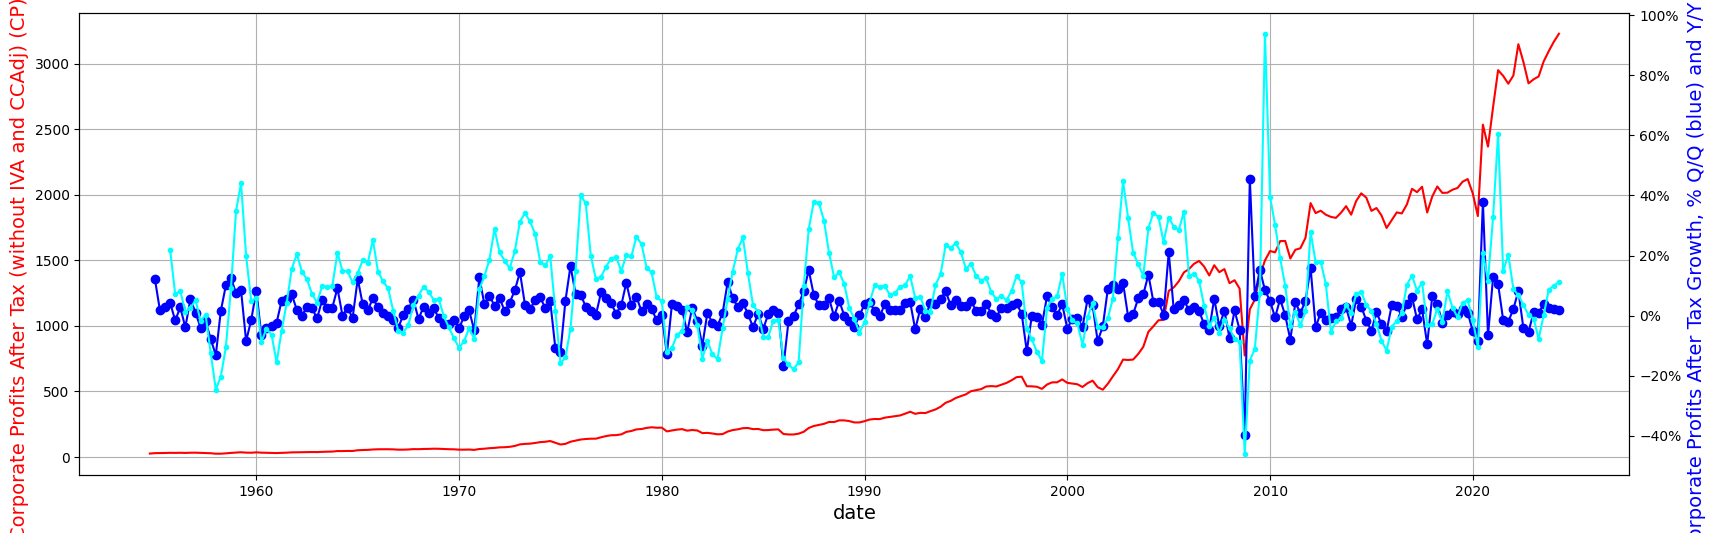

In [141]:
# Visualisation
fig,ax = plt.subplots(figsize=(20,6))
plt.grid(True)
ax.plot(cp.CP, color="red")
ax.set_xlabel("date",fontsize=14)
ax.set_ylabel("Corporate Profits After Tax (without IVA and CCAdj) (CP)	, $b",color="red",fontsize=14)
ax2=ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cp['cp_qoq'], color="blue",marker="o")
ax2.plot(cp['cp_yoy'], color="cyan",marker=".")
ax2.set_ylabel("Corporate Profits After Tax Growth, % Q/Q (blue) and Y/Y (cyan)",color="blue",fontsize=14)
plt.show()

<Axes: xlabel='DATE'>

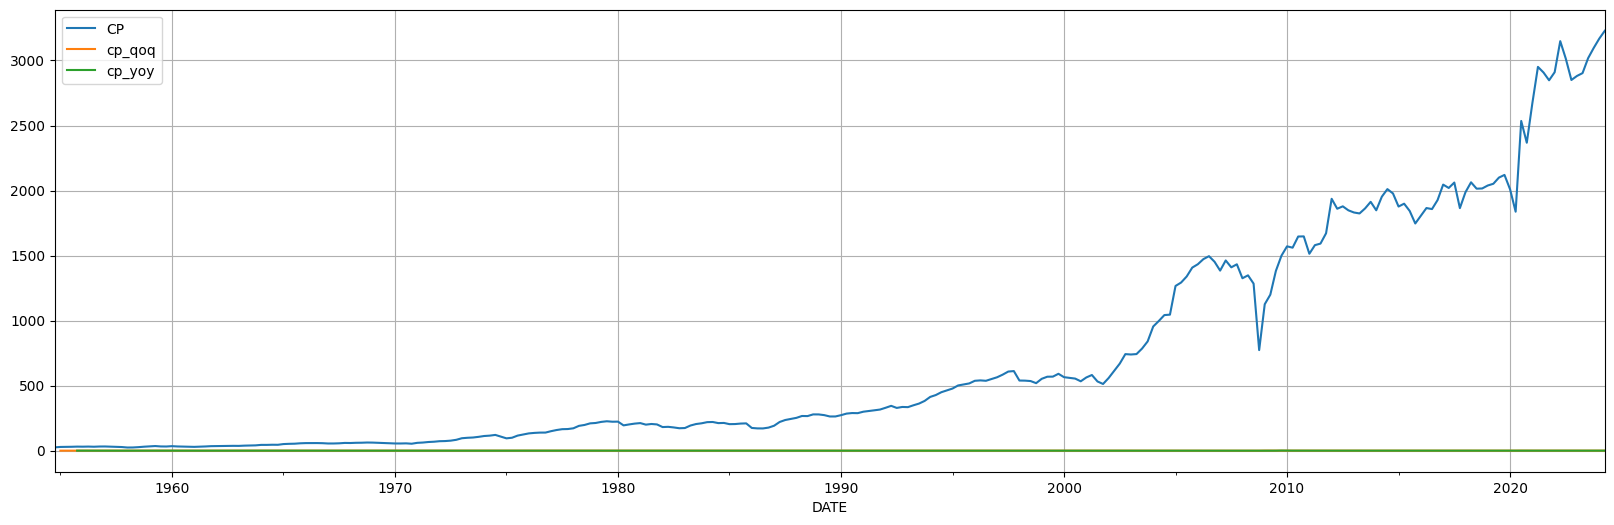

In [142]:
cp.plot.line(figsize=(20,6), grid=True)

In [143]:
#  St. Louis Fed Financial Stress Index (STLFSI2) ==> no transformation (normal==0 values) ==> weekly
 # The STLFSI2 measures the degree of financial stress in the markets and is constructed from 18 weekly data series,
 # all of which are weekly averages of daily data series: seven interest rates, six yield spreads, and five other indicators.
 #  Each of these variables captures some aspect of financial stress. Accordingly, as the level of financial stress in the economy changes, the data series are likely to move together.

 # How to Interpret the Index:
 # The average value of the index, which begins in late 1993, is designed to be zero.
 # Thus, zero is viewed as representing normal financial market conditions.
 # Values below zero suggest below-average financial market stress,
 # while values above zero suggest above-average financial market stress.


# https://fred.stlouisfed.org/series/STLFSI2

stlfsi2 = pdr.DataReader("STLFSI2", "fred", start=start)
stlfsi2.tail()

STLFSI2
DATE               
2021-12-10  -0.8560
2021-12-17  -0.6238
2021-12-24  -0.6939
2021-12-31  -0.9202
2022-01-07  -0.8509

<Axes: xlabel='DATE'>

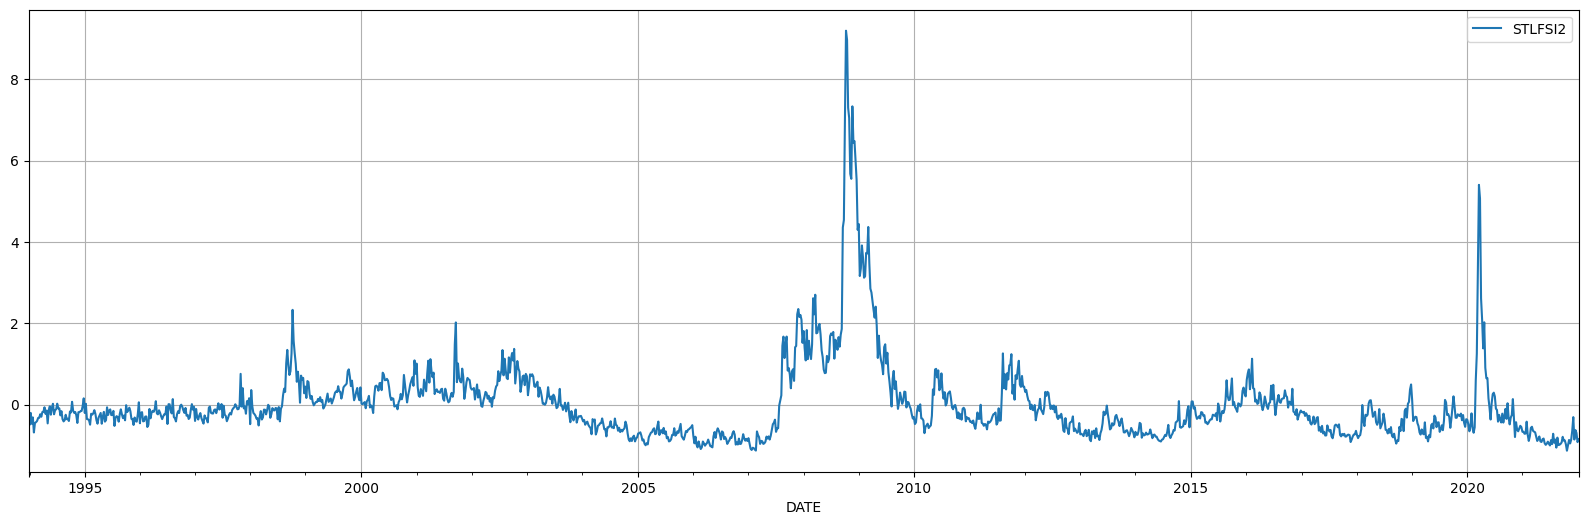

In [144]:
stlfsi2.plot.line(figsize=(20,6), grid=True)

In [145]:
#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# https://fred.stlouisfed.org/series/DCOILWTICO
wti_oil = pdr.DataReader("DCOILWTICO", "fred", start=start)
wti_oil.tail()

DCOILWTICO
DATE                  
2024-08-28       75.49
2024-08-29       76.90
2024-08-30       74.52
2024-09-02         NaN
2024-09-03       71.28

<Axes: xlabel='DATE'>

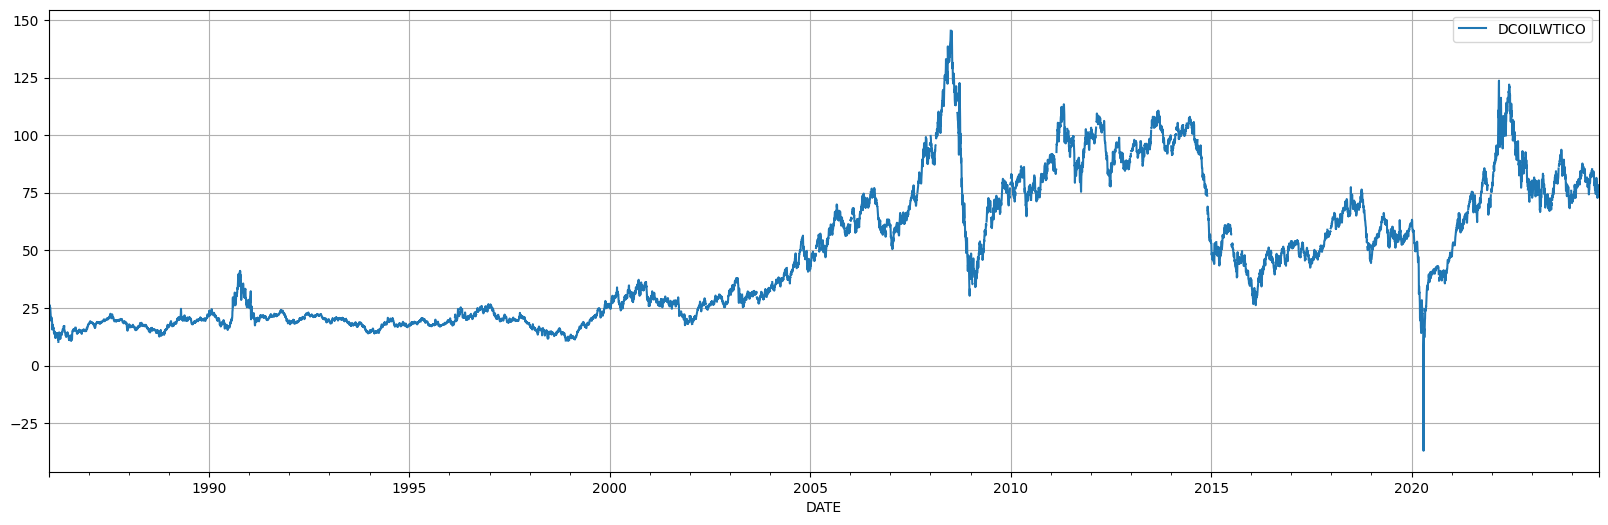

In [146]:
wti_oil.plot.line(figsize=(20,6), grid=True)

In [147]:
#  Trade Weighted U.S. Dollar Index: Advanced Foreign Economies, Goods and Services (DTWEXAFEGS)
# https://fred.stlouisfed.org/series/DTWEXAFEGS
dtwexafegs =  pdr.DataReader("DTWEXAFEGS", "fred", start=start)
dtwexafegs.tail()

DTWEXAFEGS
DATE                  
2024-08-26    113.0716
2024-08-27    112.9125
2024-08-28    113.1006
2024-08-29    113.3566
2024-08-30    113.7213

<Axes: xlabel='DATE'>

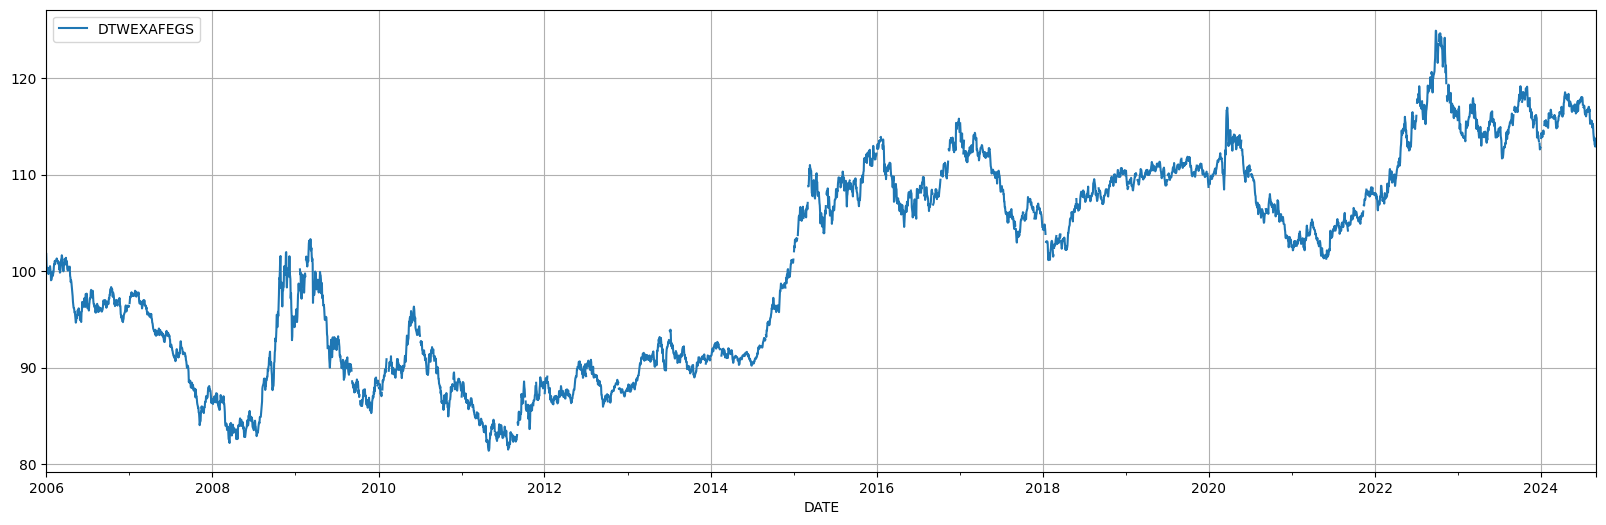

In [148]:
dtwexafegs.plot.line(figsize=(20,6), grid=True)

In [149]:
#  Trade Weighted U.S. Dollar Index: Broad, Goods and Services (DTWEXBGS)
# https://fred.stlouisfed.org/series/DTWEXBGS
dtwexbgs = pdr.DataReader("DTWEXBGS", "fred", start=start)
dtwexbgs.tail()

DTWEXBGS
DATE                
2024-08-26  121.9678
2024-08-27  122.1318
2024-08-28  122.1586
2024-08-29  122.4706
2024-08-30  122.5582

<Axes: xlabel='DATE'>

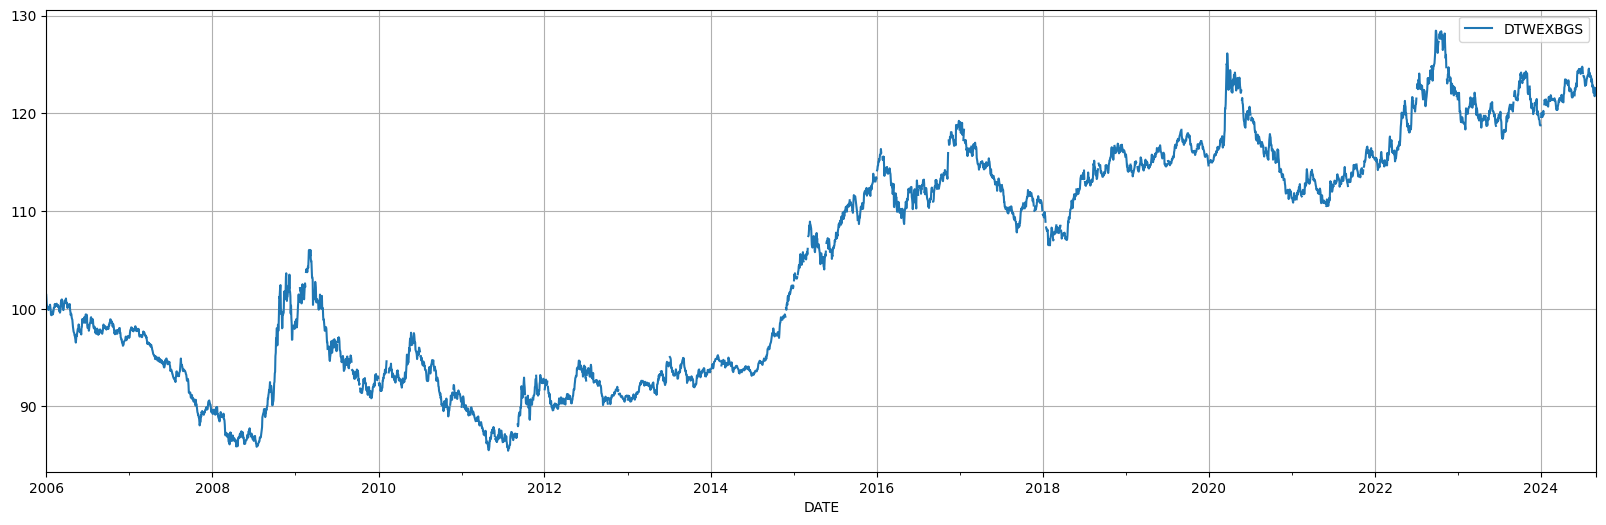

In [150]:
dtwexbgs.plot.line(figsize=(20,6), grid=True)

## 1.8) DEBT

*GFDEBTN, GFDEGDQ188S*

In [151]:
#  Federal Debt: Total Public Debt (GFDEBTN) --> y/y?
# https://fred.stlouisfed.org/series/GFDEBTN
gfdebtn = pdr.DataReader("GFDEBTN", "fred", start=start)
gfdebtn.tail()

GFDEBTN
DATE                  
2023-04-01  32332274.0
2023-07-01  33167334.0
2023-10-01  34001494.0
2024-01-01  34586533.0
2024-04-01  34831634.0

<Axes: xlabel='DATE'>

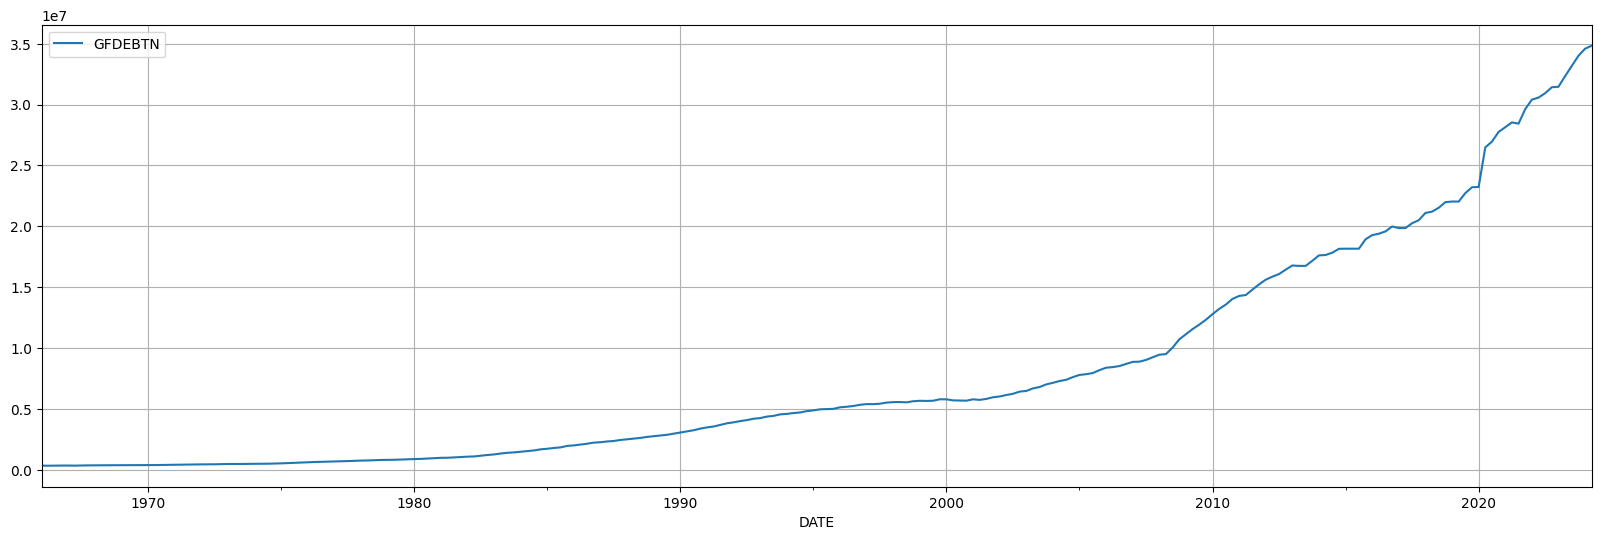

In [152]:
gfdebtn.plot.line(figsize=(20,6), grid=True)

In [187]:
#  Federal Debt: Total Public Debt as Percent of Gross Domestic Product (GFDEGDQ188S)
# https://fred.stlouisfed.org/series/GFDEGDQ188S

gfdegdq188s = pdr.DataReader("GFDEGDQ188S", "fred", start=start)
gfdegdq188s.tail()

GFDEGDQ188S
DATE                   
2023-04-01    119.47035
2023-07-01    120.12742
2023-10-01    121.62069
2024-01-01    122.34717
2024-04-01    121.56647

<Axes: xlabel='DATE'>

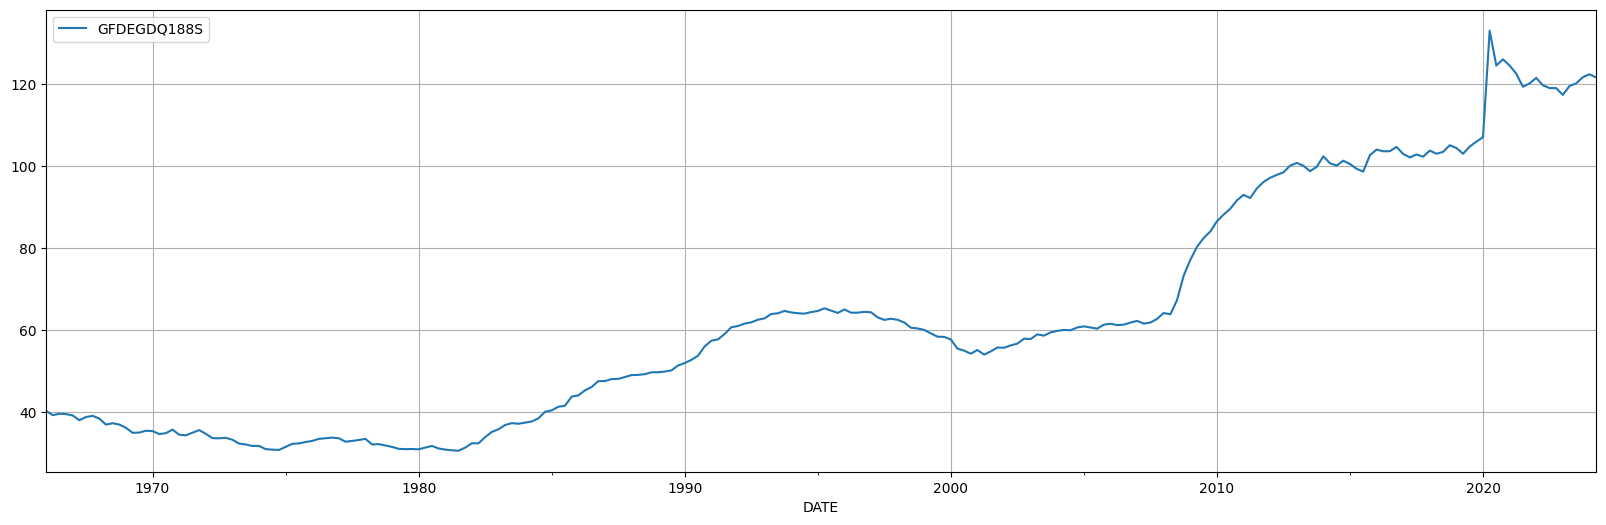

In [186]:
gfdegdq188s.plot.line(figsize=(20,6), grid=True)

## 1.9 OTHER FROM IVAN

In [155]:
#  U.S. / Euro Foreign Exchange Rate (DEXUSEU)
# https://fred.stlouisfed.org/series/DEXUSEU
usdeur_ex = pdr.DataReader("DEXUSEU", "fred", start=start)
usdeur_ex.tail()

DEXUSEU
DATE               
2024-08-26   1.1164
2024-08-27   1.1160
2024-08-28   1.1127
2024-08-29   1.1086
2024-08-30   1.1060

<Axes: xlabel='DATE'>

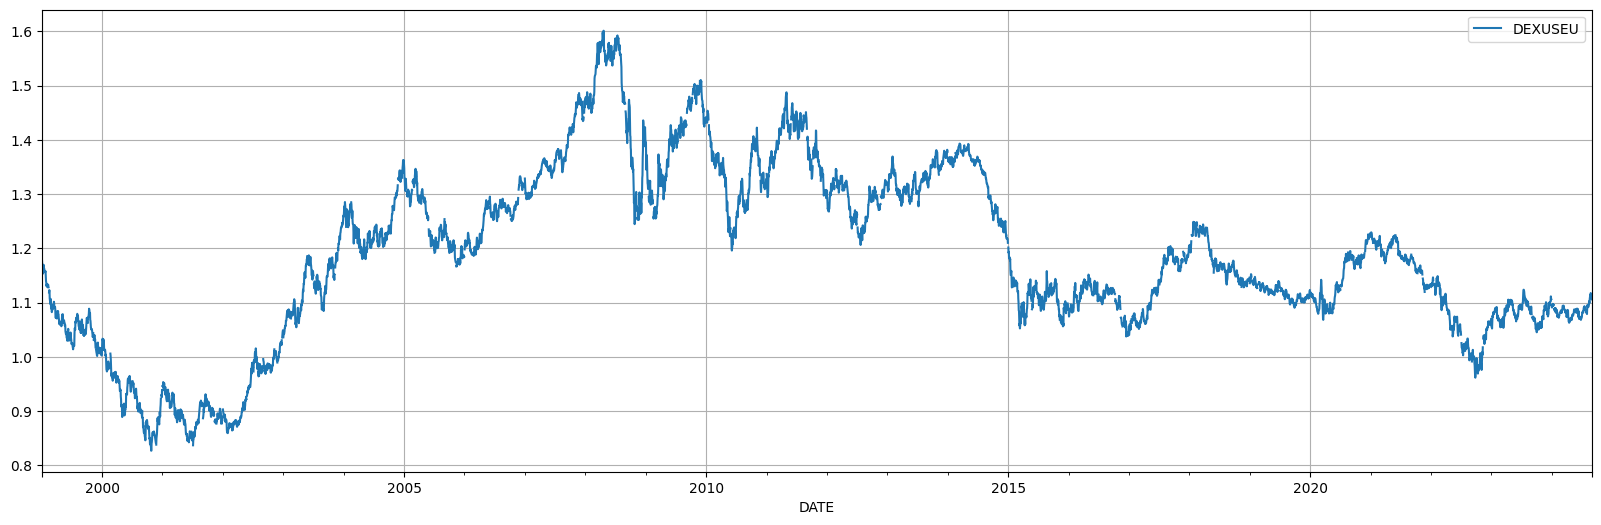

In [156]:
usdeur_ex.plot.line(figsize=(20,6), grid=True)

In [157]:
# CBOE Gold ETF Volatility Index (GVZCLS)
# https://fred.stlouisfed.org/series/GVZCLS
gvzcls = pdr.DataReader("GVZCLS", "fred", start=start)
gvzcls.tail(5)

GVZCLS
DATE              
2024-08-30   16.40
2024-09-02     NaN
2024-09-03   16.55
2024-09-04   16.19
2024-09-05   16.48

<Axes: xlabel='DATE'>

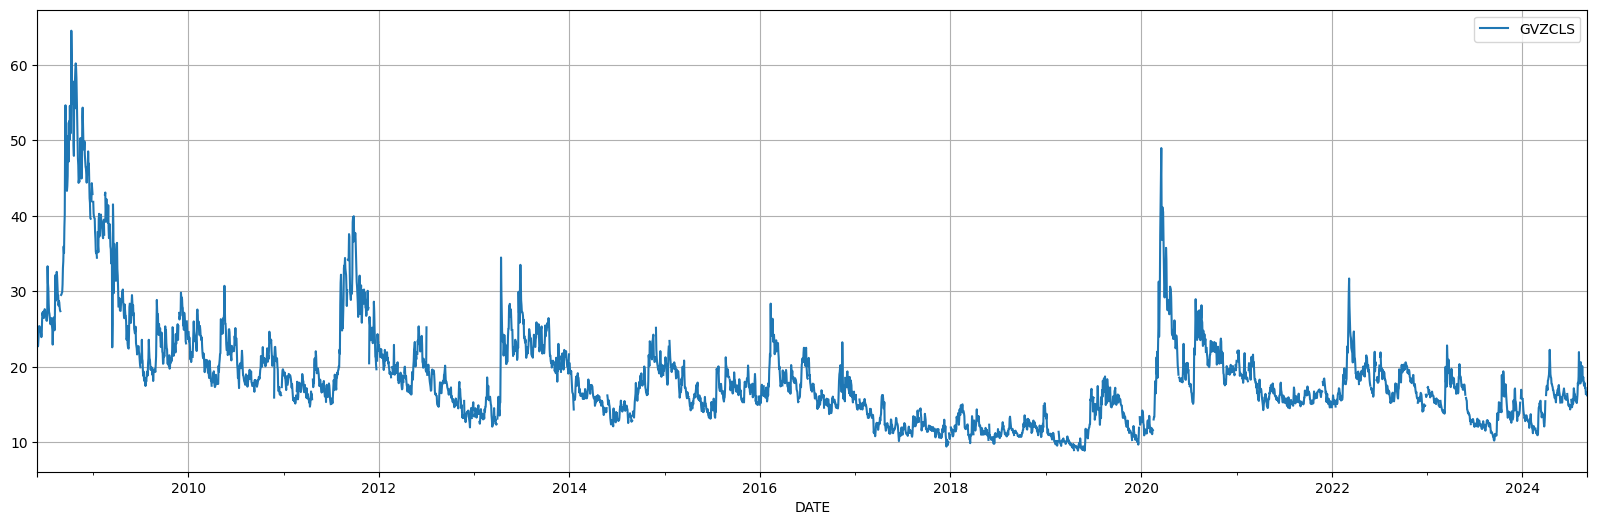

In [158]:
gvzcls.plot.line(figsize=(20,6), grid=True)

In [159]:
#  CBOE Volatility Index: VIX (VIXCLS)
# https://fred.stlouisfed.org/series/VIXCLS

vixcls = pdr.DataReader("VIXCLS", "fred", start=start)
vixcls.tail()

VIXCLS
DATE              
2024-08-30   15.00
2024-09-02   15.55
2024-09-03   20.72
2024-09-04   21.32
2024-09-05   19.90

<Axes: xlabel='DATE'>

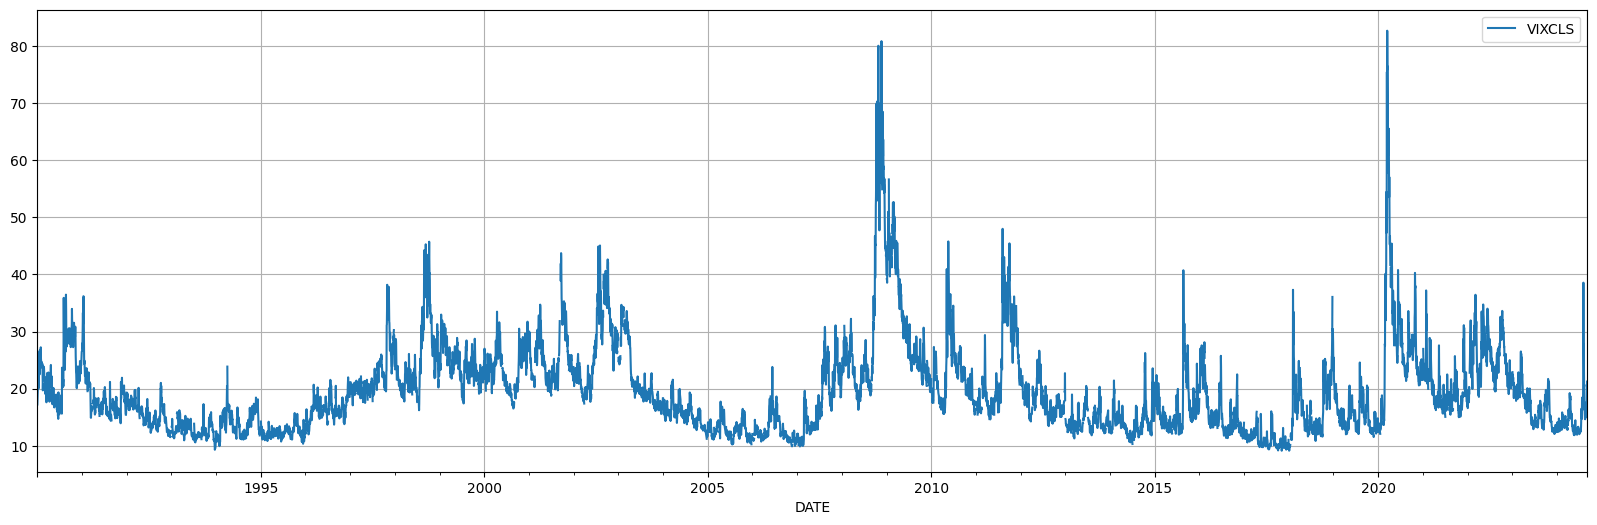

In [160]:
vixcls.plot.line(figsize=(20,6), grid=True)

In [161]:
#  Corporate Profits after tax with IVA and CCAdj: Net Dividends (DIVIDEND)
dividend = pdr.DataReader("DIVIDEND", "fred", start=start)
dividend.tail()

DIVIDEND
DATE                
2023-04-01  1855.787
2023-07-01  1837.596
2023-10-01  1861.432
2024-01-01  1894.009
2024-04-01  1894.876

<Axes: xlabel='DATE'>

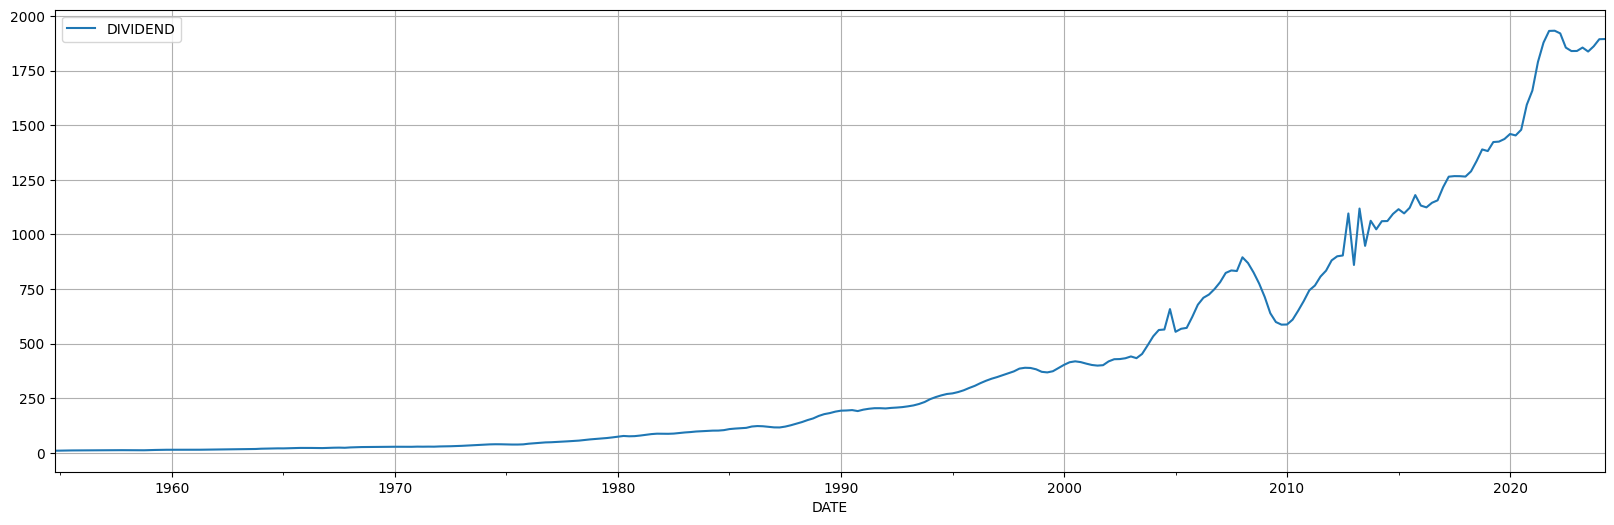

In [162]:
dividend.plot.line(figsize=(20,6), grid=True)

In [163]:
#  30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US)
# https://fred.stlouisfed.org/series/MORTGAGE30US
mortgage30 = pdr.DataReader("MORTGAGE30US", "fred", start=start)
mortgage30.tail()

MORTGAGE30US
DATE                    
2024-08-08          6.47
2024-08-15          6.49
2024-08-22          6.46
2024-08-29          6.35
2024-09-05          6.35

<Axes: xlabel='DATE'>

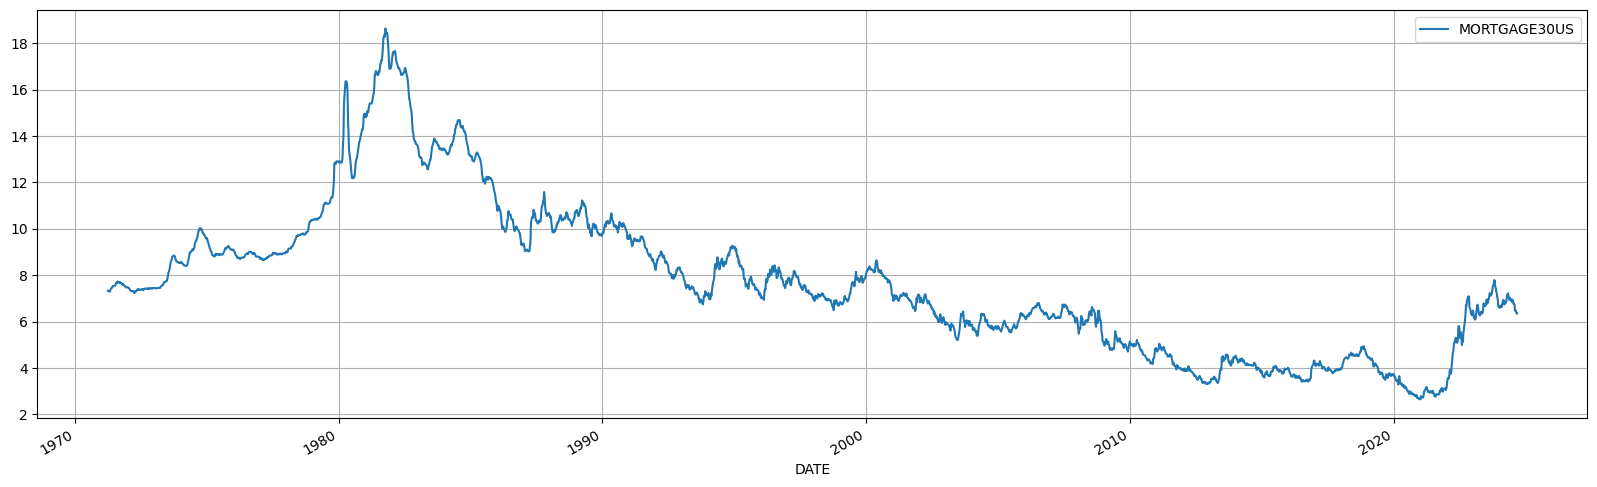

In [164]:
mortgage30.plot.line(figsize=(20,6), grid=True)

In [165]:
#  S&P/Case-Shiller 20-City Composite Home Price Index (SPCS20RSA)
# https://fred.stlouisfed.org/series/SPCS20RSA
spcs20rsa = pdr.DataReader("SPCS20RSA", "fred", start=start)
spcs20rsa.tail()

SPCS20RSA
DATE                  
2024-02-01  325.111625
2024-03-01  326.191129
2024-04-01  327.558296
2024-05-01  328.843957
2024-06-01  330.233414

<Axes: xlabel='DATE'>

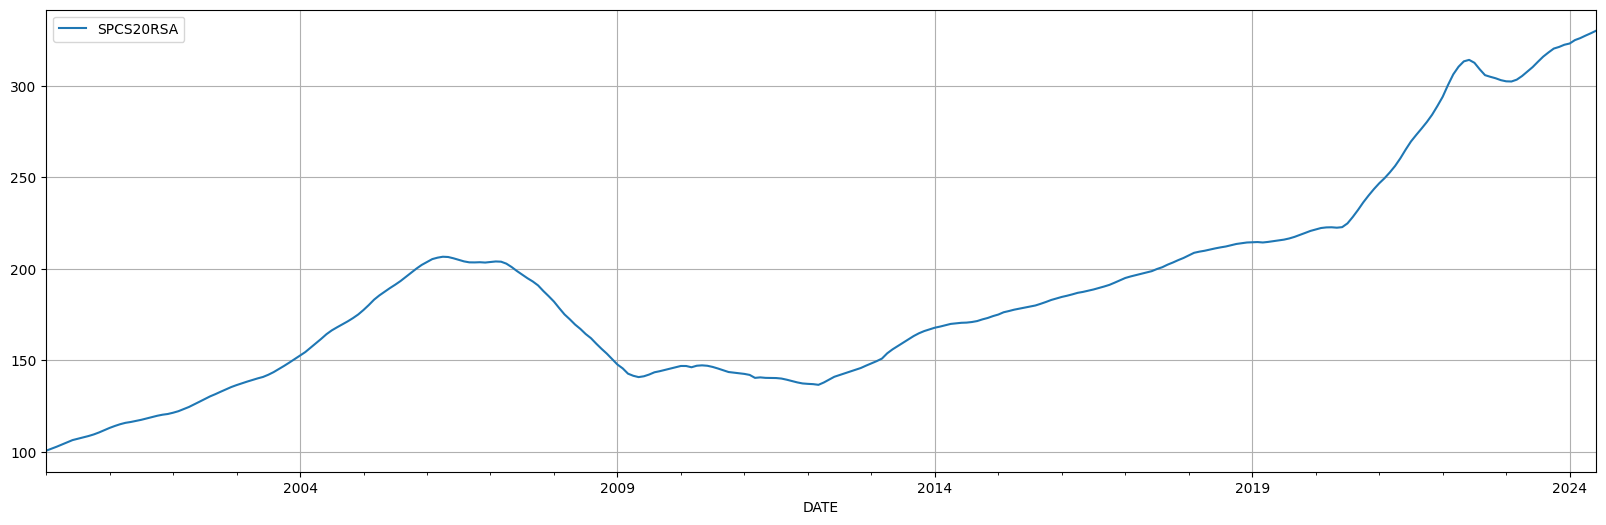

In [166]:
spcs20rsa.plot.line(figsize=(20,6), grid=True)

In [167]:
# https://www.quandl.com/data/BCHAIN/MKPRU-Bitcoin-Market-Price-USD
bitcoin_price_daily = quandl.get("BCHAIN/MKPRU",start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")
bitcoin_price_daily.tail()

Value
Date                
2024-01-04  42854.95
2024-01-05  44190.10
2024-01-06  44181.10
2024-01-07  43975.63
2024-01-08  43928.07

<Axes: xlabel='Date'>

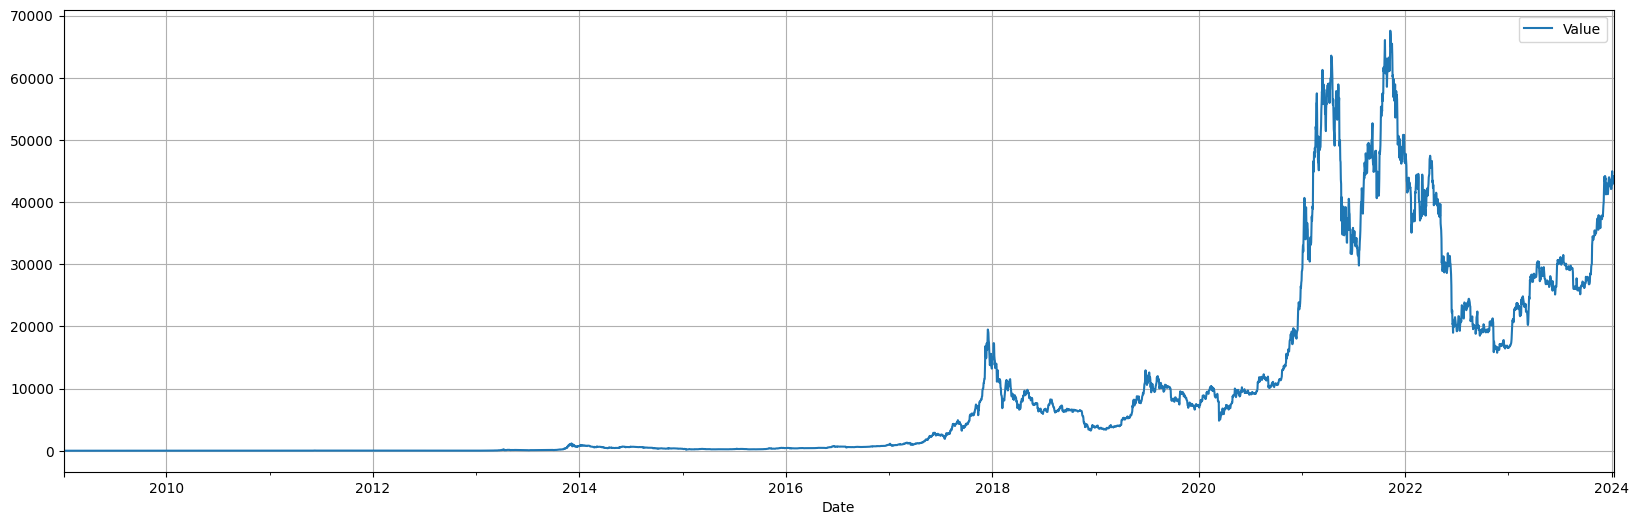

In [168]:
bitcoin_price_daily.plot.line(figsize=(20,6), grid=True)

In [185]:
from datetime import datetime
from datetime import date

# DXY Index  :: Dollar vs. other currencies basket index
# https://www.investopedia.com/terms/u/usdx.asp
# https://finance.yahoo.com/quote/DX-Y.NYB/history?p=DX-Y.NYB

# Query example:
# https://query1.finance.yahoo.com/v7/finance/download/DX-Y.NYB?period1=31795200&period2=1615680000&interval=1d&events=history&includeAdjustedClose=true
# dxy = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/DX-Y.NYB?period1=31795200&period2=1615680000&interval=1d&events=history&includeAdjustedClose=true")

timestamp = 31795200
print('first timestamp', datetime.fromtimestamp(timestamp))

# LAST DAY: clean the timestamp for the beginning of the day
timestamp_now = datetime.timestamp(datetime.today().replace(hour=0, minute=0, second=0, microsecond=0))

last_day_str = str(round(timestamp_now))
print(last_day_str)

http_query_str = f'https://query1.finance.yahoo.com/v7/finance/download/DX-Y.NYB?period1=31795200&period2={last_day_str}&interval=1d&events=history&includeAdjustedClose=true'

dxy = pd.read_csv(http_query_str)
dxy['Date'] = pd.to_datetime(dxy['Date'])
dxy.set_index("Date",inplace=True)
dxy.tail()

first timestamp 1971-01-03 19:00:00
1725768000


HTTPError: HTTP Error 401: Unauthorized

In [175]:
# DXY index line

dxy.Close.plot.line()

NameError: name 'dxy' is not defined

In [176]:
# 1. Treasury rates: https://www.quandl.com/data/USTREASURY/YIELD-Treasury-Yield-Curve-Rates
           # (Ivan) Earliest date for the time-series is 1990-01-01
us_treasury_yield_curve = quandl.get("USTREASURY/YIELD",start_date="1990-01-01", end_date = date.today(), authtoken="5qE7KbLemDiZ9RfNsVuM")

us_treasury_yield_curve.tail()

1 MO  2 MO  3 MO  6 MO  1 YR  2 YR  3 YR  5 YR  7 YR  10 YR  \
Date                                                                      
2023-12-29  5.60  5.59  5.40  5.26  4.79  4.23  4.01  3.84  3.88   3.88   
2024-01-02  5.55  5.54  5.46  5.24  4.80  4.33  4.09  3.93  3.95   3.95   
2024-01-03  5.54  5.54  5.48  5.25  4.81  4.33  4.07  3.90  3.92   3.91   
2024-01-04  5.56  5.48  5.48  5.25  4.85  4.38  4.14  3.97  3.99   3.99   
2024-01-05  5.54  5.48  5.47  5.24  4.84  4.40  4.17  4.02  4.04   4.05   

            20 YR  30 YR  
Date                      
2023-12-29   4.20   4.03  
2024-01-02   4.25   4.08  
2024-01-03   4.21   4.05  
2024-01-04   4.30   4.13  
2024-01-05   4.37   4.21

<Axes: xlabel='Date'>

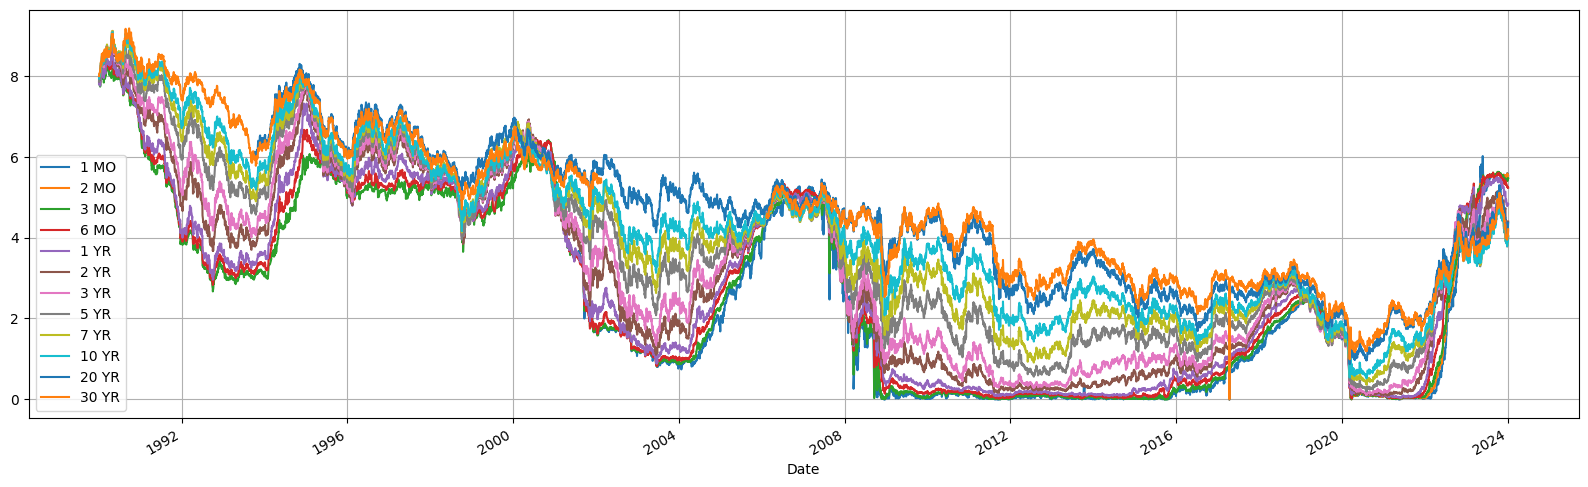

In [177]:
us_treasury_yield_curve.plot.line(figsize=(20,6), grid=True)

In [178]:
# 2. Treasury rate corr. on inflation (TIPS): https://www.quandl.com/data/USTREASURY/REALYIELD-Treasury-Real-Yield-Curve-Rates
us_treasury_real_yield_curve = quandl.get("USTREASURY/REALYIELD", start_date="1990-01-01", end_date = date.today(), authtoken="5qE7KbLemDiZ9RfNsVuM")
us_treasury_real_yield_curve.tail()

5 YR  7 YR  10 YR  20 YR  30 YR
Date                                       
2023-12-29  1.72  1.72   1.72   1.82   1.90
2024-01-02  1.76  1.75   1.74   1.84   1.91
2024-01-03  1.73  1.71   1.71   1.81   1.89
2024-01-04  1.79  1.78   1.77   1.88   1.96
2024-01-05  1.83  1.83   1.83   1.94   2.02

<Axes: xlabel='Date'>

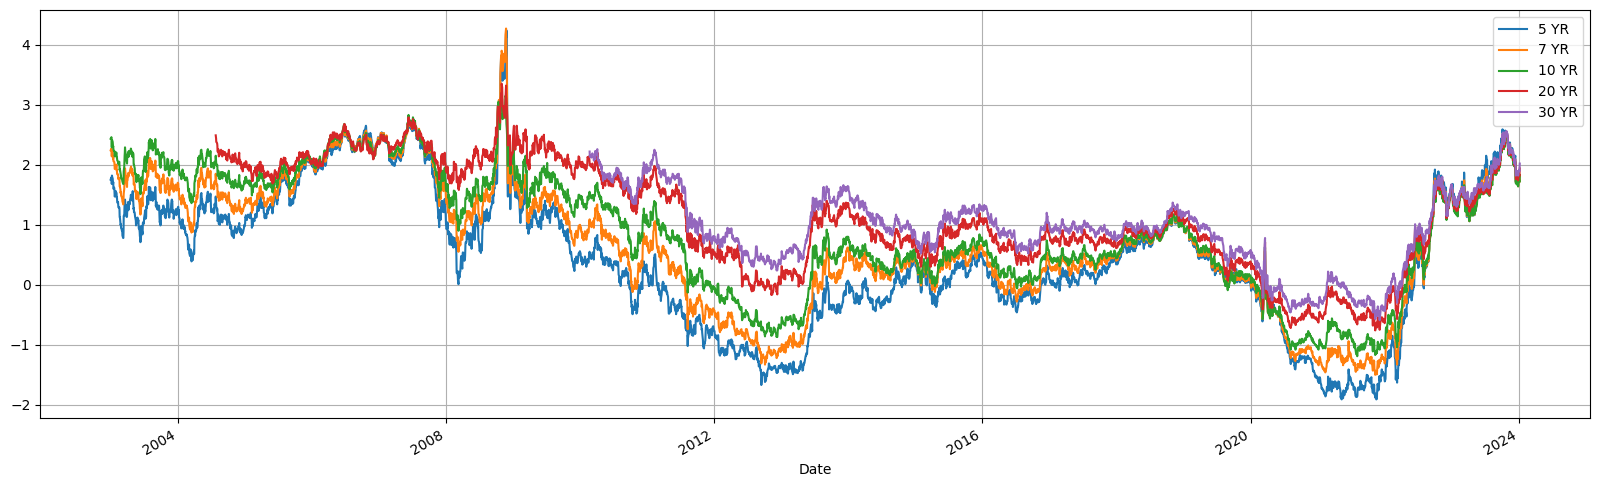

In [179]:
us_treasury_real_yield_curve.plot.line(figsize=(20,6), grid=True)

In [180]:
# 9. Shiller P/E ratio by Month
shiller_pe_ratio_monthly = quandl.get("MULTPL/SHILLER_PE_RATIO_MONTH",start_date=start, end_date=end, authtoken="5qE7KbLemDiZ9RfNsVuM")
shiller_pe_ratio_monthly.tail()

Value
Date             
2023-11-01  30.08
2023-11-30  30.92
2023-12-01  31.56
2024-01-01  31.69
2024-01-31  32.61

<Axes: xlabel='Date'>

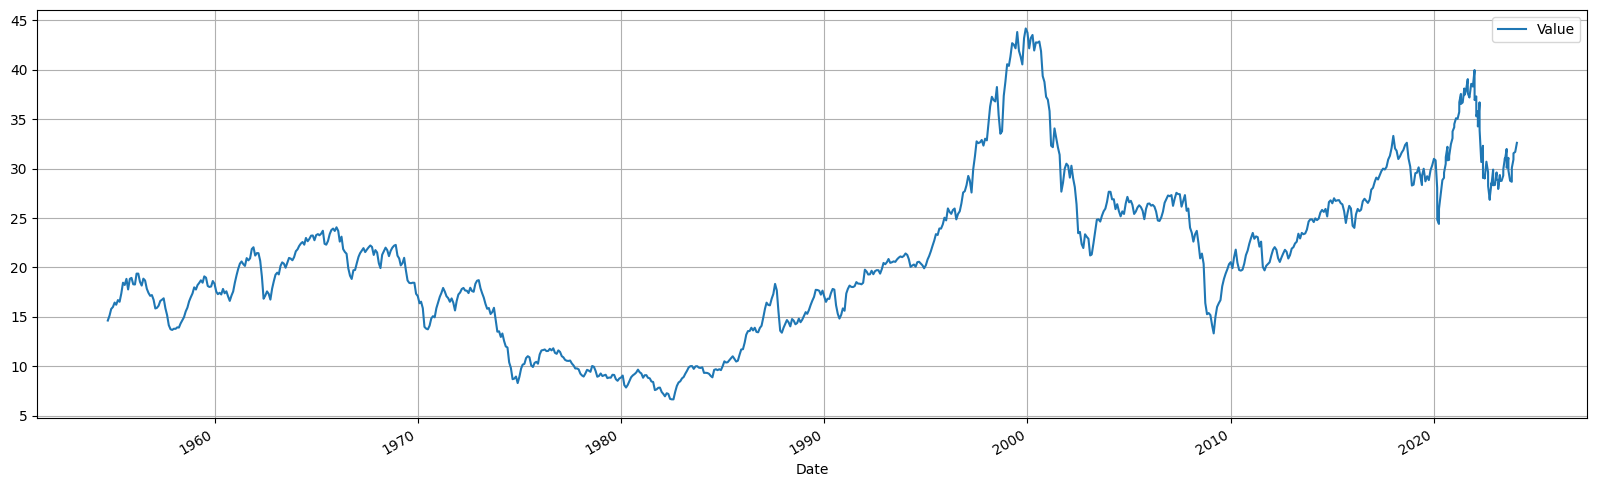

In [181]:
shiller_pe_ratio_monthly.plot.line(figsize=(20,6), grid=True)

In [182]:
# 5. Gold price (London Fixing Gold Price): https://www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
london_fixing_gold_price = quandl.get("LBMA/GOLD",start_date="1980-01-01", end_date=date.today(), authtoken="5qE7KbLemDiZ9RfNsVuM")


In [183]:
london_fixing_gold_price.head()

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
1980-01-02    559.00     559.5   251.123   250.841        NaN        NaN
1980-01-03    632.00     634.0   281.577   282.468        NaN        NaN
1980-01-04    596.00     588.0   266.285   262.770        NaN        NaN
1980-01-07    634.00     633.5   281.653   280.062        NaN        NaN
1980-01-08    615.75     610.0   273.060   270.270        NaN        NaN

<Axes: xlabel='Date'>

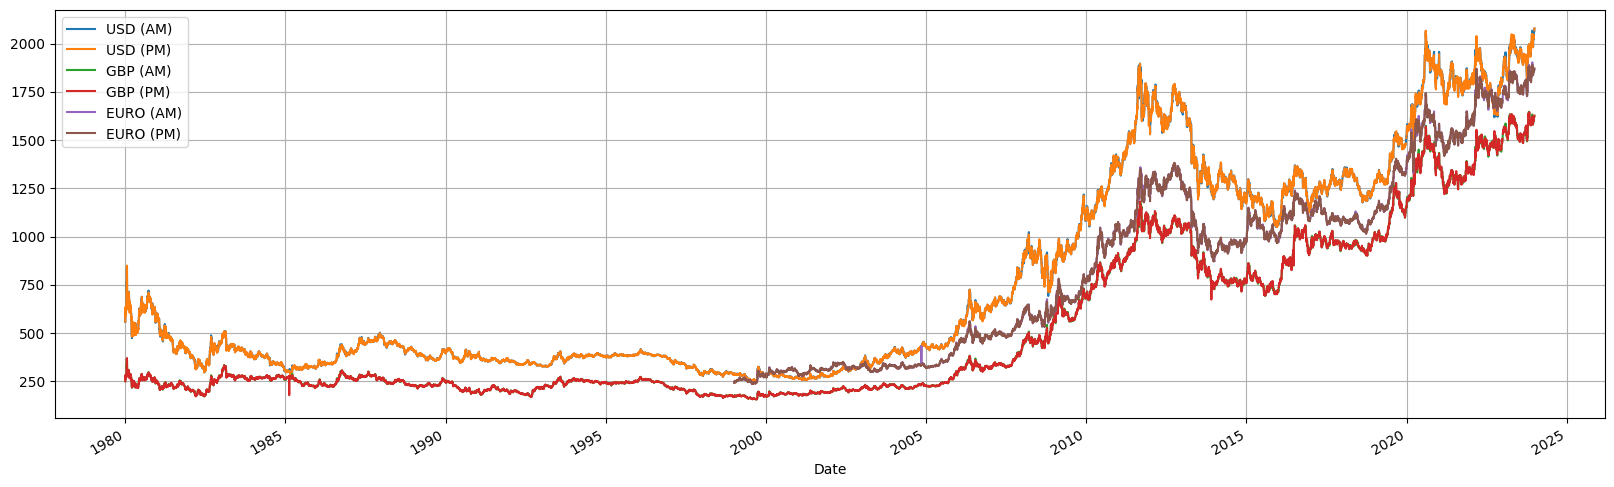

In [184]:
london_fixing_gold_price.plot.line(figsize=(20,6), grid=True)